# 지위위계

In [10]:
import pandas as pd
from pathlib import Path
import re

# 현장데이터 폴더 경로 지정
base_path = Path(r"C:\Users\USER\peer\현장데이터")

def extract_class_number(path):
    match = re.search(r'class_(\d+)', path.stem)
    return int(match.group(1)) if match else float('inf')
    
# class로 시작하고 .csv 확장자인 파일 모두 찾기
excel_files = sorted(base_path.rglob("*class*.csv"), key=extract_class_number)

# 데이터프레임을 담을 딕셔너리
dfs = {}

for file in excel_files:
    try:
        print(file)
        df = pd.read_csv(file)
        df = df.iloc[:, 1:]

        # 추출 패턴: 예) "class_목포부주초_6_5.csv"
        pattern = r'class_([\uac00-\ud7a3a-zA-Z0-9_]+)\.csv'
        match = re.search(pattern, file.name)
        sch_name = match.group(1)
        
        dfs[sch_name] = df
    except Exception as e:
        print(f"파일 {file.name} 에서 오류 발생: {e}")

C:\Users\USER\peer\현장데이터\class_목포부주초_6_5.csv
C:\Users\USER\peer\현장데이터\class_송수초_4_3.csv
C:\Users\USER\peer\현장데이터\class_송수초_4_4.csv
C:\Users\USER\peer\현장데이터\class_송수초_5_2.csv
C:\Users\USER\peer\현장데이터\class_송수초_5_4.csv
C:\Users\USER\peer\현장데이터\class_송수초_5_5.csv
C:\Users\USER\peer\현장데이터\class_송수초_6_2.csv
C:\Users\USER\peer\현장데이터\class_송수초_6_5.csv
C:\Users\USER\peer\현장데이터\class_숭수초_4_1.csv
C:\Users\USER\peer\현장데이터\class_하원초_4_1.csv
C:\Users\USER\peer\현장데이터\class_하원초_4_2.csv
C:\Users\USER\peer\현장데이터\class_하원초_4_3.csv
C:\Users\USER\peer\현장데이터\class_하원초_5_1.csv
C:\Users\USER\peer\현장데이터\class_하원초_5_2.csv
C:\Users\USER\peer\현장데이터\class_하원초_5_3.csv
C:\Users\USER\peer\현장데이터\class_하원초_5_4.csv
C:\Users\USER\peer\현장데이터\class_하원초_6_1.csv
C:\Users\USER\peer\현장데이터\class_하원초_6_2.csv
C:\Users\USER\peer\현장데이터\class_하원초_6_3.csv
C:\Users\USER\peer\현장데이터\class_하원초_6_4.csv


In [12]:
dfs

{'목포부주초_6_5':     point_item_no student_designation student_nomination
 0             PN1               51강*욱             510박*우
 1             PN1               51강*욱           521정***타
 2             PN1               52곽*중           521정***타
 3             PN1               53김*재              51강*욱
 4             PN1               53김*재              52곽*중
 ..            ...                 ...                ...
 328           PN9              520장*수             523진*랑
 329           PN9              520장*수             525최*예
 330           PN9            521정***타              53김*재
 331           PN9              523진*랑             511박*유
 332           PN9              526홍*경              56김*홍
 
 [333 rows x 3 columns],
 '송수초_4_3':     point_item_no student_designation student_nomination
 0             PN1                 김관우                변서유
 1             PN1                 김관우                한서연
 2             PN1                 김병하                김관우
 3             PN1   

In [14]:
dfs['송수초_4_4']

,point_item_no,student_designation,student_nomination
0,PN1,김도윤,강영재
1,PN1,김도윤,김서준
2,PN1,김도윤,김서진
3,PN1,김도윤,김주원
4,PN1,김도윤,김지한
...,...,...,...
556,PN9,표윤희,강영재
557,PN9,허은수,김서진
558,PN9,허은수,김주원
559,PN9,허은수,조은우


In [16]:
# 지명 무응답자가 존재해 학급 학생 명단이 필요해 또 다른 dict 처리
# 학교 명을 key, 학급의 학생을 value로 담기

import pandas as pd
from pathlib import Path
import re

# 경로 설정
base_path = Path(r"C:\Users\USER\peer\현장데이터")

# 파일 검색
excel_files = sorted(base_path.rglob("*Wave*.xlsx"))

# 결과 담을 리스트
stu_list = []
sch_list = []

# 추출 패턴: 예) '2024 숭수초 Wave1_5-5 (학생).xlsx'
pattern = r'([\uac00-\ud7a3]+초)\s.*?Wave\d+_(\d+)-(\d+)'

for file in excel_files:
    try:
        # 파일명에서 학교명 추출
        match = re.search(pattern, file.name)
        if match:
            school = match.group(1)       # '숭수초'
            grade = match.group(2)        # '5'
            class_ = match.group(3)       # '5'
            key = f"{school}_{grade}_{class_}"
            sch_list.append(key)
        else:
            sch_list.append("파싱실패")

        # 데이터에서 학생 명단 추출
        df = pd.read_excel(file, sheet_name='설문지 응답 시트1', engine='openpyxl')
        df['source_file'] = file.name
        # 아예 검사 자체를 실시하지 않은 경우 nodata로 기록되어 있음 -> 해당 데이터 제외하고 학생 명단 추출
        df["타임스탬프"] = df["타임스탬프"].astype(str)
        temp_df = df[
            df["타임스탬프"].notna() &
            (df["타임스탬프"].str.contains("no", case=False, na=False) == False)
        ]
        stu_list.append(temp_df['이름'].to_list())
        print(f'파일 {file.name} 학생 명단 추출 완료')
    except Exception as e:
        print(f"파일 {file.name} 에서 오류 발생: {e}")

# 학교와 학생 이름단을 묶을 수 있는 딕셔너리
sch_stu_dict = {}
for sch, stu in zip(sch_list, stu_list) :
    print('학교\n', sch)
    print('학생 명단\n', stu)
    sch_stu_dict[sch] = stu

파일 2024 목포부주초 Wave1_6-5(응답).xlsx 학생 명단 추출 완료
파일 2024 송수초 Wave1_4-3 (학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 송수초 Wave1_4-4 (학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 송수초 Wave1_5-2 (학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 송수초 Wave1_5-4(학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 송수초 Wave1_5-5 (학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 송수초 Wave1_6-2 (학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 송수초 Wave1_6-5 (학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 숭수초 Wave1_4-1 (학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_4-1(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_4-2(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_4-3(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_5-1(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_5-2(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_5-3(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_5-4(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_6-1(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_6-2(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_6-3(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_6-4(응답).xlsx 학생 명단 추출 완료
학교
 목포부주초_6_5
학생 명단
 ['51강*욱', '52곽*중', '53김*재', '54김*은', '55김*우', '56김*홍', '57김*윤', '58박*형', '59박*

In [17]:
print(sch_stu_dict['하원초_6_4'])
print(len(sch_stu_dict['하원초_6_4']))

print(sch_stu_dict['송수초_6_2'])
print(len(sch_stu_dict['송수초_6_2']))
# 박시은 무응답 학생

['41강*원', '42권*연', '43김*담', '44김*완', '45김*주', '46문*진', '47박*서', '48박*주', '49배*', '410서*호', '411손*원', '412송*우', '413신*은', '414안*민', '415이*희', '416이*은', '417이*준', '418장*우', '419전*준', '421조*윤']
20
['강기태', '권휘준', '김태현', '박승유', '박호윤', '송윤호', '아윤재', '우상진', '유태경', '이경보', '이준성', '조이현', '최지호', '홍재원', '김규리', '김세원', '노지안', '박시은', '박아현', '이수현', '장하윤', '조자은']
22


In [18]:
sch_stu_dict['송수초_6_2']

['강기태',
 '권휘준',
 '김태현',
 '박승유',
 '박호윤',
 '송윤호',
 '아윤재',
 '우상진',
 '유태경',
 '이경보',
 '이준성',
 '조이현',
 '최지호',
 '홍재원',
 '김규리',
 '김세원',
 '노지안',
 '박시은',
 '박아현',
 '이수현',
 '장하윤',
 '조자은']

In [34]:
def point_ratio_score(point_df, item, sch_name, name):
    if not item :
        return 0
    else :
        item='|'.join(item)
        temp_df=point_df[point_df['point_item_no'].str.fullmatch(item)]

        if name not in sch_stu_dict[sch_name] :
            print(f'{name} 은 명단에 없습니다.')
        else :
            if len(temp_df[temp_df['student_nomination']==name]) >= 1 :
                ratio = round(len(temp_df[temp_df['student_nomination']==name])/(len(temp_df)),2)
                freq = len(temp_df[temp_df['student_nomination']==name])
            elif len(temp_df[temp_df['student_nomination']==name]) == 0 :
                ratio = 0
                freq = 0
            print('학생 :', name, ',지명된 횟수 :', freq, ',지명 가능한 수 :', (len(temp_df)))
            return ratio, freq

In [36]:
point_ratio_score(dfs['송수초_6_2'], ['PN1'], '송수초_6_2', '이수현')

학생 : 이수현 ,지명된 횟수 : 0 ,지명 가능한 수 : 59


(0, 0)

In [38]:
# 지위위계 산출 함수
# point_df는 누가 누구를 지명했는지
# sch_stu_dict는 어떤 학교에 어떤 학생들이 있는지

def status_hierarchy(point_df, item, sch_name) :
    item_pattern = '|'.join(item)
    temp_df = point_df[point_df['point_item_no'].str.fullmatch(item_pattern)]

    # 각 학생에 대해 비율 점수 계산
    ratio_scores = []
    freq_list = []
    학생 이름s = sch_stu_dict[sch_name]
    for name in 학생 이름s:
        ratio, freq = point_ratio_score(point_df, item, sch_name, name)
        ratio_scores.append(ratio)
        freq_list.append(freq)

    std_score = pd.Series(ratio_scores).std()
    #print(std_score)

    return std_score, pd.Series(ratio_scores, index=학생 이름s), freq_list

In [40]:
status_score, ratio_by_student, freq_list = status_hierarchy(dfs['송수초_6_2'], ['PN1'], '송수초_6_2')

학생 : 강기태 ,지명된 횟수 : 7 ,지명 가능한 수 : 59
학생 : 권휘준 ,지명된 횟수 : 12 ,지명 가능한 수 : 59
학생 : 김태현 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 박승유 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 박호윤 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 송윤호 ,지명된 횟수 : 10 ,지명 가능한 수 : 59
학생 : 아윤재 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 우상진 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 유태경 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 이경보 ,지명된 횟수 : 2 ,지명 가능한 수 : 59
학생 : 이준성 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 조이현 ,지명된 횟수 : 3 ,지명 가능한 수 : 59
학생 : 최지호 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 홍재원 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 김규리 ,지명된 횟수 : 7 ,지명 가능한 수 : 59
학생 : 김세원 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 노지안 ,지명된 횟수 : 1 ,지명 가능한 수 : 59
학생 : 박시은 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 박아현 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 이수현 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 장하윤 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 조자은 ,지명된 횟수 : 11 ,지명 가능한 수 : 59


In [42]:
print(status_score)
print(ratio_by_student)
print(freq_list)

0.06927578364142985
강기태    0.12
권휘준    0.20
김태현    0.00
박승유    0.00
박호윤    0.00
송윤호    0.17
아윤재    0.00
우상진    0.00
유태경    0.00
이경보    0.03
이준성    0.00
조이현    0.05
최지호    0.00
홍재원    0.00
김규리    0.12
김세원    0.00
노지안    0.02
박시은    0.00
박아현    0.00
이수현    0.00
장하윤    0.00
조자은    0.19
dtype: float64
[7, 12, 0, 0, 0, 10, 0, 0, 0, 2, 0, 3, 0, 0, 7, 0, 1, 0, 0, 0, 0, 11]


In [44]:
status_scores = []

for i, df in dfs.items():
    print(i)
    try:
        std_score, ratio_by_student, freq_list = status_hierarchy(df, ['PN1'], i)
        status_scores.append({'class_index': i, 'status_score': std_score})
    except Exception as e:
        print(f"학급 {i} 처리 중 오류 발생: {e}")

목포부주초_6_5
학생 : 51강*욱 ,지명된 횟수 : 4 ,지명 가능한 수 : 80
학생 : 52곽*중 ,지명된 횟수 : 4 ,지명 가능한 수 : 80
학생 : 53김*재 ,지명된 횟수 : 3 ,지명 가능한 수 : 80
학생 : 54김*은 ,지명된 횟수 : 1 ,지명 가능한 수 : 80
학생 : 55김*우 ,지명된 횟수 : 1 ,지명 가능한 수 : 80
학생 : 56김*홍 ,지명된 횟수 : 3 ,지명 가능한 수 : 80
학생 : 57김*윤 ,지명된 횟수 : 4 ,지명 가능한 수 : 80
학생 : 58박*형 ,지명된 횟수 : 4 ,지명 가능한 수 : 80
학생 : 59박*린 ,지명된 횟수 : 1 ,지명 가능한 수 : 80
학생 : 510박*우 ,지명된 횟수 : 6 ,지명 가능한 수 : 80
학생 : 511박*유 ,지명된 횟수 : 1 ,지명 가능한 수 : 80
학생 : 512배*을 ,지명된 횟수 : 1 ,지명 가능한 수 : 80
학생 : 513서*웅 ,지명된 횟수 : 3 ,지명 가능한 수 : 80
학생 : 514오*서 ,지명된 횟수 : 3 ,지명 가능한 수 : 80
학생 : 516이*영 ,지명된 횟수 : 1 ,지명 가능한 수 : 80
학생 : 517이* ,지명된 횟수 : 2 ,지명 가능한 수 : 80
학생 : 518*훈 ,지명된 횟수 : 2 ,지명 가능한 수 : 80
학생 : 519장*준 ,지명된 횟수 : 1 ,지명 가능한 수 : 80
학생 : 520장*수 ,지명된 횟수 : 4 ,지명 가능한 수 : 80
학생 : 521정***타 ,지명된 횟수 : 17 ,지명 가능한 수 : 80
학생 : 523진*랑 ,지명된 횟수 : 6 ,지명 가능한 수 : 80
학생 : 524최*원 ,지명된 횟수 : 3 ,지명 가능한 수 : 80
학생 : 525최*예 ,지명된 횟수 : 3 ,지명 가능한 수 : 80
학생 : 526홍*경 ,지명된 횟수 : 1 ,지명 가능한 수 : 80
송수초_4_3
학생 : 김관우 ,지명된 횟수 : 1 ,지명 가능한 수 : 113
학생 : 김병하 ,지명된 횟수 

In [46]:
sch_stu_dict.keys()

dict_keys(['목포부주초_6_5', '송수초_4_3', '송수초_4_4', '송수초_5_2', '송수초_5_4', '송수초_5_5', '송수초_6_2', '송수초_6_5', '숭수초_4_1', '하원초_4_1', '하원초_4_2', '하원초_4_3', '하원초_5_1', '하원초_5_2', '하원초_5_3', '하원초_5_4', '하원초_6_1', '하원초_6_2', '하원초_6_3', '하원초_6_4'])

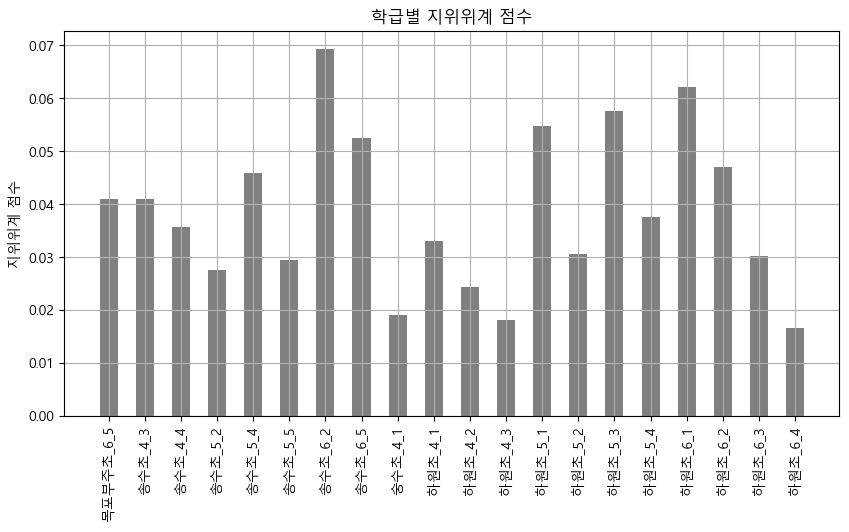

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

class_index = sch_stu_dict.keys()

# 데이터프레임으로 변환
score_df = pd.DataFrame(status_scores)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(class_index, score_df['status_score'], width=0.5, color='grey')
#plt.plot(class_index, score_df['status_score'], marker='o')
plt.xlabel("")
plt.ylabel("지위위계 점수")
plt.title("학급별 지위위계 점수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [50]:
score_df['status_score']

0     0.040958
1     0.041048
2     0.035698
3     0.027554
4     0.045890
5     0.029411
6     0.069276
7     0.052434
8     0.019067
9     0.033000
10    0.024440
11    0.018094
12    0.054694
13    0.030679
14    0.057554
15    0.037619
16    0.062196
17    0.047026
18    0.030194
19    0.016631
Name: status_score, dtype: float64

학생 : 41강*원 ,지명된 횟수 : 4 ,지명 가능한 수 : 142
학생 : 42권*연 ,지명된 횟수 : 6 ,지명 가능한 수 : 142
학생 : 43김*담 ,지명된 횟수 : 11 ,지명 가능한 수 : 142
학생 : 44김*완 ,지명된 횟수 : 6 ,지명 가능한 수 : 142
학생 : 45김*주 ,지명된 횟수 : 4 ,지명 가능한 수 : 142
학생 : 46문*진 ,지명된 횟수 : 6 ,지명 가능한 수 : 142
학생 : 47박*서 ,지명된 횟수 : 5 ,지명 가능한 수 : 142
학생 : 48박*주 ,지명된 횟수 : 11 ,지명 가능한 수 : 142
학생 : 49배* ,지명된 횟수 : 6 ,지명 가능한 수 : 142
학생 : 410서*호 ,지명된 횟수 : 10 ,지명 가능한 수 : 142
학생 : 411손*원 ,지명된 횟수 : 4 ,지명 가능한 수 : 142
학생 : 412송*우 ,지명된 횟수 : 5 ,지명 가능한 수 : 142
학생 : 413신*은 ,지명된 횟수 : 5 ,지명 가능한 수 : 142
학생 : 414안*민 ,지명된 횟수 : 4 ,지명 가능한 수 : 142
학생 : 415이*희 ,지명된 횟수 : 5 ,지명 가능한 수 : 142
학생 : 416이*은 ,지명된 횟수 : 10 ,지명 가능한 수 : 142
학생 : 417이*준 ,지명된 횟수 : 7 ,지명 가능한 수 : 142
학생 : 418장*우 ,지명된 횟수 : 8 ,지명 가능한 수 : 142
학생 : 419전*준 ,지명된 횟수 : 9 ,지명 가능한 수 : 142
학생 : 421조*윤 ,지명된 횟수 : 9 ,지명 가능한 수 : 142


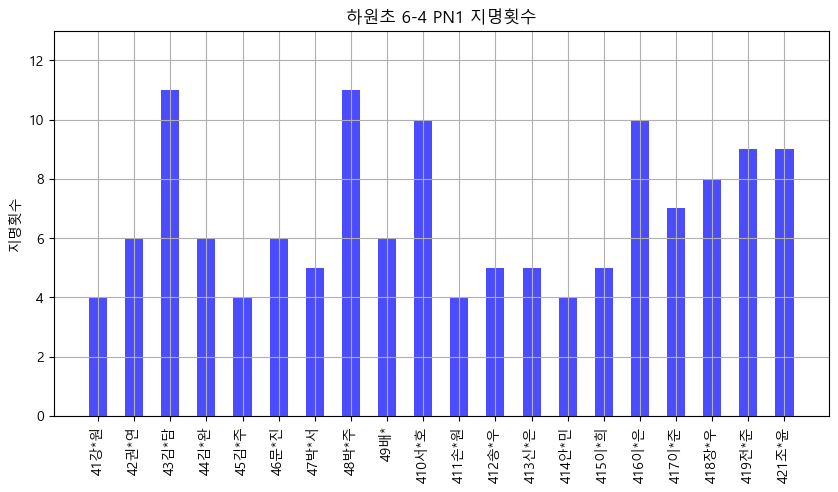

In [52]:
# 송수초 6-2 자세히 확인
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

_, _, counts = status_hierarchy(dfs['하원초_6_4'], ['PN1'], '하원초_6_4')

names = sch_stu_dict['하원초_6_4']

# 데이터프레임으로 변환
score_df = pd.DataFrame(status_scores)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(names, counts, width=0.5, color='blue', alpha=0.7)
plt.xlabel("")
plt.ylabel("지명횟수")
plt.ylim(0, 13)
plt.title("하원초 6-4 PN1 지명횟수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

학생 : 강기태 ,지명된 횟수 : 7 ,지명 가능한 수 : 59
학생 : 권휘준 ,지명된 횟수 : 12 ,지명 가능한 수 : 59
학생 : 김태현 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 박승유 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 박호윤 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 송윤호 ,지명된 횟수 : 10 ,지명 가능한 수 : 59
학생 : 아윤재 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 우상진 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 유태경 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 이경보 ,지명된 횟수 : 2 ,지명 가능한 수 : 59
학생 : 이준성 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 조이현 ,지명된 횟수 : 3 ,지명 가능한 수 : 59
학생 : 최지호 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 홍재원 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 김규리 ,지명된 횟수 : 7 ,지명 가능한 수 : 59
학생 : 김세원 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 노지안 ,지명된 횟수 : 1 ,지명 가능한 수 : 59
학생 : 박시은 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 박아현 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 이수현 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 장하윤 ,지명된 횟수 : 0 ,지명 가능한 수 : 59
학생 : 조자은 ,지명된 횟수 : 11 ,지명 가능한 수 : 59


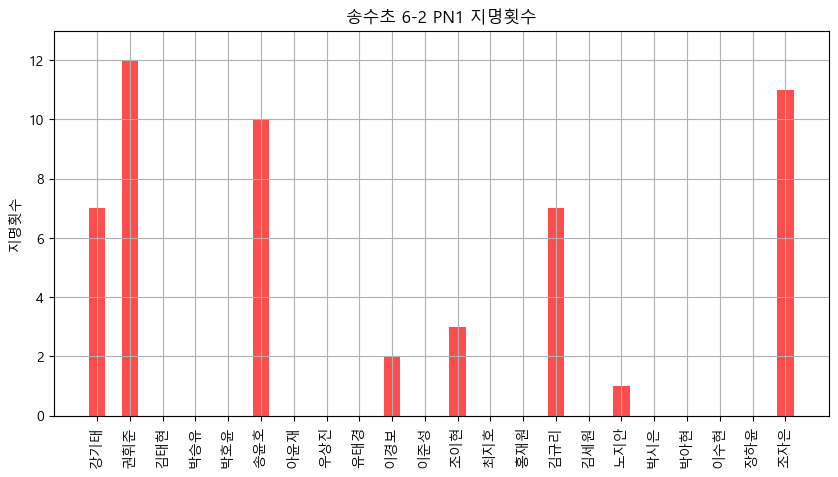

In [54]:
# 하원초 6-4 자세히 확인
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

_, _, counts = status_hierarchy(dfs['송수초_6_2'], ['PN1'], '송수초_6_2')

names = sch_stu_dict['송수초_6_2']

# 데이터프레임으로 변환
score_df = pd.DataFrame(status_scores)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(names, counts, width=0.5, color='red', alpha=0.7)
plt.xlabel("")
plt.ylabel("지명횟수")
plt.ylim(0, 13)
plt.title("송수초 6-2 PN1 지명횟수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [56]:
def aggression_norm_score(point_df):
    # 문항 묶음
    aggression_items = ['PN4', 'PN5', 'PN6', 'PN7']
    friend_item = ['PN14']

    학생 이름s = point_df['student_designation'].unique()
    combined_scores = []

    for name in 학생 이름s:
        # 공격성 문항 전체 비율점수 한 번에 계산
        aggr_ratio = point_ratio_score(point_df, aggression_items, name)
        friend_ratio = point_ratio_score(point_df, friend_item, name)

        score = aggr_ratio * friend_ratio
        combined_scores.append(score)

    class_mean = round(sum(combined_scores) / len(combined_scores), 3)
    return class_mean

In [33]:
aggression_score = []

for i, df in enumerate(dfs):
    try:
        class_mean = aggression_norm_score(df)
        aggression_score.append(class_mean)
    except Exception as e:
        print(f"학급 {i+1} 처리 중 오류 발생: {e}")

지명된 횟수 : 12 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 2 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 3 지명 가능한 수 : 40
지명된 횟수 : 1 지명 가능한 수 : 69
지명된 횟수 : 4 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 1 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 6 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 2 지명 가능한 수 : 40
지명된 횟수 : 4 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 1 지명 가능한 수 : 69
지명된 횟수 : 3 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 1 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 1 지명 가능한 수 : 40
지명된 횟수 : 6 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69

In [34]:
aggression_score

[0.002,
 0.001,
 0.001,
 0.001,
 0.002,
 0.001,
 0.002,
 0.002,
 0.001,
 0.001,
 0.001,
 0.002,
 0.002,
 0.001,
 0.002,
 0.002,
 0.002,
 0.002,
 0.002,
 0.001]

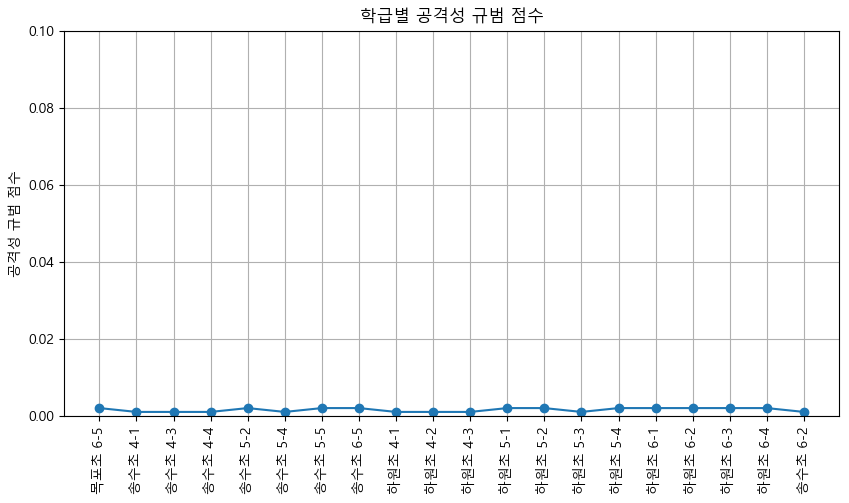

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

class_index = [
    "목포초 6-5",
    "송수초 4-1",
    "송수초 4-3",
    "송수초 4-4",
    "송수초 5-2",
    "송수초 5-4",
    "송수초 5-5",
    "송수초 6-5",
    "하원초 4-1",
    "하원초 4-2",
    "하원초 4-3",
    "하원초 5-1",
    "하원초 5-2",
    "하원초 5-3",
    "하원초 5-4",
    "하원초 6-1",
    "하원초 6-2",
    "하원초 6-3",
    "하원초 6-4",
    "송수초 6-2"]


# 데이터프레임으로 변환
score_df = pd.DataFrame(status_scores)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(class_index, aggression_score, marker='o')
plt.xlabel("")
plt.ylabel("공격성 규범 점수")
plt.ylim(0,0.1)
plt.title("학급별 공격성 규범 점수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

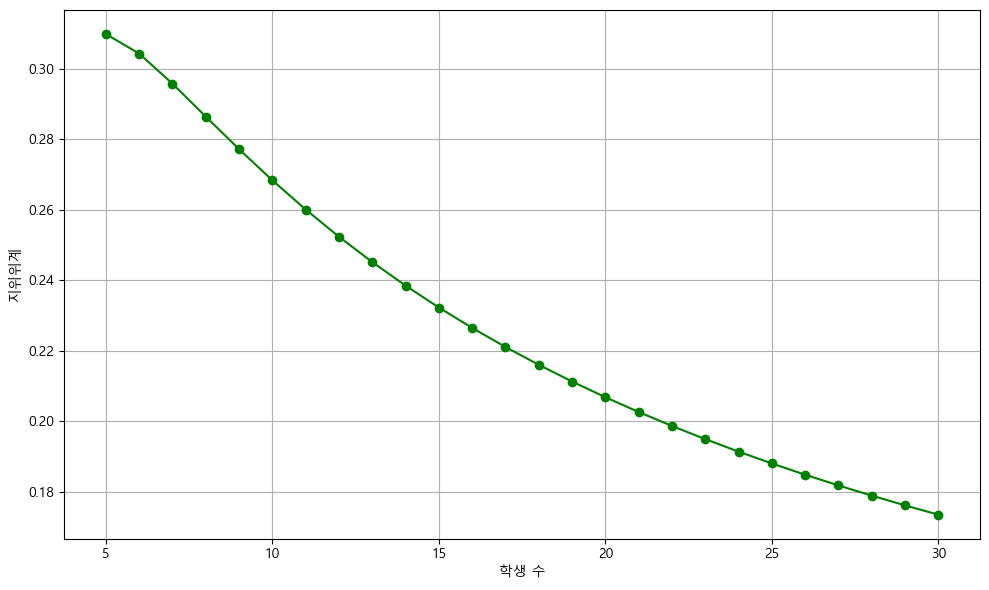

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# 학생 수 범위: 5명부터 30명까지
student_counts = list(range(5, 31))
std_ratios = []

for N in student_counts:
    # 극단적 위계: A는 N-1명에게 지명받음, A는 B만 지명
    counts = [N - 1, 1] + [0] * (N - 2)
    
    total_nominations = sum(counts)
    ratios = [x / total_nominations for x in counts]
    std_ratio = np.std(ratios)
    std_ratios.append(std_ratio)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(student_counts, std_ratios, color='green', marker='o')
plt.title("")
plt.xlabel("학생 수")
plt.ylabel("지위위계")
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
# 편차가 큰 학교
status_score, ratio_by_student, freq_list = status_hierarchy(dfs[19], ['PN1'])

std_dev = np.std(freq_list)
print(std_dev)

강기태
지명된 횟수 : 7 지명 가능한 수 : 59
권휘준
지명된 횟수 : 12 지명 가능한 수 : 59
김태현
지명된 횟수 : 0 지명 가능한 수 : 59
박승유
지명된 횟수 : 0 지명 가능한 수 : 59
박호윤
지명된 횟수 : 0 지명 가능한 수 : 59
송윤호
지명된 횟수 : 10 지명 가능한 수 : 59
아윤재
지명된 횟수 : 0 지명 가능한 수 : 59
우상진
지명된 횟수 : 0 지명 가능한 수 : 59
유태경
지명된 횟수 : 0 지명 가능한 수 : 59
이경보
지명된 횟수 : 2 지명 가능한 수 : 59
이준성
지명된 횟수 : 0 지명 가능한 수 : 59
조이현
지명된 횟수 : 3 지명 가능한 수 : 59
최지호
지명된 횟수 : 0 지명 가능한 수 : 59
홍재원
지명된 횟수 : 0 지명 가능한 수 : 59
김규리
지명된 횟수 : 7 지명 가능한 수 : 59
김세원
지명된 횟수 : 0 지명 가능한 수 : 59
노지안
지명된 횟수 : 1 지명 가능한 수 : 59
박아현
지명된 횟수 : 0 지명 가능한 수 : 59
이수현
지명된 횟수 : 0 지명 가능한 수 : 59
장하윤
지명된 횟수 : 0 지명 가능한 수 : 59
조자은
지명된 횟수 : 11 지명 가능한 수 : 59
0.07036638808002418
4.042854338436404


In [239]:
# 편차가 작은 학교
status_score, ratio_by_student, freq_list = status_hierarchy(dfs[19], ['PN1'])

std_dev = np.std(freq_list)
print(std_dev)

지명된 횟수 : 7 지명 가능한 수 : 59
지명된 횟수 : 12 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 10 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 2 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 3 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 7 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 1 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 11 지명 가능한 수 : 59
4.042854338436404


학생 : 51강*욱 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 52곽*중 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 53김*재 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 54김*은 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 55김*우 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 56김*홍 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 57김*윤 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 58박*형 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 59박*린 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 510박*우 지명된 횟수 : 6 지명 가능한 수 : 80
학생 : 511박*유 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 512배*을 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 513서*웅 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 514오*서 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 516이*영 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 517이* 지명된 횟수 : 2 지명 가능한 수 : 80
학생 : 518*훈 지명된 횟수 : 2 지명 가능한 수 : 80
학생 : 519장*준 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 520장*수 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 521정***타 지명된 횟수 : 17 지명 가능한 수 : 80
학생 : 523진*랑 지명된 횟수 : 6 지명 가능한 수 : 80
학생 : 524최*원 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 525최*예 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 526홍*경 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 김관우 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 김병하 지명된 횟수 : 2 지명 가능한 수 : 113
학생 : 김태훈 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 남윤우 지명된 횟수

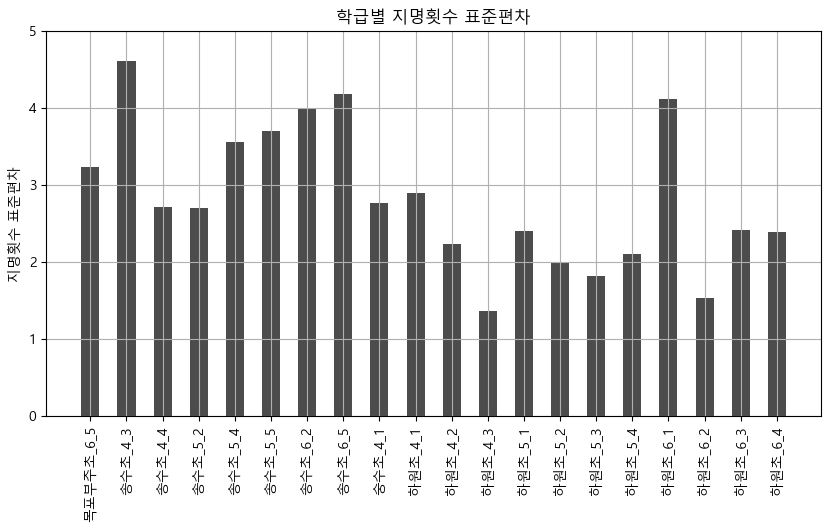

In [224]:
import numpy as np
import matplotlib.pyplot as plt

point_std = []
for i in sch_stu_dict.keys() :
    status_score, ratio_by_student, freq_list = status_hierarchy(dfs[i], ['PN1'], i)
    std_dev = np.std(freq_list)
    #print(f'지명횟수 표준편차 :{std_dev}')
    point_std.append(std_dev)


# 시각화
plt.figure(figsize=(10, 5))
plt.bar(class_index, point_std, width=0.5, color='black', alpha=0.7)
plt.xlabel("")
plt.ylabel("지명횟수 표준편차")
plt.ylim(0, 5)
plt.title("학급별 지명횟수 표준편차")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

학생 : 김관우 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 김병하 지명된 횟수 : 2 지명 가능한 수 : 113
학생 : 김태훈 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 남윤우 지명된 횟수 : 2 지명 가능한 수 : 113
학생 : 신원재 지명된 횟수 : 10 지명 가능한 수 : 113
학생 : 윤대웅 지명된 횟수 : 4 지명 가능한 수 : 113
학생 : 이범준 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 이준서 지명된 횟수 : 5 지명 가능한 수 : 113
학생 : 장지욱 지명된 횟수 : 2 지명 가능한 수 : 113
학생 : 정해람 지명된 횟수 : 10 지명 가능한 수 : 113
학생 : 조예준 지명된 횟수 : 2 지명 가능한 수 : 113
학생 : 홍종빈 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 황규진 지명된 횟수 : 10 지명 가능한 수 : 113
학생 : 강주은 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 고나은 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 김나현 지명된 횟수 : 2 지명 가능한 수 : 113
학생 : 김다혜 지명된 횟수 : 5 지명 가능한 수 : 113
학생 : 김서하 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 김세연 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 밀라드아리아로빈은유 지명된 횟수 : 4 지명 가능한 수 : 113
학생 : 박여울 지명된 횟수 : 4 지명 가능한 수 : 113
학생 : 변서유 지명된 횟수 : 18 지명 가능한 수 : 113
학생 : 송유안 지명된 횟수 : 6 지명 가능한 수 : 113
학생 : 이하린 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 정라원 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 정은우 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 한서연 지명된 횟수 : 16 지명 가능한 수 : 113


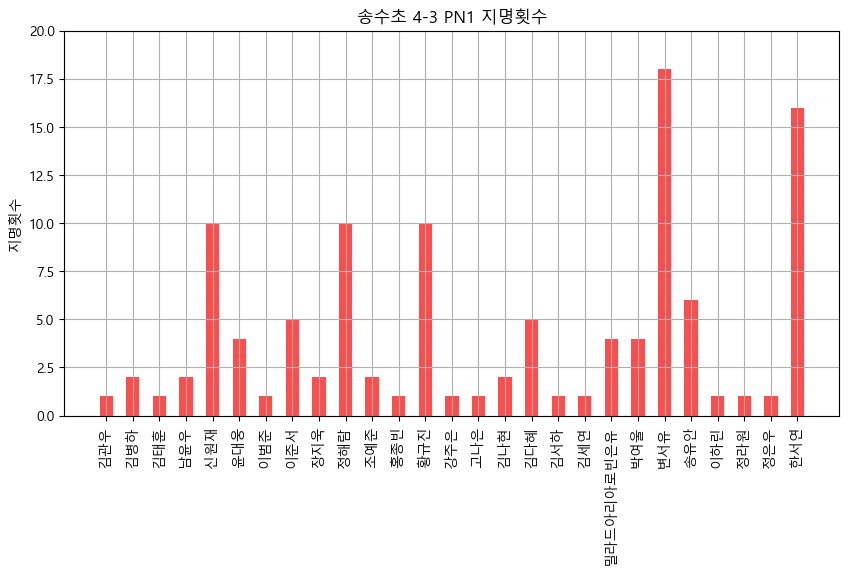

In [232]:
# 송수초 4-3 자세히 확인
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

a, b, counts = status_hierarchy(dfs['송수초_4_3'], ['PN1'], '송수초_4_3')

names = sch_stu_dict['송수초_4_3']

# 데이터프레임으로 변환
score_df = pd.DataFrame(status_scores)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(names, counts, width=0.5, color='red', alpha=0.7)
plt.xlabel("")
plt.ylabel("지명횟수")
plt.ylim(0, 20)
plt.title("송수초 4-3 PN1 지명횟수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

학생 : 31강*아 지명된 횟수 : 4 지명 가능한 수 : 76
학생 : 32김*경 지명된 횟수 : 1 지명 가능한 수 : 76
학생 : 33김*서 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 34김*윤 지명된 횟수 : 1 지명 가능한 수 : 76
학생 : 35김*준 지명된 횟수 : 4 지명 가능한 수 : 76
학생 : 36김*윤 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 37민*윤 지명된 횟수 : 6 지명 가능한 수 : 76
학생 : 38박*은 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 39박*윤 지명된 횟수 : 4 지명 가능한 수 : 76
학생 : 310서*무 지명된 횟수 : 3 지명 가능한 수 : 76
학생 : 311선*빈 지명된 횟수 : 4 지명 가능한 수 : 76
학생 : 312오*우 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 313유*혁 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 314은*민 지명된 횟수 : 5 지명 가능한 수 : 76
학생 : 315이*윤 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 316이*홍 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 317이*찬 지명된 횟수 : 3 지명 가능한 수 : 76
학생 : 318이*용 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 319이*수 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 320이*호 지명된 횟수 : 6 지명 가능한 수 : 76
학생 : 321장*은 지명된 횟수 : 3 지명 가능한 수 : 76
학생 : 322장*진 지명된 횟수 : 3 지명 가능한 수 : 76
학생 : 323채*성 지명된 횟수 : 3 지명 가능한 수 : 76
학생 : 324최*준 지명된 횟수 : 1 지명 가능한 수 : 76
학생 : 325최*종 지명된 횟수 : 4 지명 가능한 수 : 76
학생 : 326한*서 지명된 횟수 : 3 지명 가능한 수 : 76


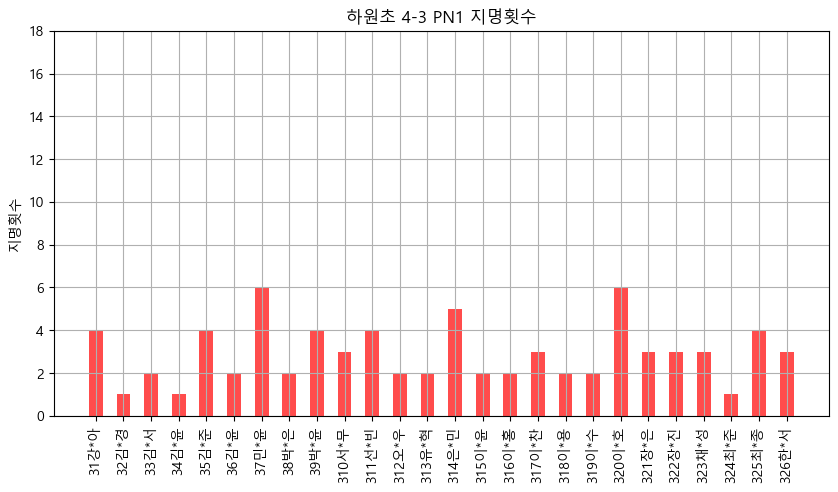

In [230]:
# 하원초 4-3 자세히 확인
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

a, b, counts = status_hierarchy(dfs['하원초_4_3'], ['PN1'], '하원초_4_3')

names = sch_stu_dict['하원초_4_3']

# 데이터프레임으로 변환
score_df = pd.DataFrame(status_scores)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(names, counts, width=0.5, color='red', alpha=0.7)
plt.xlabel("")
plt.ylabel("지명횟수")
plt.ylim(0, 18)
plt.title("하원초 4-3 PN1 지명횟수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

학생 : 51강*욱 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 52곽*중 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 53김*재 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 54김*은 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 55김*우 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 56김*홍 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 57김*윤 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 58박*형 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 59박*린 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 510박*우 지명된 횟수 : 6 지명 가능한 수 : 80
학생 : 511박*유 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 512배*을 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 513서*웅 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 514오*서 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 516이*영 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 517이* 지명된 횟수 : 2 지명 가능한 수 : 80
학생 : 518*훈 지명된 횟수 : 2 지명 가능한 수 : 80
학생 : 519장*준 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 520장*수 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 521정***타 지명된 횟수 : 17 지명 가능한 수 : 80
학생 : 523진*랑 지명된 횟수 : 6 지명 가능한 수 : 80
학생 : 524최*원 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 525최*예 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 526홍*경 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 김관우 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 김병하 지명된 횟수 : 2 지명 가능한 수 : 113
학생 : 김태훈 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 남윤우 지명된 횟수

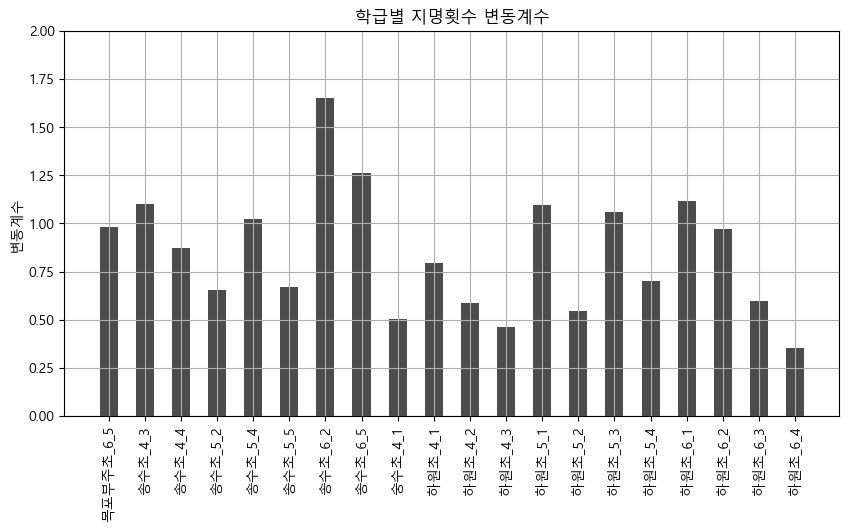

In [271]:
# 변동계수로 탐색
import numpy as np
import matplotlib.pyplot as plt

point_cv = []
for i in sch_stu_dict.keys() :
    status_score, ratio_by_student, freq_list = status_hierarchy(dfs[i], ['PN1'], i)
    mean = np.mean(freq_list)
    sd = np.std(freq_list)
    cd = sd / mean
    point_cv.append(cd)


# 시각화
plt.figure(figsize=(10, 5))
plt.bar(class_index, point_cv, width=0.5, color='black', alpha=0.7)
plt.xlabel("")
plt.ylabel("변동계수")
plt.ylim(0, 2)
plt.title("학급별 지명횟수 변동계수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [293]:
import numpy as np

# ✅ 1. 지니계수 계산 함수
def compute_gini(freq_list):
    x = np.array(freq_list)
    n = len(x)
    if np.sum(x) == 0:
        return 0.0  # 모두 0이면 불평등도도 없음
    # 정렬된 누적차 계산
    sorted_x = np.sort(x)
    cumulative_diffs = np.abs(sorted_x[:, None] - sorted_x)  # |xi - xj|
    total_diff_sum = np.sum(cumulative_diffs)
    gini = total_diff_sum / (2 * n**2 * np.mean(x))
    return gini

# ✅ 2. 1~5 점수로 선형 변환하는 함수
def gini_to_score(gini_value, min_gini=0.0, max_gini=0.6):
    # max_gini는 경험적으로 조정 가능
    gini_clipped = max(min(gini_value, max_gini), min_gini)
    score = (gini_clipped - min_gini) / (max_gini - min_gini) * 4 + 1
    return round(score, 2)

def gini_to_score_simple(gini):
    return round(1 + 4 * gini, 2)

# ✅ 3. 전체 적용 예시
freq_list = [3, 2, 1, 1]  # 예시: 학급 학생별 받은 지명 수

gini_val = compute_gini(freq_list)
gini_score = gini_to_score_simple(gini_val)

print(f"지니계수: {gini_val:.4f}")
print(f"지위위계 점수 (1~5): {gini_score}")

지니계수: 0.2500
지위위계 점수 (1~5): 2.0


학생 : 51강*욱 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 52곽*중 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 53김*재 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 54김*은 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 55김*우 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 56김*홍 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 57김*윤 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 58박*형 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 59박*린 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 510박*우 지명된 횟수 : 6 지명 가능한 수 : 80
학생 : 511박*유 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 512배*을 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 513서*웅 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 514오*서 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 516이*영 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 517이* 지명된 횟수 : 2 지명 가능한 수 : 80
학생 : 518*훈 지명된 횟수 : 2 지명 가능한 수 : 80
학생 : 519장*준 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 520장*수 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 521정***타 지명된 횟수 : 17 지명 가능한 수 : 80
학생 : 523진*랑 지명된 횟수 : 6 지명 가능한 수 : 80
학생 : 524최*원 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 525최*예 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 526홍*경 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 김관우 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 김병하 지명된 횟수 : 2 지명 가능한 수 : 113
학생 : 김태훈 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 남윤우 지명된 횟수

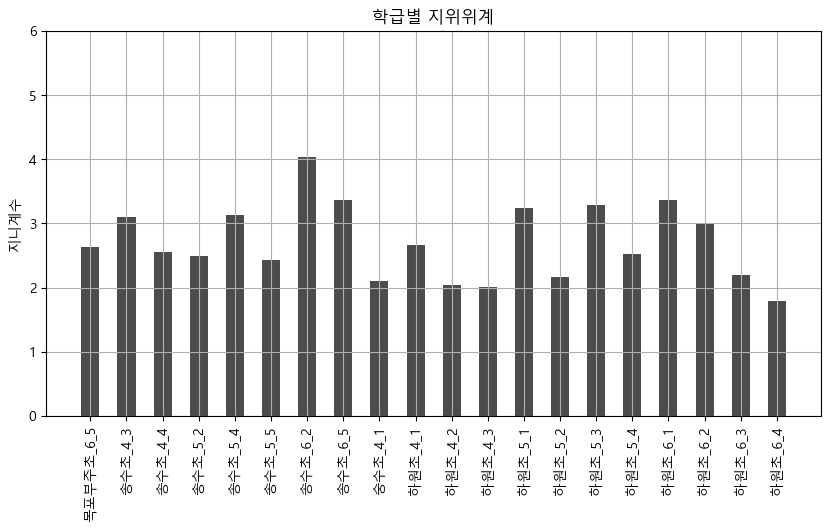

In [299]:
# 변동계수로 탐색
import numpy as np
import matplotlib.pyplot as plt

point_gini = []
for i in sch_stu_dict.keys() :
    status_score, ratio_by_student, freq_list = status_hierarchy(dfs[i], ['PN1'], i)
    gini = compute_gini(freq_list)
    gini_score = gini_to_score_simple(gini)
    point_gini.append(gini_score)


# 시각화
plt.figure(figsize=(10, 5))
plt.bar(class_index, point_gini, width=0.5, color='black', alpha=0.7)
plt.xlabel("")
plt.ylabel("지니계수")
plt.ylim(0, 6)
plt.title("학급별 지위위계")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

학생 : 51강*욱 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 52곽*중 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 53김*재 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 54김*은 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 55김*우 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 56김*홍 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 57김*윤 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 58박*형 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 59박*린 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 510박*우 지명된 횟수 : 6 지명 가능한 수 : 80
학생 : 511박*유 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 512배*을 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 513서*웅 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 514오*서 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 516이*영 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 517이* 지명된 횟수 : 2 지명 가능한 수 : 80
학생 : 518*훈 지명된 횟수 : 2 지명 가능한 수 : 80
학생 : 519장*준 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 520장*수 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 521정***타 지명된 횟수 : 17 지명 가능한 수 : 80
학생 : 523진*랑 지명된 횟수 : 6 지명 가능한 수 : 80
학생 : 524최*원 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 525최*예 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 526홍*경 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 김관우 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 김병하 지명된 횟수 : 2 지명 가능한 수 : 113
학생 : 김태훈 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 남윤우 지명된 횟수

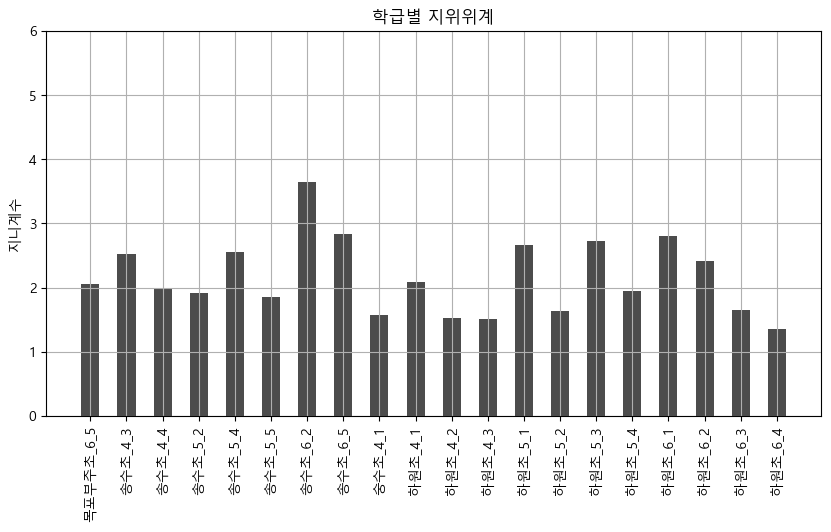

In [301]:
def gini_to_adjusted_score(gini, gamma=1.5):
    score = 1 + 4 * (gini ** gamma)
    return round(score, 2)

# 변동계수로 탐색
import numpy as np
import matplotlib.pyplot as plt

point_gini = []
for i in sch_stu_dict.keys() :
    status_score, ratio_by_student, freq_list = status_hierarchy(dfs[i], ['PN1'], i)
    gini = compute_gini(freq_list)
    gini_score = gini_to_adjusted_score(gini, gamma=1.5)
    point_gini.append(gini_score)


# 시각화
plt.figure(figsize=(10, 5))
plt.bar(class_index, point_gini, width=0.5, color='black', alpha=0.7)
plt.xlabel("")
plt.ylabel("지니계수")
plt.ylim(0, 6)
plt.title("학급별 지위위계")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

목포부주초_6_5
학생 : 51강*욱 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 52곽*중 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 53김*재 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 54김*은 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 55김*우 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 56김*홍 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 57김*윤 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 58박*형 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 59박*린 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 510박*우 지명된 횟수 : 6 지명 가능한 수 : 80
학생 : 511박*유 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 512배*을 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 513서*웅 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 514오*서 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 516이*영 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 517이* 지명된 횟수 : 2 지명 가능한 수 : 80
학생 : 518*훈 지명된 횟수 : 2 지명 가능한 수 : 80
학생 : 519장*준 지명된 횟수 : 1 지명 가능한 수 : 80
학생 : 520장*수 지명된 횟수 : 4 지명 가능한 수 : 80
학생 : 521정***타 지명된 횟수 : 17 지명 가능한 수 : 80
학생 : 523진*랑 지명된 횟수 : 6 지명 가능한 수 : 80
학생 : 524최*원 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 525최*예 지명된 횟수 : 3 지명 가능한 수 : 80
학생 : 526홍*경 지명된 횟수 : 1 지명 가능한 수 : 80


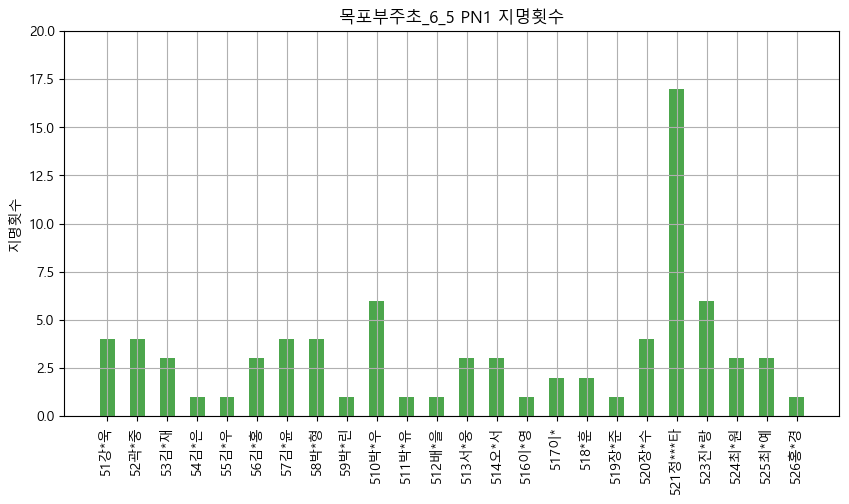

송수초_4_3
학생 : 김관우 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 김병하 지명된 횟수 : 2 지명 가능한 수 : 113
학생 : 김태훈 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 남윤우 지명된 횟수 : 2 지명 가능한 수 : 113
학생 : 신원재 지명된 횟수 : 10 지명 가능한 수 : 113
학생 : 윤대웅 지명된 횟수 : 4 지명 가능한 수 : 113
학생 : 이범준 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 이준서 지명된 횟수 : 5 지명 가능한 수 : 113
학생 : 장지욱 지명된 횟수 : 2 지명 가능한 수 : 113
학생 : 정해람 지명된 횟수 : 10 지명 가능한 수 : 113
학생 : 조예준 지명된 횟수 : 2 지명 가능한 수 : 113
학생 : 홍종빈 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 황규진 지명된 횟수 : 10 지명 가능한 수 : 113
학생 : 강주은 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 고나은 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 김나현 지명된 횟수 : 2 지명 가능한 수 : 113
학생 : 김다혜 지명된 횟수 : 5 지명 가능한 수 : 113
학생 : 김서하 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 김세연 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 밀라드아리아로빈은유 지명된 횟수 : 4 지명 가능한 수 : 113
학생 : 박여울 지명된 횟수 : 4 지명 가능한 수 : 113
학생 : 변서유 지명된 횟수 : 18 지명 가능한 수 : 113
학생 : 송유안 지명된 횟수 : 6 지명 가능한 수 : 113
학생 : 이하린 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 정라원 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 정은우 지명된 횟수 : 1 지명 가능한 수 : 113
학생 : 한서연 지명된 횟수 : 16 지명 가능한 수 : 113


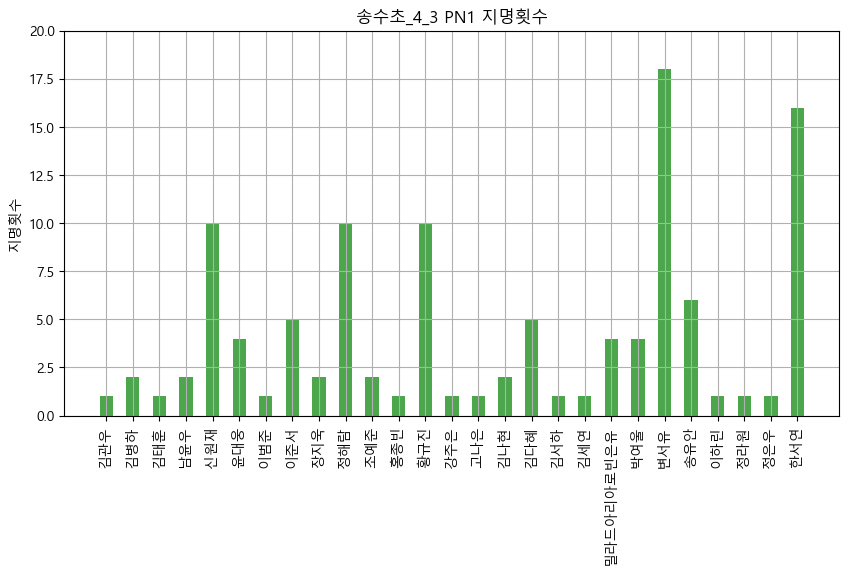

송수초_4_4
학생 : 김도윤 지명된 횟수 : 1 지명 가능한 수 : 79
학생 : 김서준 지명된 횟수 : 4 지명 가능한 수 : 79
학생 : 김서진 지명된 횟수 : 2 지명 가능한 수 : 79
학생 : 김주원 지명된 횟수 : 3 지명 가능한 수 : 79
학생 : 김지한 지명된 횟수 : 7 지명 가능한 수 : 79
학생 : 김하랑 지명된 횟수 : 2 지명 가능한 수 : 79
학생 : 손호진 지명된 횟수 : 1 지명 가능한 수 : 79
학생 : 이승유 지명된 횟수 : 1 지명 가능한 수 : 79
학생 : 이승주 지명된 횟수 : 2 지명 가능한 수 : 79
학생 : 정재준 지명된 횟수 : 4 지명 가능한 수 : 79
학생 : 조영원 지명된 횟수 : 4 지명 가능한 수 : 79
학생 : 홍주현 지명된 횟수 : 3 지명 가능한 수 : 79
학생 : 조민성 지명된 횟수 : 2 지명 가능한 수 : 79
학생 : 강민지 지명된 횟수 : 3 지명 가능한 수 : 79
학생 : 김서현 지명된 횟수 : 2 지명 가능한 수 : 79
학생 : 김시호 지명된 횟수 : 2 지명 가능한 수 : 79
학생 : 남유진 지명된 횟수 : 5 지명 가능한 수 : 79
학생 : 안소율 지명된 횟수 : 6 지명 가능한 수 : 79
학생 : 양라빈 지명된 횟수 : 1 지명 가능한 수 : 79
학생 : 유연우 지명된 횟수 : 1 지명 가능한 수 : 79
학생 : 이수아 지명된 횟수 : 2 지명 가능한 수 : 79
학생 : 이지우 지명된 횟수 : 3 지명 가능한 수 : 79
학생 : 조은우 지명된 횟수 : 14 지명 가능한 수 : 79
학생 : 표윤희 지명된 횟수 : 2 지명 가능한 수 : 79
학생 : 허은수 지명된 횟수 : 1 지명 가능한 수 : 79


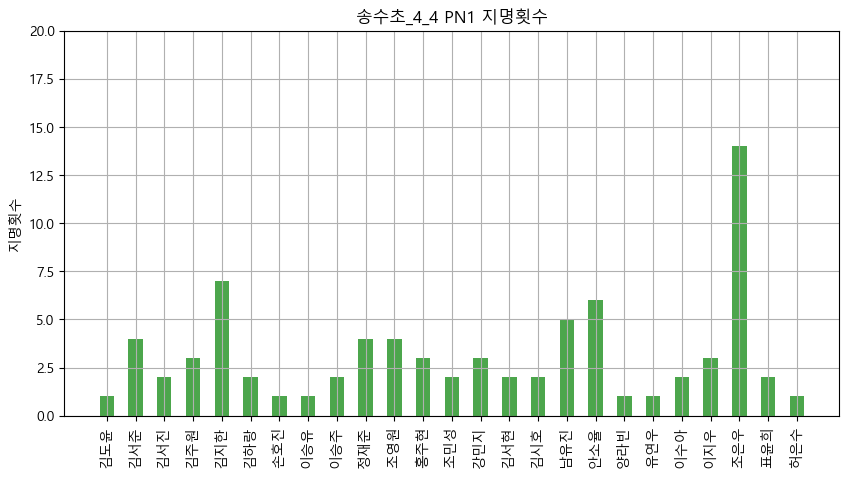

송수초_5_2
학생 : 강윤우 지명된 횟수 : 7 지명 가능한 수 : 99
학생 : 김정진 지명된 횟수 : 3 지명 가능한 수 : 99
학생 : 김채우 지명된 횟수 : 5 지명 가능한 수 : 99
학생 : 김한겸 지명된 횟수 : 6 지명 가능한 수 : 99
학생 : 박지성 지명된 횟수 : 7 지명 가능한 수 : 99
학생 : 백동우 지명된 횟수 : 8 지명 가능한 수 : 99
학생 : 백준우 지명된 횟수 : 8 지명 가능한 수 : 99
학생 : 이동건 지명된 횟수 : 3 지명 가능한 수 : 99
학생 : 임지원 지명된 횟수 : 3 지명 가능한 수 : 99
학생 : 표재민 지명된 횟수 : 4 지명 가능한 수 : 99
학생 : 홍주원 지명된 횟수 : 5 지명 가능한 수 : 99
학생 : 강보민 지명된 횟수 : 0 지명 가능한 수 : 99
학생 : 김라은 지명된 횟수 : 0 지명 가능한 수 : 99
학생 : 김민서 지명된 횟수 : 6 지명 가능한 수 : 99
학생 : 김태린 지명된 횟수 : 0 지명 가능한 수 : 99
학생 : 박지아 지명된 횟수 : 7 지명 가능한 수 : 99
학생 : 예지우 지명된 횟수 : 7 지명 가능한 수 : 99
학생 : 오예진 지명된 횟수 : 0 지명 가능한 수 : 99
학생 : 이서현 지명된 횟수 : 2 지명 가능한 수 : 99
학생 : 정예슬 지명된 횟수 : 6 지명 가능한 수 : 99
학생 : 최연우 지명된 횟수 : 4 지명 가능한 수 : 99
학생 : 하지민 지명된 횟수 : 1 지명 가능한 수 : 99
학생 : 한예주 지명된 횟수 : 1 지명 가능한 수 : 99
학생 : 허수빈 지명된 횟수 : 6 지명 가능한 수 : 99


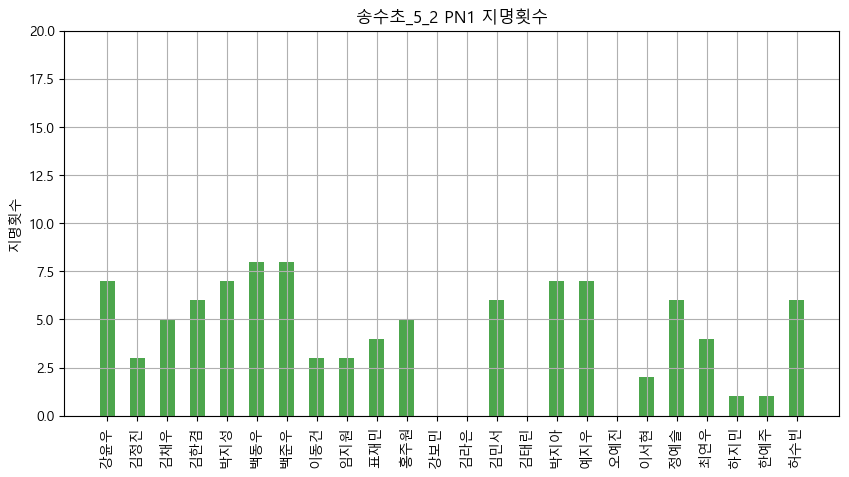

송수초_5_4
학생 : 강우진 지명된 횟수 : 0 지명 가능한 수 : 82
학생 : 김승윤 지명된 횟수 : 2 지명 가능한 수 : 82
학생 : 안태현 지명된 횟수 : 2 지명 가능한 수 : 82
학생 : 옥준우 지명된 횟수 : 7 지명 가능한 수 : 82
학생 : 왕찬우 지명된 횟수 : 14 지명 가능한 수 : 82
학생 : 이규현 지명된 횟수 : 1 지명 가능한 수 : 82
학생 : 이승현 지명된 횟수 : 8 지명 가능한 수 : 82
학생 : 이지환 지명된 횟수 : 5 지명 가능한 수 : 82
학생 : 정민형 지명된 횟수 : 0 지명 가능한 수 : 82
학생 : 최주환 지명된 횟수 : 8 지명 가능한 수 : 82
학생 : 최준혁 지명된 횟수 : 1 지명 가능한 수 : 82
학생 : 강다연 지명된 횟수 : 2 지명 가능한 수 : 82
학생 : 김민서 지명된 횟수 : 8 지명 가능한 수 : 82
학생 : 배희주 지명된 횟수 : 5 지명 가능한 수 : 82
학생 : 성하윤 지명된 횟수 : 1 지명 가능한 수 : 82
학생 : 안서연 지명된 횟수 : 7 지명 가능한 수 : 82
학생 : 엽지원 지명된 횟수 : 1 지명 가능한 수 : 82
학생 : 이정인 지명된 횟수 : 2 지명 가능한 수 : 82
학생 : 이혜원 지명된 횟수 : 0 지명 가능한 수 : 82
학생 : 임윤서 지명된 횟수 : 1 지명 가능한 수 : 82
학생 : 최은서 지명된 횟수 : 0 지명 가능한 수 : 82
학생 : 하민경 지명된 횟수 : 3 지명 가능한 수 : 82
학생 : 홍윤지 지명된 횟수 : 2 지명 가능한 수 : 82


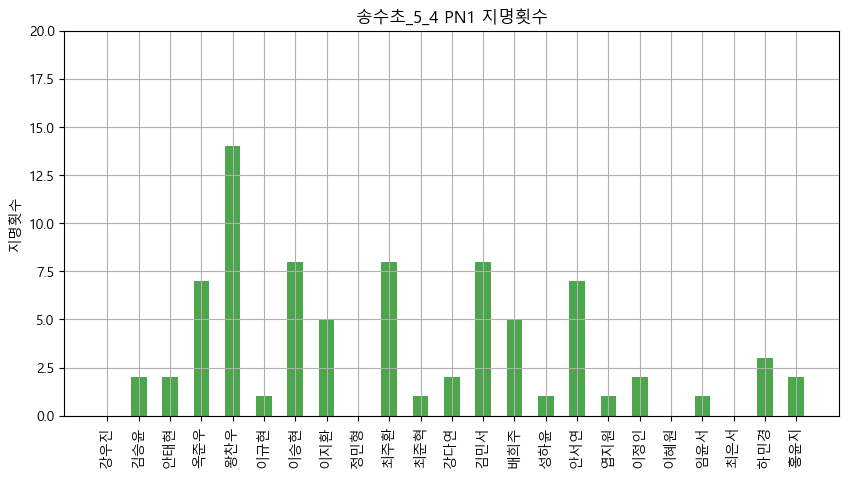

송수초_5_5
학생 : 강율 지명된 횟수 : 14 지명 가능한 수 : 133
학생 : 고도윤 지명된 횟수 : 12 지명 가능한 수 : 133
학생 : 김강민 지명된 횟수 : 6 지명 가능한 수 : 133
학생 : 김민준 지명된 횟수 : 4 지명 가능한 수 : 133
학생 : 김서준 지명된 횟수 : 2 지명 가능한 수 : 133
학생 : 김서진 지명된 횟수 : 1 지명 가능한 수 : 133
학생 : 김휘수 지명된 횟수 : 14 지명 가능한 수 : 133
학생 : 박제희 지명된 횟수 : 6 지명 가능한 수 : 133
학생 : 이준서 지명된 횟수 : 1 지명 가능한 수 : 133
학생 : 이창현 지명된 횟수 : 0 지명 가능한 수 : 133
학생 : 정승하 지명된 횟수 : 4 지명 가능한 수 : 133
학생 : 권가온 지명된 횟수 : 6 지명 가능한 수 : 133
학생 : 김지유 지명된 횟수 : 7 지명 가능한 수 : 133
학생 : 김태희 지명된 횟수 : 4 지명 가능한 수 : 133
학생 : 맹성리 지명된 횟수 : 3 지명 가능한 수 : 133
학생 : 박규리 지명된 횟수 : 6 지명 가능한 수 : 133
학생 : 배서현 지명된 횟수 : 5 지명 가능한 수 : 133
학생 : 양은서 지명된 횟수 : 7 지명 가능한 수 : 133
학생 : 오윤 지명된 횟수 : 7 지명 가능한 수 : 133
학생 : 유민아 지명된 횟수 : 3 지명 가능한 수 : 133
학생 : 이수연 지명된 횟수 : 3 지명 가능한 수 : 133
학생 : 정리은 지명된 횟수 : 4 지명 가능한 수 : 133
학생 : 조아인 지명된 횟수 : 4 지명 가능한 수 : 133
학생 : 최수빈 지명된 횟수 : 10 지명 가능한 수 : 133


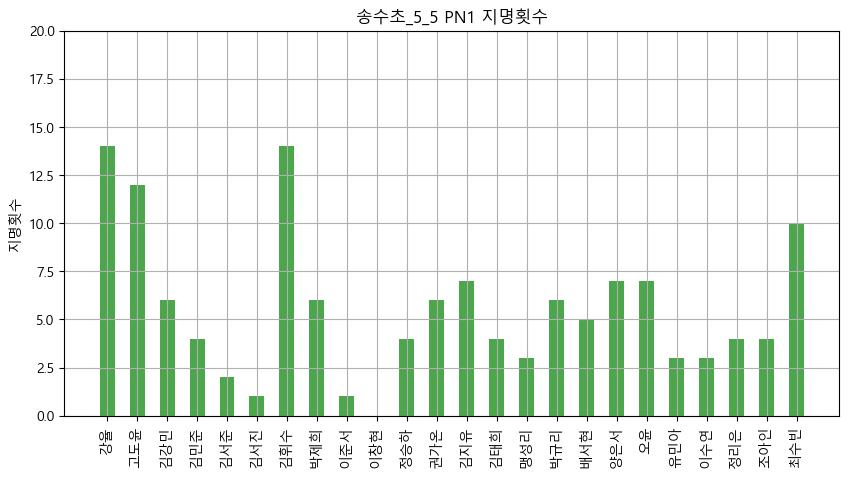

송수초_6_2
학생 : 강기태 지명된 횟수 : 7 지명 가능한 수 : 59
학생 : 권휘준 지명된 횟수 : 12 지명 가능한 수 : 59
학생 : 김태현 지명된 횟수 : 0 지명 가능한 수 : 59
학생 : 박승유 지명된 횟수 : 0 지명 가능한 수 : 59
학생 : 박호윤 지명된 횟수 : 0 지명 가능한 수 : 59
학생 : 송윤호 지명된 횟수 : 10 지명 가능한 수 : 59
학생 : 아윤재 지명된 횟수 : 0 지명 가능한 수 : 59
학생 : 우상진 지명된 횟수 : 0 지명 가능한 수 : 59
학생 : 유태경 지명된 횟수 : 0 지명 가능한 수 : 59
학생 : 이경보 지명된 횟수 : 2 지명 가능한 수 : 59
학생 : 이준성 지명된 횟수 : 0 지명 가능한 수 : 59
학생 : 조이현 지명된 횟수 : 3 지명 가능한 수 : 59
학생 : 최지호 지명된 횟수 : 0 지명 가능한 수 : 59
학생 : 홍재원 지명된 횟수 : 0 지명 가능한 수 : 59
학생 : 김규리 지명된 횟수 : 7 지명 가능한 수 : 59
학생 : 김세원 지명된 횟수 : 0 지명 가능한 수 : 59
학생 : 노지안 지명된 횟수 : 1 지명 가능한 수 : 59
학생 : 박시은 지명된 횟수 : 0 지명 가능한 수 : 59
학생 : 박아현 지명된 횟수 : 0 지명 가능한 수 : 59
학생 : 이수현 지명된 횟수 : 0 지명 가능한 수 : 59
학생 : 장하윤 지명된 횟수 : 0 지명 가능한 수 : 59
학생 : 조자은 지명된 횟수 : 11 지명 가능한 수 : 59


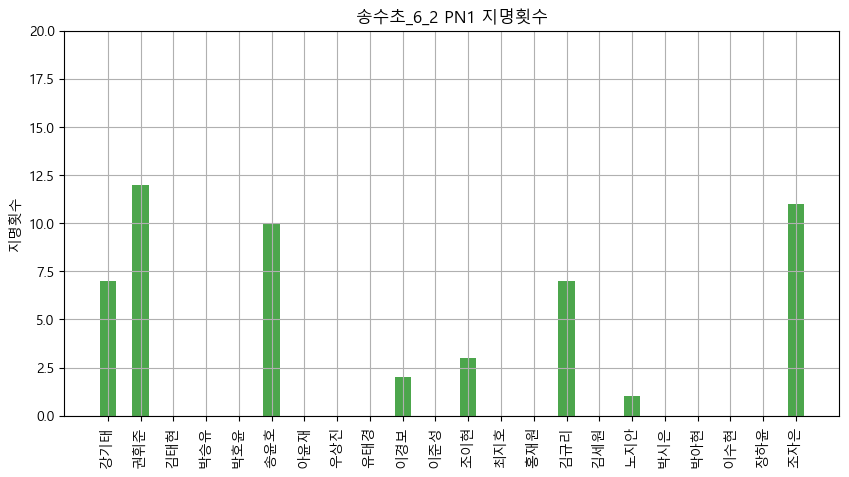

송수초_6_5
학생 : 김동영 지명된 횟수 : 8 지명 가능한 수 : 83
학생 : 김준경 지명된 횟수 : 0 지명 가능한 수 : 83
학생 : 박건형 지명된 횟수 : 1 지명 가능한 수 : 83
학생 : 이민형 지명된 횟수 : 2 지명 가능한 수 : 83
학생 : 이서원 지명된 횟수 : 0 지명 가능한 수 : 83
학생 : 이재서 지명된 횟수 : 0 지명 가능한 수 : 83
학생 : 정우진 지명된 횟수 : 3 지명 가능한 수 : 83
학생 : 조동규 지명된 횟수 : 10 지명 가능한 수 : 83
학생 : 진유환 지명된 횟수 : 3 지명 가능한 수 : 83
학생 : 천재원 지명된 횟수 : 18 지명 가능한 수 : 83
학생 : 최승우 지명된 횟수 : 0 지명 가능한 수 : 83
학생 : 최우준 지명된 횟수 : 10 지명 가능한 수 : 83
학생 : 현가원 지명된 횟수 : 1 지명 가능한 수 : 83
학생 : 김민호 지명된 횟수 : 1 지명 가능한 수 : 83
학생 : 김경현 지명된 횟수 : 2 지명 가능한 수 : 83
학생 : 김은송 지명된 횟수 : 2 지명 가능한 수 : 83
학생 : 김태은 지명된 횟수 : 1 지명 가능한 수 : 83
학생 : 송예모 지명된 횟수 : 1 지명 가능한 수 : 83
학생 : 안유진 지명된 횟수 : 3 지명 가능한 수 : 83
학생 : 이나연 지명된 횟수 : 2 지명 가능한 수 : 83
학생 : 이다은 지명된 횟수 : 6 지명 가능한 수 : 83
학생 : 이채영 지명된 횟수 : 6 지명 가능한 수 : 83
학생 : 이채원 지명된 횟수 : 1 지명 가능한 수 : 83
학생 : 장하윤 지명된 횟수 : 2 지명 가능한 수 : 83
학생 : 현라원 지명된 횟수 : 0 지명 가능한 수 : 83


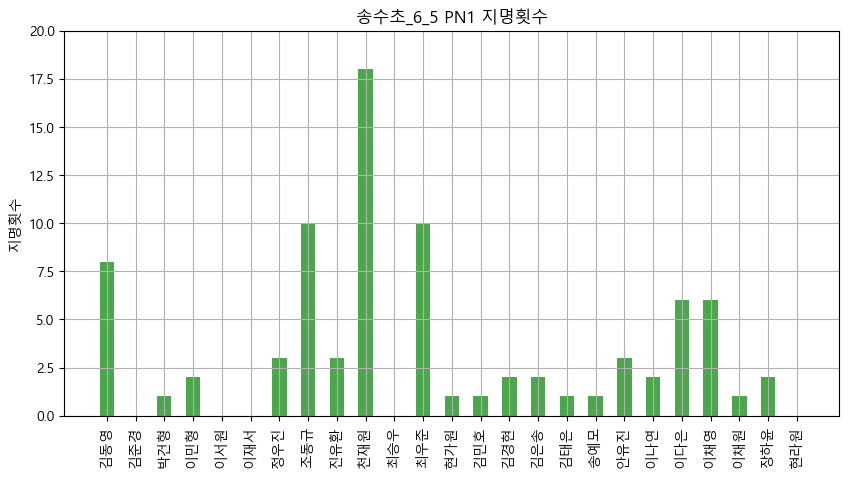

숭수초_4_1
학생 : 강민하 지명된 횟수 : 7 지명 가능한 수 : 148
학생 : 고강민 지명된 횟수 : 7 지명 가능한 수 : 148
학생 : 김무성 지명된 횟수 : 6 지명 가능한 수 : 148
학생 : 김성빈 지명된 횟수 : 2 지명 가능한 수 : 148
학생 : 김성윤 지명된 횟수 : 4 지명 가능한 수 : 148
학생 : 박지후 지명된 횟수 : 7 지명 가능한 수 : 148
학생 : 서도현 지명된 횟수 : 3 지명 가능한 수 : 148
학생 : 손정우 지명된 횟수 : 3 지명 가능한 수 : 148
학생 : 오은율 지명된 횟수 : 5 지명 가능한 수 : 148
학생 : 이유준 지명된 횟수 : 5 지명 가능한 수 : 148
학생 : 이한 지명된 횟수 : 5 지명 가능한 수 : 148
학생 : 정민준 지명된 횟수 : 6 지명 가능한 수 : 148
학생 : 정준휘 지명된 횟수 : 5 지명 가능한 수 : 148
학생 : 한정우 지명된 횟수 : 1 지명 가능한 수 : 148
학생 : 김가영 지명된 횟수 : 11 지명 가능한 수 : 148
학생 : 김서영 지명된 횟수 : 11 지명 가능한 수 : 148
학생 : 김서현 지명된 횟수 : 3 지명 가능한 수 : 148
학생 : 김소율 지명된 횟수 : 12 지명 가능한 수 : 148
학생 : 김채아 지명된 횟수 : 3 지명 가능한 수 : 148
학생 : 김태연 지명된 횟수 : 6 지명 가능한 수 : 148
학생 : 문하율 지명된 횟수 : 7 지명 가능한 수 : 148
학생 : 문하음 지명된 횟수 : 7 지명 가능한 수 : 148
학생 : 서지현 지명된 횟수 : 5 지명 가능한 수 : 148
학생 : 정세윤 지명된 횟수 : 8 지명 가능한 수 : 148
학생 : 조윤채 지명된 횟수 : 5 지명 가능한 수 : 148
학생 : 최소은 지명된 횟수 : 2 지명 가능한 수 : 148
학생 : 최시아 지명된 횟수 : 2 지명 가능한 수 : 148


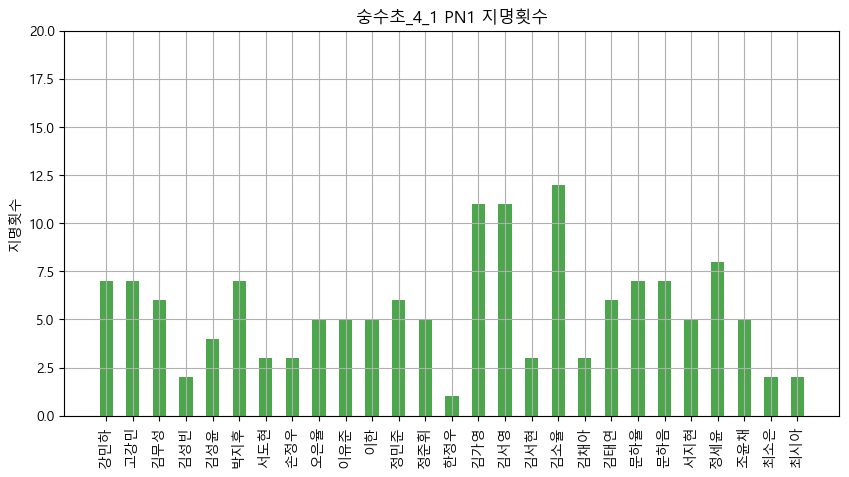

하원초_4_1
학생 : 11강*서 지명된 횟수 : 3 지명 가능한 수 : 91
학생 : 12강*진 지명된 횟수 : 1 지명 가능한 수 : 91
학생 : 13고*랑 지명된 횟수 : 2 지명 가능한 수 : 91
학생 : 14공*경 지명된 횟수 : 6 지명 가능한 수 : 91
학생 : 15김*우 지명된 횟수 : 1 지명 가능한 수 : 91
학생 : 16박*윤 지명된 횟수 : 2 지명 가능한 수 : 91
학생 : 17박*준 지명된 횟수 : 2 지명 가능한 수 : 91
학생 : 18박*민 지명된 횟수 : 8 지명 가능한 수 : 91
학생 : 19박*율 지명된 횟수 : 2 지명 가능한 수 : 91
학생 : 110배*호 지명된 횟수 : 3 지명 가능한 수 : 91
학생 : 111선*빈 지명된 횟수 : 2 지명 가능한 수 : 91
학생 : 112송*민 지명된 횟수 : 4 지명 가능한 수 : 91
학생 : 113송*빈 지명된 횟수 : 11 지명 가능한 수 : 91
학생 : 114신*원 지명된 횟수 : 4 지명 가능한 수 : 91
학생 : 115양*희 지명된 횟수 : 4 지명 가능한 수 : 91
학생 : 116엄*민 지명된 횟수 : 2 지명 가능한 수 : 91
학생 : 117이*연 지명된 횟수 : 6 지명 가능한 수 : 91
학생 : 118이*현 지명된 횟수 : 0 지명 가능한 수 : 91
학생 : 119이*경 지명된 횟수 : 1 지명 가능한 수 : 91
학생 : 120이*명 지명된 횟수 : 11 지명 가능한 수 : 91
학생 : 121이*섭 지명된 횟수 : 2 지명 가능한 수 : 91
학생 : 122임*환 지명된 횟수 : 4 지명 가능한 수 : 91
학생 : 123전*준 지명된 횟수 : 5 지명 가능한 수 : 91
학생 : 124최*림 지명된 횟수 : 5 지명 가능한 수 : 91
학생 : 125한*은 지명된 횟수 : 0 지명 가능한 수 : 91


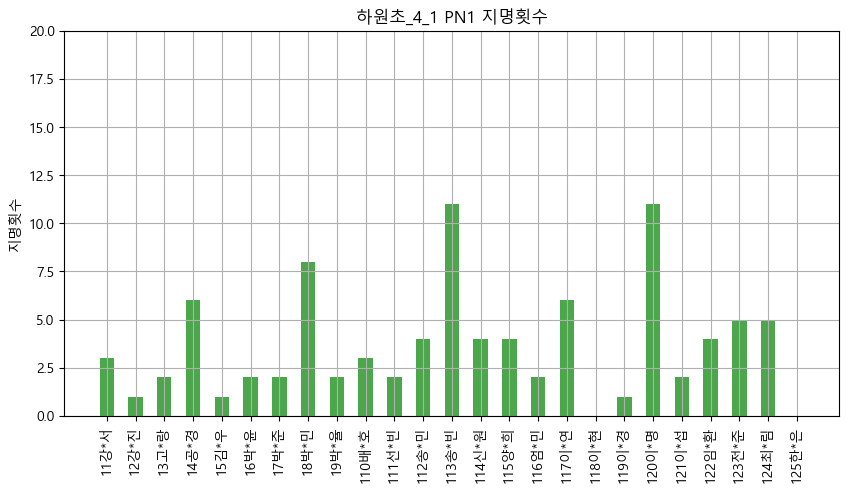

하원초_4_2
학생 : 21강*성 지명된 횟수 : 1 지명 가능한 수 : 95
학생 : 22김*빈 지명된 횟수 : 5 지명 가능한 수 : 95
학생 : 23김*율 지명된 횟수 : 6 지명 가능한 수 : 95
학생 : 24김*완 지명된 횟수 : 4 지명 가능한 수 : 95
학생 : 25김*준 지명된 횟수 : 5 지명 가능한 수 : 95
학생 : 26김*우 지명된 횟수 : 4 지명 가능한 수 : 95
학생 : 27김*원 지명된 횟수 : 4 지명 가능한 수 : 95
학생 : 28김*윤 지명된 횟수 : 5 지명 가능한 수 : 95
학생 : 29남*혜 지명된 횟수 : 3 지명 가능한 수 : 95
학생 : 210문*연 지명된 횟수 : 4 지명 가능한 수 : 95
학생 : 211박*나 지명된 횟수 : 4 지명 가능한 수 : 95
학생 : 212서율 지명된 횟수 : 2 지명 가능한 수 : 95
학생 : 213서*후 지명된 횟수 : 2 지명 가능한 수 : 95
학생 : 214송*우 지명된 횟수 : 4 지명 가능한 수 : 95
학생 : 215신*화 지명된 횟수 : 3 지명 가능한 수 : 95
학생 : 216엄*연 지명된 횟수 : 4 지명 가능한 수 : 95
학생 : 217오*겸 지명된 횟수 : 2 지명 가능한 수 : 95
학생 : 218이*현 지명된 횟수 : 3 지명 가능한 수 : 95
학생 : 219이*윤 지명된 횟수 : 4 지명 가능한 수 : 95
학생 : 220임*민 지명된 횟수 : 13 지명 가능한 수 : 95
학생 : 221장*준 지명된 횟수 : 3 지명 가능한 수 : 95
학생 : 222채*우 지명된 횟수 : 2 지명 가능한 수 : 95
학생 : 223최*윤 지명된 횟수 : 2 지명 가능한 수 : 95
학생 : 224최*인 지명된 횟수 : 2 지명 가능한 수 : 95
학생 : 225홍*지 지명된 횟수 : 4 지명 가능한 수 : 95


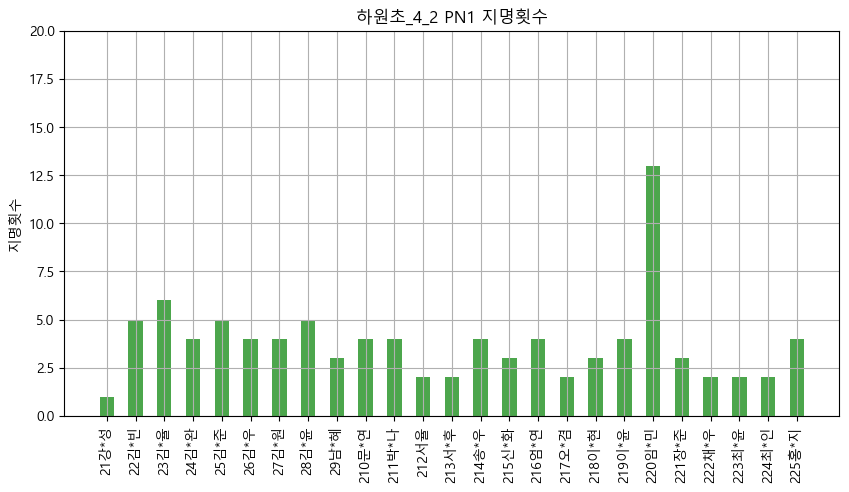

하원초_4_3
학생 : 31강*아 지명된 횟수 : 4 지명 가능한 수 : 76
학생 : 32김*경 지명된 횟수 : 1 지명 가능한 수 : 76
학생 : 33김*서 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 34김*윤 지명된 횟수 : 1 지명 가능한 수 : 76
학생 : 35김*준 지명된 횟수 : 4 지명 가능한 수 : 76
학생 : 36김*윤 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 37민*윤 지명된 횟수 : 6 지명 가능한 수 : 76
학생 : 38박*은 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 39박*윤 지명된 횟수 : 4 지명 가능한 수 : 76
학생 : 310서*무 지명된 횟수 : 3 지명 가능한 수 : 76
학생 : 311선*빈 지명된 횟수 : 4 지명 가능한 수 : 76
학생 : 312오*우 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 313유*혁 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 314은*민 지명된 횟수 : 5 지명 가능한 수 : 76
학생 : 315이*윤 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 316이*홍 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 317이*찬 지명된 횟수 : 3 지명 가능한 수 : 76
학생 : 318이*용 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 319이*수 지명된 횟수 : 2 지명 가능한 수 : 76
학생 : 320이*호 지명된 횟수 : 6 지명 가능한 수 : 76
학생 : 321장*은 지명된 횟수 : 3 지명 가능한 수 : 76
학생 : 322장*진 지명된 횟수 : 3 지명 가능한 수 : 76
학생 : 323채*성 지명된 횟수 : 3 지명 가능한 수 : 76
학생 : 324최*준 지명된 횟수 : 1 지명 가능한 수 : 76
학생 : 325최*종 지명된 횟수 : 4 지명 가능한 수 : 76
학생 : 326한*서 지명된 횟수 : 3 지명 가능한 수 : 76


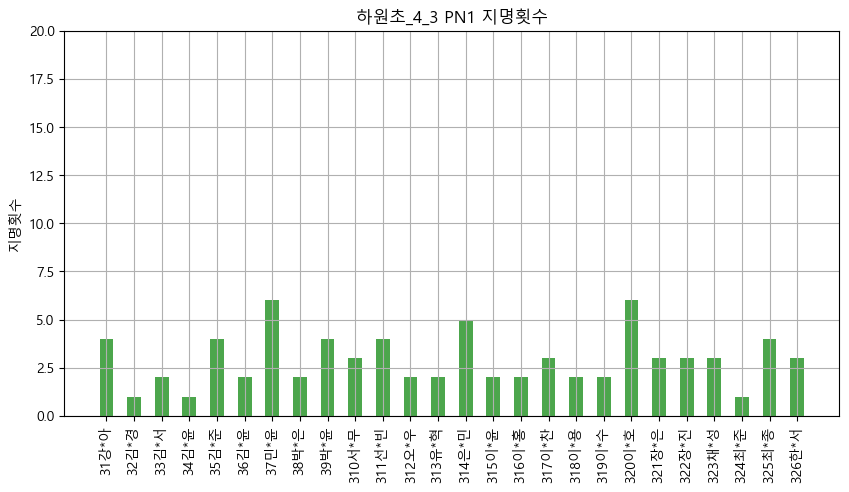

하원초_5_1
학생 : 11강*혁 지명된 횟수 : 9 지명 가능한 수 : 46
학생 : 12권*율 지명된 횟수 : 2 지명 가능한 수 : 46
학생 : 13김*현 지명된 횟수 : 0 지명 가능한 수 : 46
학생 : 14김*림 지명된 횟수 : 0 지명 가능한 수 : 46
학생 : 15김*랑 지명된 횟수 : 4 지명 가능한 수 : 46
학생 : 16김*경 지명된 횟수 : 0 지명 가능한 수 : 46
학생 : 17남*환 지명된 횟수 : 1 지명 가능한 수 : 46
학생 : 18박*선 지명된 횟수 : 6 지명 가능한 수 : 46
학생 : 19박*우 지명된 횟수 : 1 지명 가능한 수 : 46
학생 : 110박*우 지명된 횟수 : 1 지명 가능한 수 : 46
학생 : 111박*윤 지명된 횟수 : 6 지명 가능한 수 : 46
학생 : 112성*민 지명된 횟수 : 2 지명 가능한 수 : 46
학생 : 113신*율 지명된 횟수 : 1 지명 가능한 수 : 46
학생 : 114이*빈 지명된 횟수 : 0 지명 가능한 수 : 46
학생 : 115이*희 지명된 횟수 : 3 지명 가능한 수 : 46
학생 : 116이*신 지명된 횟수 : 0 지명 가능한 수 : 46
학생 : 117임*원 지명된 횟수 : 2 지명 가능한 수 : 46
학생 : 118장*슬 지명된 횟수 : 5 지명 가능한 수 : 46
학생 : 119정*유 지명된 횟수 : 1 지명 가능한 수 : 46
학생 : 120홍*서 지명된 횟수 : 1 지명 가능한 수 : 46
학생 : 121홍*나 지명된 횟수 : 1 지명 가능한 수 : 46


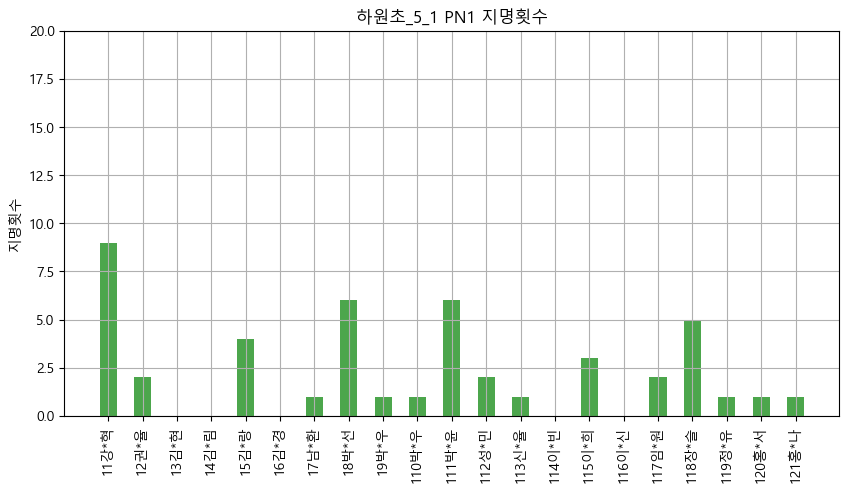

하원초_5_2
학생 : 21강*람 지명된 횟수 : 4 지명 가능한 수 : 69
학생 : 22권*호 지명된 횟수 : 1 지명 가능한 수 : 69
학생 : 23김*민 지명된 횟수 : 2 지명 가능한 수 : 69
학생 : 24김*율 지명된 횟수 : 4 지명 가능한 수 : 69
학생 : 25김*서 지명된 횟수 : 3 지명 가능한 수 : 69
학생 : 26김*혁 지명된 횟수 : 2 지명 가능한 수 : 69
학생 : 27박*을 지명된 횟수 : 2 지명 가능한 수 : 69
학생 : 29박*영 지명된 횟수 : 4 지명 가능한 수 : 69
학생 : 210원*현 지명된 횟수 : 3 지명 가능한 수 : 69
학생 : 211이*윤 지명된 횟수 : 6 지명 가능한 수 : 69
학생 : 212이*영 지명된 횟수 : 7 지명 가능한 수 : 69
학생 : 213이*준 지명된 횟수 : 2 지명 가능한 수 : 69
학생 : 214이*아 지명된 횟수 : 4 지명 가능한 수 : 69
학생 : 215정*은 지명된 횟수 : 8 지명 가능한 수 : 69
학생 : 217조*준 지명된 횟수 : 2 지명 가능한 수 : 69
학생 : 218최*현 지명된 횟수 : 3 지명 가능한 수 : 69
학생 : 219최*유 지명된 횟수 : 7 지명 가능한 수 : 69
학생 : 220홍*주 지명된 횟수 : 2 지명 가능한 수 : 69


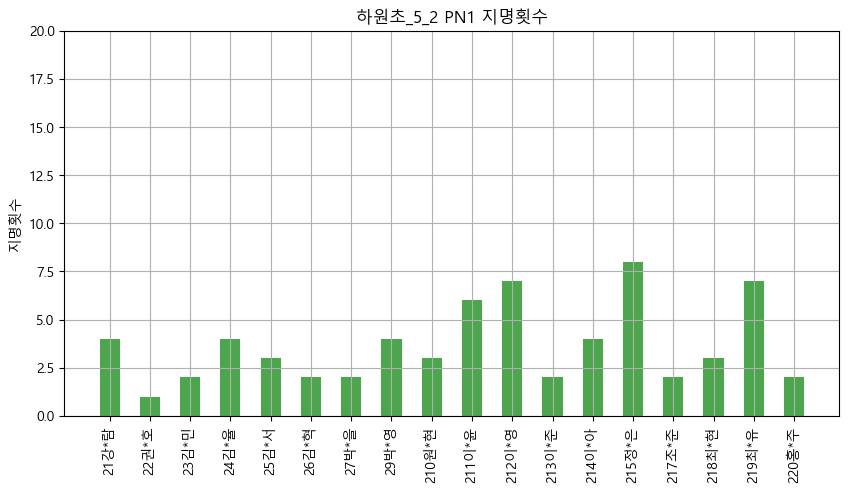

하원초_5_3
학생 : 31강*원 지명된 횟수 : 0 지명 가능한 수 : 32
학생 : 32공*윤 지명된 횟수 : 4 지명 가능한 수 : 32
학생 : 33김*린 지명된 횟수 : 6 지명 가능한 수 : 32
학생 : 36노*윤 지명된 횟수 : 0 지명 가능한 수 : 32
학생 : 37박*현 지명된 횟수 : 1 지명 가능한 수 : 32
학생 : 38박*진 지명된 횟수 : 0 지명 가능한 수 : 32
학생 : 39박*민 지명된 횟수 : 2 지명 가능한 수 : 32
학생 : 310서*은 지명된 횟수 : 0 지명 가능한 수 : 32
학생 : 311송*연 지명된 횟수 : 3 지명 가능한 수 : 32
학생 : 312신*율 지명된 횟수 : 2 지명 가능한 수 : 32
학생 : 313윤*희 지명된 횟수 : 4 지명 가능한 수 : 32
학생 : 314이*주 지명된 횟수 : 0 지명 가능한 수 : 32
학생 : 315이*유 지명된 횟수 : 1 지명 가능한 수 : 32
학생 : 316이*윤 지명된 횟수 : 4 지명 가능한 수 : 32
학생 : 317이*은 지명된 횟수 : 0 지명 가능한 수 : 32
학생 : 318전*빈 지명된 횟수 : 1 지명 가능한 수 : 32
학생 : 319주*환 지명된 횟수 : 3 지명 가능한 수 : 32
학생 : 320임*연 지명된 횟수 : 0 지명 가능한 수 : 32


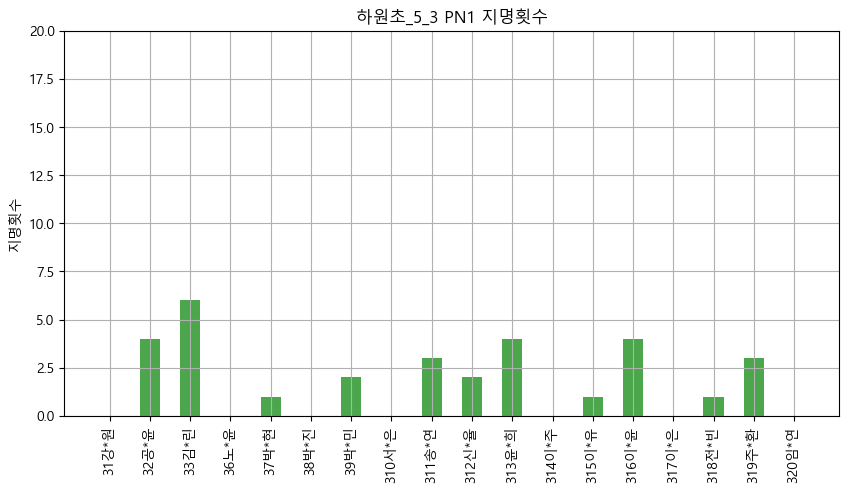

하원초_5_4
학생 : 41구*진 지명된 횟수 : 3 지명 가능한 수 : 57
학생 : 41구*진 지명된 횟수 : 3 지명 가능한 수 : 57
학생 : 42권*서 지명된 횟수 : 2 지명 가능한 수 : 57
학생 : 43권*하 지명된 횟수 : 8 지명 가능한 수 : 57
학생 : 44김*서 지명된 횟수 : 1 지명 가능한 수 : 57
학생 : 45김*지 지명된 횟수 : 5 지명 가능한 수 : 57
학생 : 46김*준 지명된 횟수 : 1 지명 가능한 수 : 57
학생 : 48김*결 지명된 횟수 : 4 지명 가능한 수 : 57
학생 : 49박*늘 지명된 횟수 : 1 지명 가능한 수 : 57
학생 : 410심*지 지명된 횟수 : 4 지명 가능한 수 : 57
학생 : 411양*윤 지명된 횟수 : 6 지명 가능한 수 : 57
학생 : 412유*아 지명된 횟수 : 5 지명 가능한 수 : 57
학생 : 413이*준 지명된 횟수 : 1 지명 가능한 수 : 57
학생 : 415이*연 지명된 횟수 : 2 지명 가능한 수 : 57
학생 : 416이*윤 지명된 횟수 : 6 지명 가능한 수 : 57
학생 : 417장*서 지명된 횟수 : 2 지명 가능한 수 : 57
학생 : 418전*훈 지명된 횟수 : 1 지명 가능한 수 : 57
학생 : 419전*원 지명된 횟수 : 1 지명 가능한 수 : 57
학생 : 420정*우 지명된 횟수 : 1 지명 가능한 수 : 57


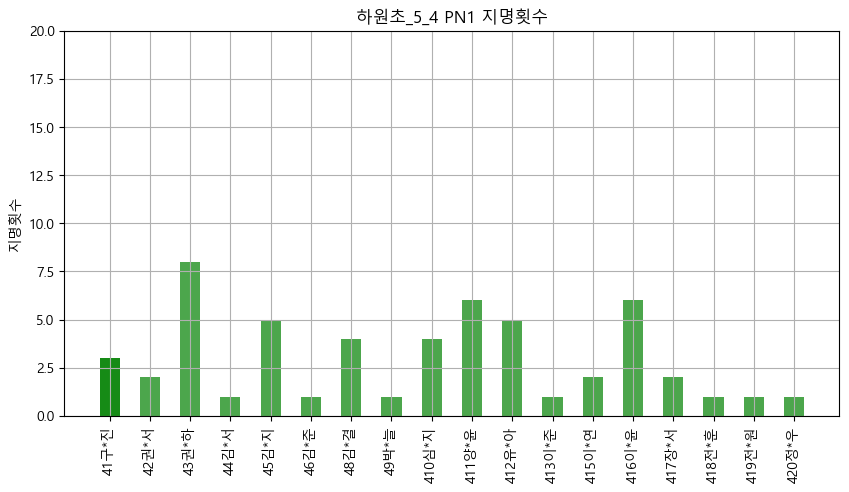

하원초_6_1
학생 : 11김*빈 지명된 횟수 : 8 지명 가능한 수 : 68
학생 : 12김*서 지명된 횟수 : 0 지명 가능한 수 : 68
학생 : 13김*재 지명된 횟수 : 1 지명 가능한 수 : 68
학생 : 14김*하 지명된 횟수 : 0 지명 가능한 수 : 68
학생 : 15김*원 지명된 횟수 : 1 지명 가능한 수 : 68
학생 : 16김*은 지명된 횟수 : 0 지명 가능한 수 : 68
학생 : 17김*서 지명된 횟수 : 4 지명 가능한 수 : 68
학생 : 18김*준 지명된 횟수 : 3 지명 가능한 수 : 68
학생 : 19명*우 지명된 횟수 : 5 지명 가능한 수 : 68
학생 : 110박*원 지명된 횟수 : 2 지명 가능한 수 : 68
학생 : 111박*윤 지명된 횟수 : 0 지명 가능한 수 : 68
학생 : 112박*우 지명된 횟수 : 0 지명 가능한 수 : 68
학생 : 113변*은 지명된 횟수 : 9 지명 가능한 수 : 68
학생 : 114석*우 지명된 횟수 : 1 지명 가능한 수 : 68
학생 : 115송*양 지명된 횟수 : 1 지명 가능한 수 : 68
학생 : 116신*인 지명된 횟수 : 2 지명 가능한 수 : 68
학생 : 117용*희 지명된 횟수 : 6 지명 가능한 수 : 68
학생 : 118이*아 지명된 횟수 : 3 지명 가능한 수 : 68
학생 : 119이*준 지명된 횟수 : 9 지명 가능한 수 : 68
학생 : 120이*아 지명된 횟수 : 13 지명 가능한 수 : 68
학생 : 120이*아 지명된 횟수 : 13 지명 가능한 수 : 68
학생 : 122이*빈 지명된 횟수 : 0 지명 가능한 수 : 68


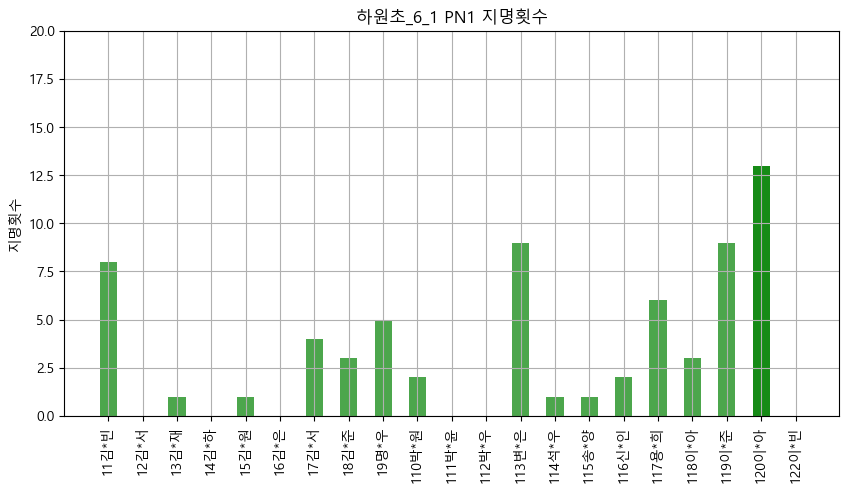

하원초_6_2
학생 : 21강*아 지명된 횟수 : 1 지명 가능한 수 : 33
학생 : 22기*서 지명된 횟수 : 1 지명 가능한 수 : 33
학생 : 23김*은 지명된 횟수 : 3 지명 가능한 수 : 33
학생 : 24김*정 지명된 횟수 : 3 지명 가능한 수 : 33
학생 : 25문*은 지명된 횟수 : 1 지명 가능한 수 : 33
학생 : 26문*별 지명된 횟수 : 0 지명 가능한 수 : 33
학생 : 27문*리 지명된 횟수 : 1 지명 가능한 수 : 33
학생 : 28박*영 지명된 횟수 : 0 지명 가능한 수 : 33
학생 : 29박*원 지명된 횟수 : 1 지명 가능한 수 : 33
학생 : 210송*솔 지명된 횟수 : 3 지명 가능한 수 : 33
학생 : 211엄*린 지명된 횟수 : 4 지명 가능한 수 : 33
학생 : 212윤*은 지명된 횟수 : 0 지명 가능한 수 : 33
학생 : 213이*준 지명된 횟수 : 1 지명 가능한 수 : 33
학생 : 214이*아 지명된 횟수 : 2 지명 가능한 수 : 33
학생 : 215이*서 지명된 횟수 : 1 지명 가능한 수 : 33
학생 : 216이*아 지명된 횟수 : 0 지명 가능한 수 : 33
학생 : 217정*희 지명된 횟수 : 3 지명 가능한 수 : 33
학생 : 218주*경 지명된 횟수 : 1 지명 가능한 수 : 33
학생 : 219최*준 지명된 횟수 : 0 지명 가능한 수 : 33
학생 : 220최*윤 지명된 횟수 : 6 지명 가능한 수 : 33
학생 : 221현*민 지명된 횟수 : 1 지명 가능한 수 : 33


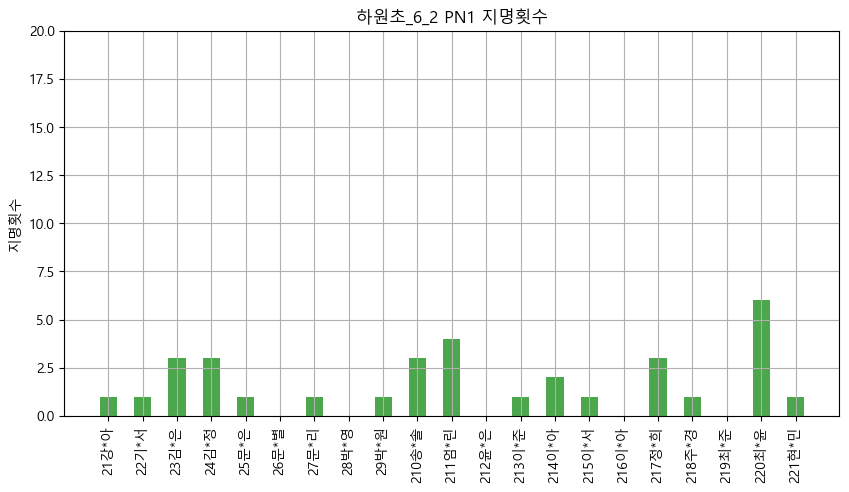

하원초_6_3
학생 : 31강*원 지명된 횟수 : 2 지명 가능한 수 : 79
학생 : 32곽*호 지명된 횟수 : 4 지명 가능한 수 : 79
학생 : 33김*준 지명된 횟수 : 4 지명 가능한 수 : 79
학생 : 34김*희 지명된 횟수 : 3 지명 가능한 수 : 79
학생 : 35김*인 지명된 횟수 : 4 지명 가능한 수 : 79
학생 : 36박*설 지명된 횟수 : 11 지명 가능한 수 : 79
학생 : 37박*민 지명된 횟수 : 2 지명 가능한 수 : 79
학생 : 38서*결 지명된 횟수 : 4 지명 가능한 수 : 79
학생 : 39손*성 지명된 횟수 : 2 지명 가능한 수 : 79
학생 : 310송*진 지명된 횟수 : 2 지명 가능한 수 : 79
학생 : 311양*현 지명된 횟수 : 7 지명 가능한 수 : 79
학생 : 312유*연 지명된 횟수 : 8 지명 가능한 수 : 79
학생 : 314이*원 지명된 횟수 : 2 지명 가능한 수 : 79
학생 : 315이*랑 지명된 횟수 : 3 지명 가능한 수 : 79
학생 : 316이*린 지명된 횟수 : 3 지명 가능한 수 : 79
학생 : 317임*화 지명된 횟수 : 7 지명 가능한 수 : 79
학생 : 318정*은 지명된 횟수 : 3 지명 가능한 수 : 79
학생 : 319차*서 지명된 횟수 : 4 지명 가능한 수 : 79
학생 : 320황*연 지명된 횟수 : 2 지명 가능한 수 : 79


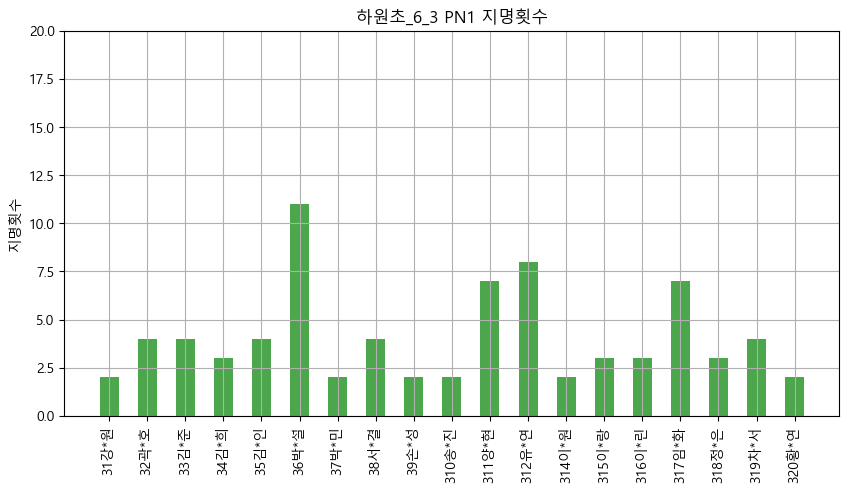

하원초_6_4
학생 : 41강*원 지명된 횟수 : 4 지명 가능한 수 : 142
학생 : 42권*연 지명된 횟수 : 6 지명 가능한 수 : 142
학생 : 43김*담 지명된 횟수 : 11 지명 가능한 수 : 142
학생 : 44김*완 지명된 횟수 : 6 지명 가능한 수 : 142
학생 : 45김*주 지명된 횟수 : 4 지명 가능한 수 : 142
학생 : 46문*진 지명된 횟수 : 6 지명 가능한 수 : 142
학생 : 47박*서 지명된 횟수 : 5 지명 가능한 수 : 142
학생 : 48박*주 지명된 횟수 : 11 지명 가능한 수 : 142
학생 : 49배* 지명된 횟수 : 6 지명 가능한 수 : 142
학생 : 410서*호 지명된 횟수 : 10 지명 가능한 수 : 142
학생 : 411손*원 지명된 횟수 : 4 지명 가능한 수 : 142
학생 : 412송*우 지명된 횟수 : 5 지명 가능한 수 : 142
학생 : 413신*은 지명된 횟수 : 5 지명 가능한 수 : 142
학생 : 414안*민 지명된 횟수 : 4 지명 가능한 수 : 142
학생 : 415이*희 지명된 횟수 : 5 지명 가능한 수 : 142
학생 : 416이*은 지명된 횟수 : 10 지명 가능한 수 : 142
학생 : 417이*준 지명된 횟수 : 7 지명 가능한 수 : 142
학생 : 418장*우 지명된 횟수 : 8 지명 가능한 수 : 142
학생 : 419전*준 지명된 횟수 : 9 지명 가능한 수 : 142
학생 : 421조*윤 지명된 횟수 : 9 지명 가능한 수 : 142


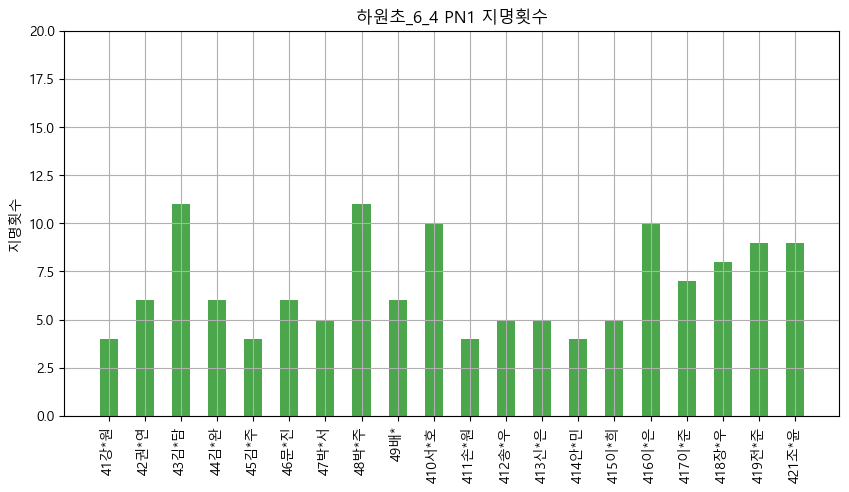

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

for i in sch_stu_dict.keys() :
    print(i)
    a, b, counts = status_hierarchy(dfs[i], ['PN1'], i)
    names = sch_stu_dict[i]
    score_df = pd.DataFrame(status_scores)

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.bar(names, counts, width=0.5, color='green', alpha=0.7)
    plt.xlabel("")
    plt.ylabel("지명횟수")
    plt.ylim(0, 20)
    plt.title(f'{i} PN1 지명횟수')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

# 규범 관련 척도

In [1]:
import pandas as pd
from pathlib import Path
import re

# 현장데이터 폴더 경로 지정
base_path = Path(r"C:\Users\USER\peer\현장데이터")

def extract_class_number(path):
    match = re.search(r'class_(\d+)', path.stem)
    return int(match.group(1)) if match else float('inf')
    
# class로 시작하고 .csv 확장자인 파일 모두 찾기
excel_files = sorted(base_path.rglob("*class*.csv"), key=extract_class_number)

# 데이터프레임을 담을 딕셔너리
dfs = {}

for file in excel_files:
    try:
        print(file)
        df = pd.read_csv(file)
        df = df.iloc[:, 1:]

        # 추출 패턴: 예) "class_목포부주초_6_5.csv"
        pattern = r'class_([\uac00-\ud7a3a-zA-Z0-9_]+)\.csv'
        match = re.search(pattern, file.name)
        sch_name = match.group(1)
        
        dfs[sch_name] = df
    except Exception as e:
        print(f"파일 {file.name} 에서 오류 발생: {e}")

C:\Users\USER\peer\현장데이터\class_목포부주초_6_5.csv
C:\Users\USER\peer\현장데이터\class_송수초_4_3.csv
C:\Users\USER\peer\현장데이터\class_송수초_4_4.csv
C:\Users\USER\peer\현장데이터\class_송수초_5_2.csv
C:\Users\USER\peer\현장데이터\class_송수초_5_4.csv
C:\Users\USER\peer\현장데이터\class_송수초_5_5.csv
C:\Users\USER\peer\현장데이터\class_송수초_6_2.csv
C:\Users\USER\peer\현장데이터\class_송수초_6_5.csv
C:\Users\USER\peer\현장데이터\class_숭수초_4_1.csv
C:\Users\USER\peer\현장데이터\class_하원초_4_1.csv
C:\Users\USER\peer\현장데이터\class_하원초_4_2.csv
C:\Users\USER\peer\현장데이터\class_하원초_4_3.csv
C:\Users\USER\peer\현장데이터\class_하원초_5_1.csv
C:\Users\USER\peer\현장데이터\class_하원초_5_2.csv
C:\Users\USER\peer\현장데이터\class_하원초_5_3.csv
C:\Users\USER\peer\현장데이터\class_하원초_5_4.csv
C:\Users\USER\peer\현장데이터\class_하원초_6_1.csv
C:\Users\USER\peer\현장데이터\class_하원초_6_2.csv
C:\Users\USER\peer\현장데이터\class_하원초_6_3.csv
C:\Users\USER\peer\현장데이터\class_하원초_6_4.csv


In [5]:
# 학교별 또래지명 데이터 딕셔너리 형태로 불러옴
dfs

{'목포부주초_6_5':     point_item_no student_designation student_nomination
 0             PN1               51강*욱             510박*우
 1             PN1               51강*욱           521정***타
 2             PN1               52곽*중           521정***타
 3             PN1               53김*재              51강*욱
 4             PN1               53김*재              52곽*중
 ..            ...                 ...                ...
 328           PN9              520장*수             523진*랑
 329           PN9              520장*수             525최*예
 330           PN9            521정***타              53김*재
 331           PN9              523진*랑             511박*유
 332           PN9              526홍*경              56김*홍
 
 [333 rows x 3 columns],
 '송수초_4_3':     point_item_no student_designation student_nomination
 0             PN1                 김관우                변서유
 1             PN1                 김관우                한서연
 2             PN1                 김병하                김관우
 3             PN1   

In [7]:
dfs['송수초_4_4']

,point_item_no,student_designation,student_nomination
0,PN1,김도윤,강영재
1,PN1,김도윤,김서준
2,PN1,김도윤,김서진
3,PN1,김도윤,김주원
4,PN1,김도윤,김지한
...,...,...,...
556,PN9,표윤희,강영재
557,PN9,허은수,김서진
558,PN9,허은수,김주원
559,PN9,허은수,조은우


In [9]:
# 지명 무응답자가 존재 학급 학생 명단이 필요해 또 다른 dict 처리
# 학교 명을 key, 학급의 학생을 value로 담기

import pandas as pd
from pathlib import Path
import re

# 경로 설정
base_path = Path(r"C:\Users\USER\peer\현장데이터")

# 파일 검색
excel_files = sorted(base_path.rglob("*Wave*.xlsx"))

# 결과 담을 리스트
stu_list = []
sch_list = []

# 추출 패턴: 예) '2024 숭수초 Wave1_5-5 (학생).xlsx'
pattern = r'([\uac00-\ud7a3]+초)\s.*?Wave\d+_(\d+)-(\d+)'

for file in excel_files:
    try:
        # 파일명에서 학교명 추출
        match = re.search(pattern, file.name)
        if match:
            school = match.group(1)       # '숭수초'
            grade = match.group(2)        # '5'
            class_ = match.group(3)       # '5'
            key = f"{school}_{grade}_{class_}"
            sch_list.append(key)
        else:
            sch_list.append("파싱실패")

        # 데이터에서 학생 명단 추출
        df = pd.read_excel(file, sheet_name='설문지 응답 시트1', engine='openpyxl')
        df['source_file'] = file.name
        # 아예 검사 자체를 실시하지 않은 경우 nodata로 기록되어 있음 -> 해당 데이터 제외하고 학생 명단 추출
        df["타임스탬프"] = df["타임스탬프"].astype(str)
        temp_df = df[
            df["타임스탬프"].notna() &
            (df["타임스탬프"].str.contains("no", case=False, na=False) == False)
        ]
        stu_list.append(temp_df['이름'].to_list())
        print(f'파일 {file.name} 학생 명단 추출 완료')
    except Exception as e:
        print(f"파일 {file.name} 에서 오류 발생: {e}")

# 학교와 학생 이름단을 묶을 수 있는 딕셔너리
sch_stu_dict = {}
for sch, stu in zip(sch_list, stu_list) :
    print('학교\n', sch)
    print('학생 명단\n', stu)
    sch_stu_dict[sch] = stu

파일 2024 목포부주초 Wave1_6-5(응답).xlsx 학생 명단 추출 완료
파일 2024 송수초 Wave1_4-3 (학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 송수초 Wave1_4-4 (학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 송수초 Wave1_5-2 (학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 송수초 Wave1_5-4(학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 송수초 Wave1_5-5 (학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 송수초 Wave1_6-2 (학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 송수초 Wave1_6-5 (학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 숭수초 Wave1_4-1 (학생)(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_4-1(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_4-2(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_4-3(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_5-1(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_5-2(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_5-3(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_5-4(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_6-1(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_6-2(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_6-3(응답).xlsx 학생 명단 추출 완료
파일 2024 하원초 Wave1_6-4(응답).xlsx 학생 명단 추출 완료
학교
 목포부주초_6_5
학생 명단
 ['51강*욱', '52곽*중', '53김*재', '54김*은', '55김*우', '56김*홍', '57김*윤', '58박*형', '59박*

In [17]:
print(sch_stu_dict['하원초_6_4'])
print(len(sch_stu_dict['하원초_6_4']))

print(sch_stu_dict['송수초_6_2'])
print(len(sch_stu_dict['송수초_6_2']))
# 박시은 무응답 학생

['41강*원', '42권*연', '43김*담', '44김*완', '45김*주', '46문*진', '47박*서', '48박*주', '49배*', '410서*호', '411손*원', '412송*우', '413신*은', '414안*민', '415이*희', '416이*은', '417이*준', '418장*우', '419전*준', '421조*윤']
20
['강기태', '권휘준', '김태현', '박승유', '박호윤', '송윤호', '아윤재', '우상진', '유태경', '이경보', '이준성', '조이현', '최지호', '홍재원', '김규리', '김세원', '노지안', '박시은', '박아현', '이수현', '장하윤', '조자은']
22


In [18]:
sch_stu_dict['송수초_6_2']

['강기태',
 '권휘준',
 '김태현',
 '박승유',
 '박호윤',
 '송윤호',
 '아윤재',
 '우상진',
 '유태경',
 '이경보',
 '이준성',
 '조이현',
 '최지호',
 '홍재원',
 '김규리',
 '김세원',
 '노지안',
 '박시은',
 '박아현',
 '이수현',
 '장하윤',
 '조자은']

In [49]:
#지명횟수 산출 함수
def point_freq_score(point_df, item, sch_name, name):
    if not item :
        return 0
    else :
        item='|'.join(item)
        temp_df=point_df[point_df['point_item_no'].str.fullmatch(item)]

        if name not in sch_stu_dict[sch_name] :
            print(f'{name} 은 명단에 없습니다.')
        else :
            if len(temp_df[temp_df['student_nomination']==name]) >= 1 :
                freq = len(temp_df[temp_df['student_nomination']==name])
            elif len(temp_df[temp_df['student_nomination']==name]) == 0 :
                freq = 0
            #print('학생 :', name, ',지명된 횟수 :', freq, ',지명 가능한 수 :', (len(temp_df)))
            return freq

In [51]:
point_freq_score(dfs['송수초_6_2'], ['PN1'], '송수초_6_2', '조자은')

11

In [80]:
# MinMAX 정규화하여 규범 점수 산출
def norm_score(point_df, agg_item, fri_item, sch_name, name):
    import numpy as np
    item = agg_item + fri_item
    if not item : # item이 비어 있는 경우
        return 0
    else :
        item='|'.join(item)
        temp_df=point_df[point_df['point_item_no'].str.fullmatch(item)]

    if name not in sch_stu_dict[sch_name] :
        print(f'{name} 은 명단에 없습니다.')
    else :
        if len(temp_df[temp_df['student_nomination']==name]) >= 1 : # 학생이 반에 속해 있는 경우
            agg_freq_list = []
            fri_freq_list = []
            for stu_name in sch_stu_dict[sch_name] : # min max를 구하기 위해 반 전체 지명 횟수 산출
                agg_freq = point_freq_score(point_df, agg_item, sch_name, stu_name)
                agg_freq_list.append(agg_freq)
                agg_freq_arr = np.array(agg_freq_list)
                fri_freq = point_freq_score(point_df, fri_item, sch_name, stu_name)
                fri_freq_list.append(fri_freq)
                fri_freq_arr = np.array(fri_freq_list)
                
            norm_raw = agg_freq_arr * fri_freq_arr
            
            max_raw = max(norm_raw)
            min_raw = min(norm_raw)
            raw = norm_raw[sch_stu_dict[sch_name].index(name)]
            minmax_score = ((raw - min_raw) / (max_raw - min_raw))*4+1
    print('공격성 지명 횟수 :', agg_freq_list)
    print('친구 지명 횟수 :',fri_freq_list)
    print('규범 원점수 :',norm_raw)
    print('minmax 정규화 :',minmax_score)
    return agg_freq_list, fri_freq_list, norm_raw, minmax_score

In [96]:
sch_stu_dict['송수초_6_2']

['강기태',
 '권휘준',
 '김태현',
 '박승유',
 '박호윤',
 '송윤호',
 '아윤재',
 '우상진',
 '유태경',
 '이경보',
 '이준성',
 '조이현',
 '최지호',
 '홍재원',
 '김규리',
 '김세원',
 '노지안',
 '박시은',
 '박아현',
 '이수현',
 '장하윤',
 '조자은']

In [84]:
sch_stu_dict['송수초_5_5'].index('고도윤')

1

In [90]:
a,b,c,d = norm_score(dfs['송수초_5_5'], ['PN4','PN5','PN6','PN7'], ['PN8','PN9'], '송수초_5_5', '고도윤')

공격성 지명 횟수 : [1, 6, 2, 1, 5, 0, 3, 0, 0, 3, 0, 2, 10, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4]
친구 지명 횟수 : [14, 17, 15, 15, 17, 14, 18, 17, 15, 12, 17, 18, 17, 12, 12, 24, 18, 23, 25, 26, 19, 23, 27, 23]
규범 원점수 : [ 14 102  30  15  85   0  54   0   0  36   0  36 170  24   0   0   0   0
  50   0   0   0   0  92]
minmax 정규화 : 3.4


In [98]:
a,b,c,d = norm_score(dfs['송수초_6_2'], ['PN4','PN5','PN6','PN7'], ['PN8','PN9'], '송수초_6_2', '이경보')

공격성 지명 횟수 : [2, 2, 16, 0, 5, 0, 0, 2, 0, 35, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0]
친구 지명 횟수 : [7, 9, 1, 14, 4, 23, 3, 2, 6, 1, 9, 8, 7, 6, 14, 12, 18, 12, 11, 13, 14, 16]
규범 원점수 : [14 18 16  0 20  0  0  4  0 35  0  0  7 12  0  0  0 12  0  0  0  0]
minmax 정규화 : 5.0


공격성 지명 횟수 : [1, 6, 2, 1, 5, 0, 3, 0, 0, 3, 0, 2, 10, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4]
친구 지명 횟수 : [14, 17, 15, 15, 17, 14, 18, 17, 15, 12, 17, 18, 17, 12, 12, 24, 18, 23, 25, 26, 19, 23, 27, 23]
규범 원점수 : [ 14 102  30  15  85   0  54   0   0  36   0  36 170  24   0   0   0   0
  50   0   0   0   0  92]
minmax 정규화 : 1.3294117647058823
공격성 지명 횟수 : [1, 6, 2, 1, 5, 0, 3, 0, 0, 3, 0, 2, 10, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4]
친구 지명 횟수 : [14, 17, 15, 15, 17, 14, 18, 17, 15, 12, 17, 18, 17, 12, 12, 24, 18, 23, 25, 26, 19, 23, 27, 23]
규범 원점수 : [ 14 102  30  15  85   0  54   0   0  36   0  36 170  24   0   0   0   0
  50   0   0   0   0  92]
minmax 정규화 : 3.4
공격성 지명 횟수 : [1, 6, 2, 1, 5, 0, 3, 0, 0, 3, 0, 2, 10, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4]
친구 지명 횟수 : [14, 17, 15, 15, 17, 14, 18, 17, 15, 12, 17, 18, 17, 12, 12, 24, 18, 23, 25, 26, 19, 23, 27, 23]
규범 원점수 : [ 14 102  30  15  85   0  54   0   0  36   0  36 170  24   0   0   0   0
  50   0   0   0   0  92]
minmax 정규화 : 1.7058823529411766
공격성 지명 횟수 : [

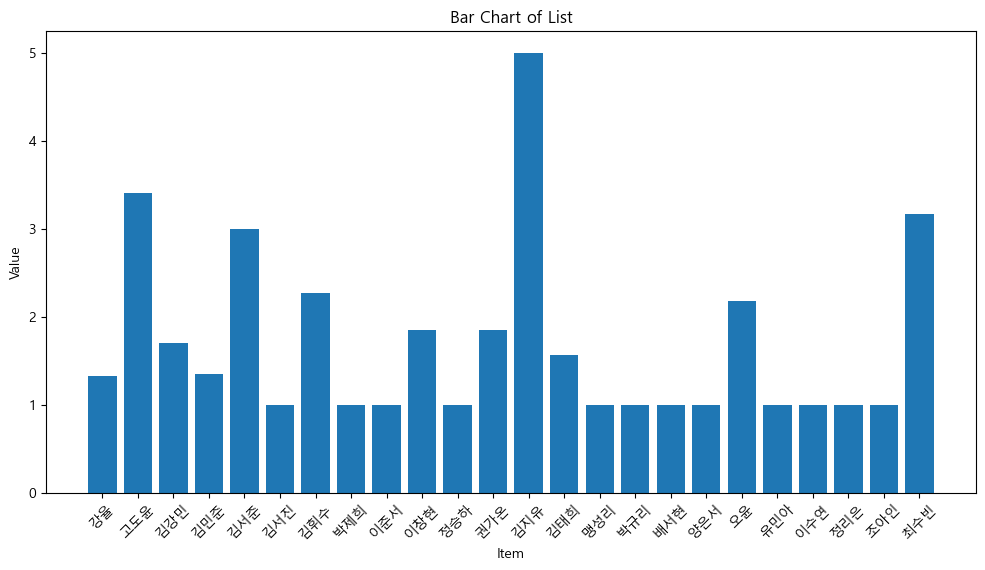

In [114]:
# 학급별로 minmax 졍규화해서 시각화
minmax_scor_list = []
for name in sch_stu_dict['송수초_5_5'] :
    a,b,c,d = norm_score(dfs['송수초_5_5'], ['PN4','PN5','PN6','PN7'], ['PN8','PN9'], '송수초_5_5', name)
    minmax_scor_list.append(d)

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Windows에 기본적으로 있는 'Malgun Gothic' 폰트 사용
plt.rcParams['font.family'] = 'Malgun Gothic'

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

labels = sch_stu_dict['송수초_5_5']

plt.subplots(figsize=(12, 6))  # 1행 2열 subplot
plt.bar(labels, minmax_scor_list)
plt.title('Bar Chart of List')
plt.xlabel('Item')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

목포부주초_6_5
공격성 지명 횟수 : [12, 2, 3, 4, 0, 1, 0, 6, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 5, 0]
친구 지명 횟수 : [8, 7, 6, 2, 4, 8, 6, 4, 5, 7, 5, 3, 6, 4, 3, 5, 8, 4, 8, 10, 7, 10, 5, 5]
규범 원점수 : [96 14 18  8  0  8  0 24  0 14  0  0 18  0  0  5  0  0  0 10  0  0 25  0]
minmax 정규화 : 5.0
공격성 지명 횟수 : [12, 2, 3, 4, 0, 1, 0, 6, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 5, 0]
친구 지명 횟수 : [8, 7, 6, 2, 4, 8, 6, 4, 5, 7, 5, 3, 6, 4, 3, 5, 8, 4, 8, 10, 7, 10, 5, 5]
규범 원점수 : [96 14 18  8  0  8  0 24  0 14  0  0 18  0  0  5  0  0  0 10  0  0 25  0]
minmax 정규화 : 1.5833333333333335
공격성 지명 횟수 : [12, 2, 3, 4, 0, 1, 0, 6, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 5, 0]
친구 지명 횟수 : [8, 7, 6, 2, 4, 8, 6, 4, 5, 7, 5, 3, 6, 4, 3, 5, 8, 4, 8, 10, 7, 10, 5, 5]
규범 원점수 : [96 14 18  8  0  8  0 24  0 14  0  0 18  0  0  5  0  0  0 10  0  0 25  0]
minmax 정규화 : 1.75
공격성 지명 횟수 : [12, 2, 3, 4, 0, 1, 0, 6, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 5, 0]
친구 지명 횟수 : [8, 7, 6, 2, 4, 8, 6, 4, 5, 7, 5, 3, 6, 4, 3, 5, 8, 4, 8, 10,

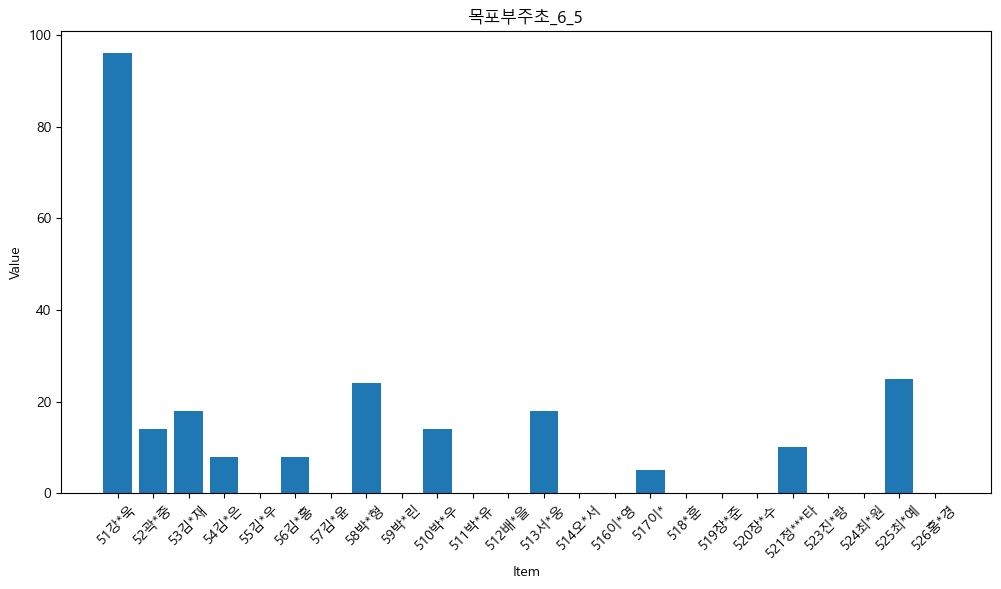

송수초_4_3
공격성 지명 횟수 : [7, 9, 3, 2, 1, 1, 0, 0, 2, 4, 0, 0, 0, 2, 1, 7, 4, 1, 2, 1, 2, 1, 2, 1, 1, 9, 1]
친구 지명 횟수 : [8, 6, 5, 6, 8, 11, 9, 13, 9, 11, 9, 7, 15, 13, 13, 4, 13, 8, 9, 15, 20, 24, 17, 12, 10, 7, 22]
규범 원점수 : [56 54 15 12  8 11  0  0 18 44  0  0  0 26 13 28 52  8 18 15 40 24 34 12
 10 63 22]
minmax 정규화 : 4.555555555555555
공격성 지명 횟수 : [7, 9, 3, 2, 1, 1, 0, 0, 2, 4, 0, 0, 0, 2, 1, 7, 4, 1, 2, 1, 2, 1, 2, 1, 1, 9, 1]
친구 지명 횟수 : [8, 6, 5, 6, 8, 11, 9, 13, 9, 11, 9, 7, 15, 13, 13, 4, 13, 8, 9, 15, 20, 24, 17, 12, 10, 7, 22]
규범 원점수 : [56 54 15 12  8 11  0  0 18 44  0  0  0 26 13 28 52  8 18 15 40 24 34 12
 10 63 22]
minmax 정규화 : 4.428571428571429
공격성 지명 횟수 : [7, 9, 3, 2, 1, 1, 0, 0, 2, 4, 0, 0, 0, 2, 1, 7, 4, 1, 2, 1, 2, 1, 2, 1, 1, 9, 1]
친구 지명 횟수 : [8, 6, 5, 6, 8, 11, 9, 13, 9, 11, 9, 7, 15, 13, 13, 4, 13, 8, 9, 15, 20, 24, 17, 12, 10, 7, 22]
규범 원점수 : [56 54 15 12  8 11  0  0 18 44  0  0  0 26 13 28 52  8 18 15 40 24 34 12
 10 63 22]
minmax 정규화 : 1.9523809523809523
공격성 지명 횟수 : [7, 

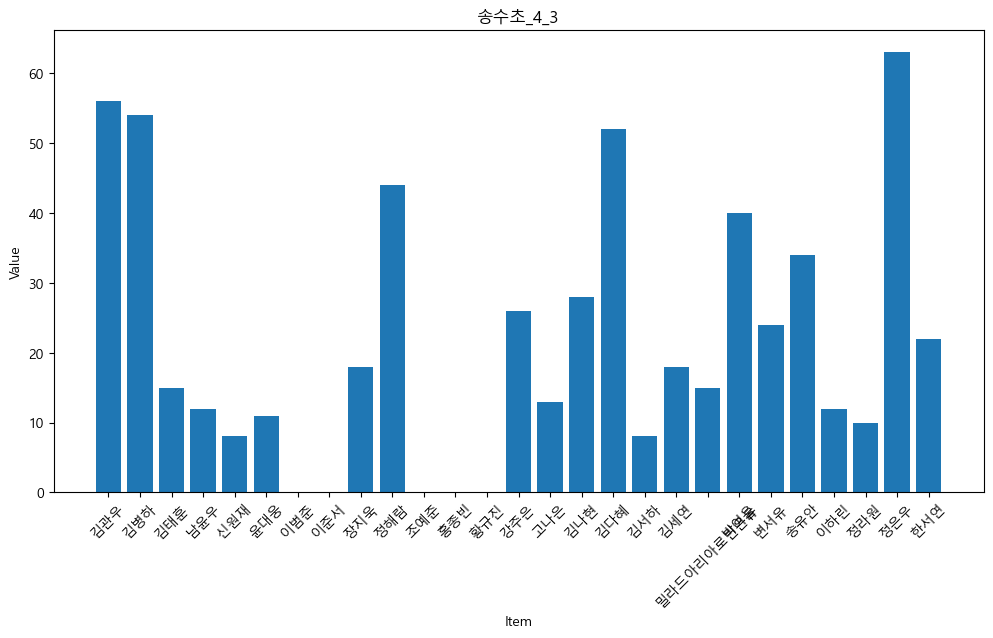

송수초_4_4
공격성 지명 횟수 : [41, 0, 1, 0, 5, 2, 3, 0, 0, 0, 5, 4, 2, 2, 1, 0, 0, 2, 5, 0, 9, 0, 0, 0, 0]
친구 지명 횟수 : [1, 14, 16, 13, 14, 7, 7, 14, 7, 12, 9, 10, 9, 14, 17, 19, 19, 19, 10, 14, 11, 18, 26, 11, 11]
규범 원점수 : [41  0 16  0 70 14 21  0  0  0 45 40 18 28 17  0  0 38 50  0 99  0  0  0
  0]
minmax 정규화 : 2.6565656565656566
공격성 지명 횟수 : [41, 0, 1, 0, 5, 2, 3, 0, 0, 0, 5, 4, 2, 2, 1, 0, 0, 2, 5, 0, 9, 0, 0, 0, 0]
친구 지명 횟수 : [1, 14, 16, 13, 14, 7, 7, 14, 7, 12, 9, 10, 9, 14, 17, 19, 19, 19, 10, 14, 11, 18, 26, 11, 11]
규범 원점수 : [41  0 16  0 70 14 21  0  0  0 45 40 18 28 17  0  0 38 50  0 99  0  0  0
  0]
minmax 정규화 : 1.0
공격성 지명 횟수 : [41, 0, 1, 0, 5, 2, 3, 0, 0, 0, 5, 4, 2, 2, 1, 0, 0, 2, 5, 0, 9, 0, 0, 0, 0]
친구 지명 횟수 : [1, 14, 16, 13, 14, 7, 7, 14, 7, 12, 9, 10, 9, 14, 17, 19, 19, 19, 10, 14, 11, 18, 26, 11, 11]
규범 원점수 : [41  0 16  0 70 14 21  0  0  0 45 40 18 28 17  0  0 38 50  0 99  0  0  0
  0]
minmax 정규화 : 1.6464646464646466
공격성 지명 횟수 : [41, 0, 1, 0, 5, 2, 3, 0, 0, 0, 5, 4, 2, 2, 1, 0, 0, 

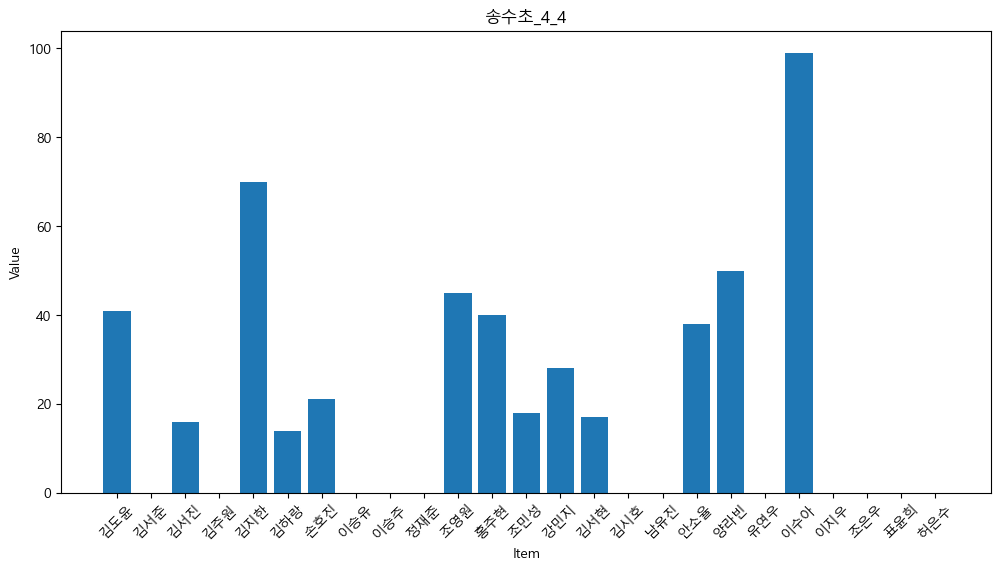

송수초_5_2
공격성 지명 횟수 : [0, 1, 1, 5, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 10, 1, 1, 4, 10, 1, 2, 0, 4]
친구 지명 횟수 : [23, 13, 13, 17, 12, 24, 28, 7, 12, 14, 20, 12, 12, 26, 17, 22, 19, 15, 12, 17, 19, 15, 15, 16]
규범 원점수 : [  0  13  13  85  24  48   0  14   0  28   0   0   0   0   0 220  19  15
  48 170  19  30   0  64]
minmax 정규화 : 1.0
공격성 지명 횟수 : [0, 1, 1, 5, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 10, 1, 1, 4, 10, 1, 2, 0, 4]
친구 지명 횟수 : [23, 13, 13, 17, 12, 24, 28, 7, 12, 14, 20, 12, 12, 26, 17, 22, 19, 15, 12, 17, 19, 15, 15, 16]
규범 원점수 : [  0  13  13  85  24  48   0  14   0  28   0   0   0   0   0 220  19  15
  48 170  19  30   0  64]
minmax 정규화 : 1.2363636363636363
공격성 지명 횟수 : [0, 1, 1, 5, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 10, 1, 1, 4, 10, 1, 2, 0, 4]
친구 지명 횟수 : [23, 13, 13, 17, 12, 24, 28, 7, 12, 14, 20, 12, 12, 26, 17, 22, 19, 15, 12, 17, 19, 15, 15, 16]
규범 원점수 : [  0  13  13  85  24  48   0  14   0  28   0   0   0   0   0 220  19  15
  48 170  19  30   0  64]
minmax 정규화 : 1.2363636363636363
공격성 지

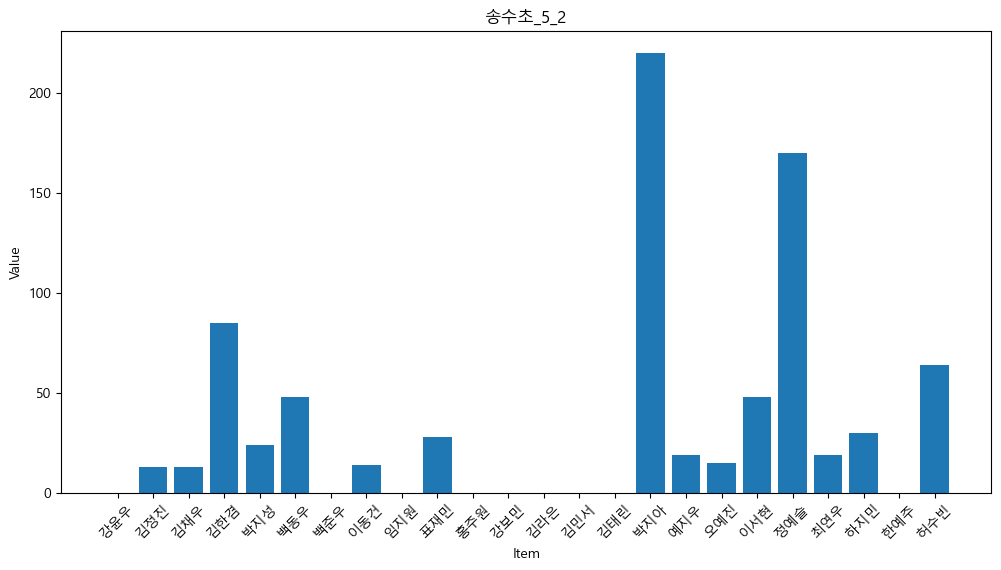

송수초_5_4
공격성 지명 횟수 : [0, 2, 0, 2, 2, 0, 9, 4, 3, 16, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0]
친구 지명 횟수 : [3, 6, 8, 11, 13, 8, 14, 9, 3, 8, 7, 5, 17, 6, 16, 11, 5, 5, 7, 4, 5, 7, 5]
규범 원점수 : [  0  12   0  22  26   0 126  36   9 128   7   5  17   6   0   0   0   0
   0  12   0   0   0]
minmax 정규화 : 1.0
공격성 지명 횟수 : [0, 2, 0, 2, 2, 0, 9, 4, 3, 16, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0]
친구 지명 횟수 : [3, 6, 8, 11, 13, 8, 14, 9, 3, 8, 7, 5, 17, 6, 16, 11, 5, 5, 7, 4, 5, 7, 5]
규범 원점수 : [  0  12   0  22  26   0 126  36   9 128   7   5  17   6   0   0   0   0
   0  12   0   0   0]
minmax 정규화 : 1.375
공격성 지명 횟수 : [0, 2, 0, 2, 2, 0, 9, 4, 3, 16, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0]
친구 지명 횟수 : [3, 6, 8, 11, 13, 8, 14, 9, 3, 8, 7, 5, 17, 6, 16, 11, 5, 5, 7, 4, 5, 7, 5]
규범 원점수 : [  0  12   0  22  26   0 126  36   9 128   7   5  17   6   0   0   0   0
   0  12   0   0   0]
minmax 정규화 : 1.0
공격성 지명 횟수 : [0, 2, 0, 2, 2, 0, 9, 4, 3, 16, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0]
친구 지명 횟수 : [3, 6, 8, 11, 13, 8, 14

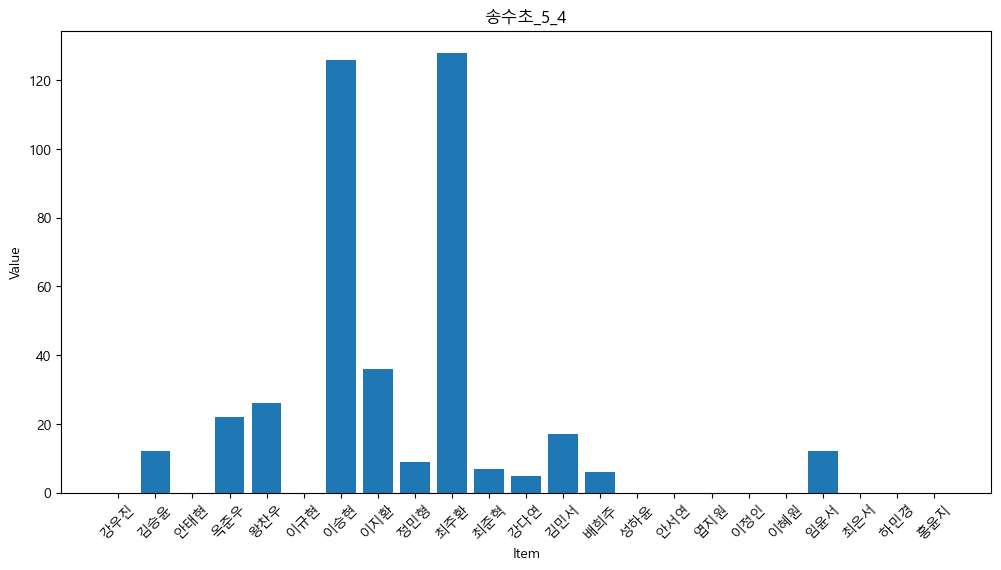

송수초_5_5
공격성 지명 횟수 : [1, 6, 2, 1, 5, 0, 3, 0, 0, 3, 0, 2, 10, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4]
친구 지명 횟수 : [14, 17, 15, 15, 17, 14, 18, 17, 15, 12, 17, 18, 17, 12, 12, 24, 18, 23, 25, 26, 19, 23, 27, 23]
규범 원점수 : [ 14 102  30  15  85   0  54   0   0  36   0  36 170  24   0   0   0   0
  50   0   0   0   0  92]
minmax 정규화 : 1.3294117647058823
공격성 지명 횟수 : [1, 6, 2, 1, 5, 0, 3, 0, 0, 3, 0, 2, 10, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4]
친구 지명 횟수 : [14, 17, 15, 15, 17, 14, 18, 17, 15, 12, 17, 18, 17, 12, 12, 24, 18, 23, 25, 26, 19, 23, 27, 23]
규범 원점수 : [ 14 102  30  15  85   0  54   0   0  36   0  36 170  24   0   0   0   0
  50   0   0   0   0  92]
minmax 정규화 : 3.4
공격성 지명 횟수 : [1, 6, 2, 1, 5, 0, 3, 0, 0, 3, 0, 2, 10, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4]
친구 지명 횟수 : [14, 17, 15, 15, 17, 14, 18, 17, 15, 12, 17, 18, 17, 12, 12, 24, 18, 23, 25, 26, 19, 23, 27, 23]
규범 원점수 : [ 14 102  30  15  85   0  54   0   0  36   0  36 170  24   0   0   0   0
  50   0   0   0   0  92]
minmax 정규화 : 1.7058823529411766
공격성 지

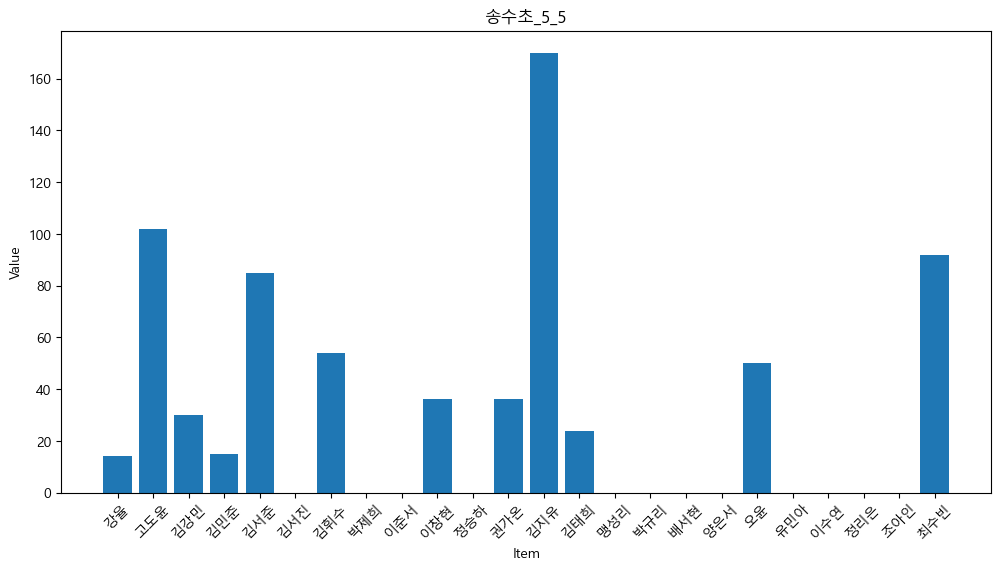

송수초_6_2
공격성 지명 횟수 : [2, 2, 16, 0, 5, 0, 0, 2, 0, 35, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0]
친구 지명 횟수 : [7, 9, 1, 14, 4, 23, 3, 2, 6, 1, 9, 8, 7, 6, 14, 12, 18, 12, 11, 13, 14, 16]
규범 원점수 : [14 18 16  0 20  0  0  4  0 35  0  0  7 12  0  0  0 12  0  0  0  0]
minmax 정규화 : 2.6
공격성 지명 횟수 : [2, 2, 16, 0, 5, 0, 0, 2, 0, 35, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0]
친구 지명 횟수 : [7, 9, 1, 14, 4, 23, 3, 2, 6, 1, 9, 8, 7, 6, 14, 12, 18, 12, 11, 13, 14, 16]
규범 원점수 : [14 18 16  0 20  0  0  4  0 35  0  0  7 12  0  0  0 12  0  0  0  0]
minmax 정규화 : 3.057142857142857
공격성 지명 횟수 : [2, 2, 16, 0, 5, 0, 0, 2, 0, 35, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0]
친구 지명 횟수 : [7, 9, 1, 14, 4, 23, 3, 2, 6, 1, 9, 8, 7, 6, 14, 12, 18, 12, 11, 13, 14, 16]
규범 원점수 : [14 18 16  0 20  0  0  4  0 35  0  0  7 12  0  0  0 12  0  0  0  0]
minmax 정규화 : 2.8285714285714283
공격성 지명 횟수 : [2, 2, 16, 0, 5, 0, 0, 2, 0, 35, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0]
친구 지명 횟수 : [7, 9, 1, 14, 4, 23, 3, 2, 6, 1, 9, 8, 7, 6, 14, 12, 18, 12, 11, 13, 14, 16]
규범 원점

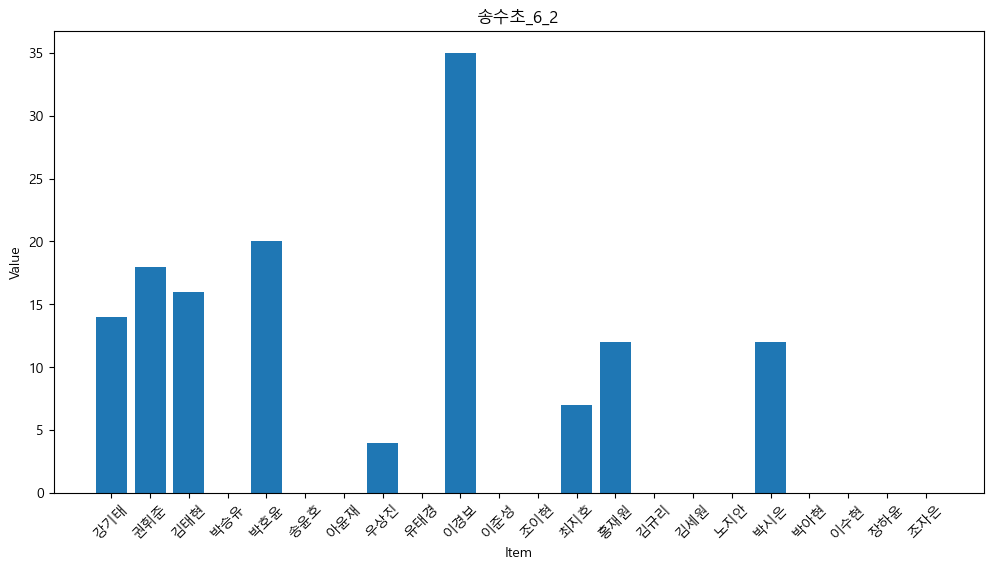

송수초_6_5
공격성 지명 횟수 : [6, 0, 0, 3, 0, 4, 1, 1, 1, 1, 7, 7, 0, 0, 0, 2, 3, 0, 0, 1, 7, 3, 3, 1, 1]
친구 지명 횟수 : [13, 16, 17, 15, 10, 6, 19, 21, 14, 15, 13, 16, 7, 15, 16, 15, 13, 18, 17, 9, 14, 15, 14, 20, 7]
규범 원점수 : [ 78   0   0  45   0  24  19  21  14  15  91 112   0   0   0  30  39   0
   0   9  98  45  42  20   7]
minmax 정규화 : 3.7857142857142856
공격성 지명 횟수 : [6, 0, 0, 3, 0, 4, 1, 1, 1, 1, 7, 7, 0, 0, 0, 2, 3, 0, 0, 1, 7, 3, 3, 1, 1]
친구 지명 횟수 : [13, 16, 17, 15, 10, 6, 19, 21, 14, 15, 13, 16, 7, 15, 16, 15, 13, 18, 17, 9, 14, 15, 14, 20, 7]
규범 원점수 : [ 78   0   0  45   0  24  19  21  14  15  91 112   0   0   0  30  39   0
   0   9  98  45  42  20   7]
minmax 정규화 : 1.0
공격성 지명 횟수 : [6, 0, 0, 3, 0, 4, 1, 1, 1, 1, 7, 7, 0, 0, 0, 2, 3, 0, 0, 1, 7, 3, 3, 1, 1]
친구 지명 횟수 : [13, 16, 17, 15, 10, 6, 19, 21, 14, 15, 13, 16, 7, 15, 16, 15, 13, 18, 17, 9, 14, 15, 14, 20, 7]
규범 원점수 : [ 78   0   0  45   0  24  19  21  14  15  91 112   0   0   0  30  39   0
   0   9  98  45  42  20   7]
minmax 정규화 : 1.0
공격

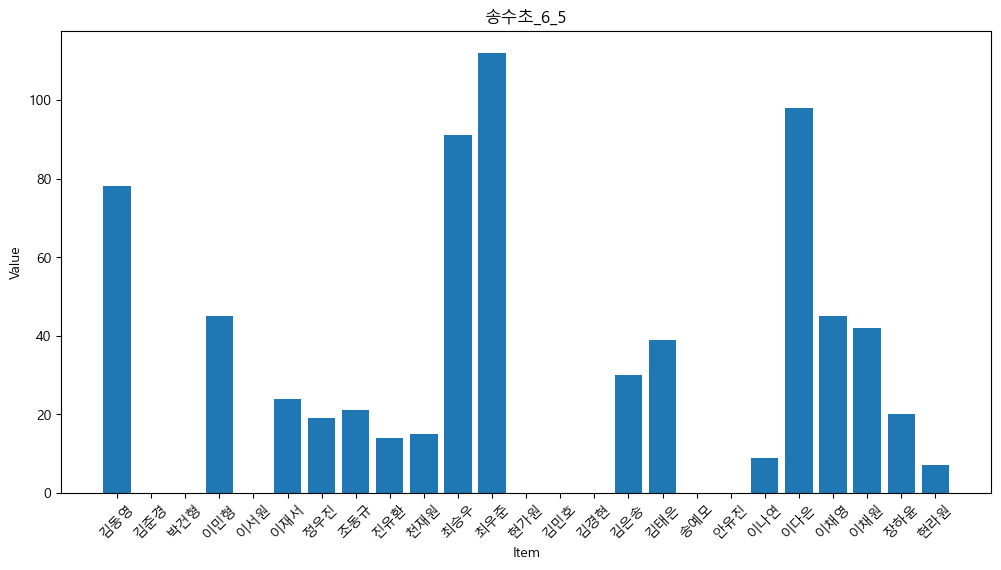

숭수초_4_1
공격성 지명 횟수 : [1, 3, 0, 2, 7, 0, 13, 0, 1, 1, 0, 0, 1, 0, 1, 6, 0, 0, 8, 1, 0, 0, 1, 3, 10, 9, 0]
친구 지명 횟수 : [18, 22, 21, 5, 7, 19, 6, 14, 14, 11, 9, 17, 15, 3, 19, 18, 17, 26, 2, 15, 23, 23, 16, 16, 16, 15, 14]
규범 원점수 : [ 18  66   0  10  49   0  78   0  14  11   0   0  15   0  19 108   0   0
  16  15   0   0  16  48 160 135   0]
minmax 정규화 : 1.45
공격성 지명 횟수 : [1, 3, 0, 2, 7, 0, 13, 0, 1, 1, 0, 0, 1, 0, 1, 6, 0, 0, 8, 1, 0, 0, 1, 3, 10, 9, 0]
친구 지명 횟수 : [18, 22, 21, 5, 7, 19, 6, 14, 14, 11, 9, 17, 15, 3, 19, 18, 17, 26, 2, 15, 23, 23, 16, 16, 16, 15, 14]
규범 원점수 : [ 18  66   0  10  49   0  78   0  14  11   0   0  15   0  19 108   0   0
  16  15   0   0  16  48 160 135   0]
minmax 정규화 : 2.65
공격성 지명 횟수 : [1, 3, 0, 2, 7, 0, 13, 0, 1, 1, 0, 0, 1, 0, 1, 6, 0, 0, 8, 1, 0, 0, 1, 3, 10, 9, 0]
친구 지명 횟수 : [18, 22, 21, 5, 7, 19, 6, 14, 14, 11, 9, 17, 15, 3, 19, 18, 17, 26, 2, 15, 23, 23, 16, 16, 16, 15, 14]
규범 원점수 : [ 18  66   0  10  49   0  78   0  14  11   0   0  15   0  19 108   0   0
  16

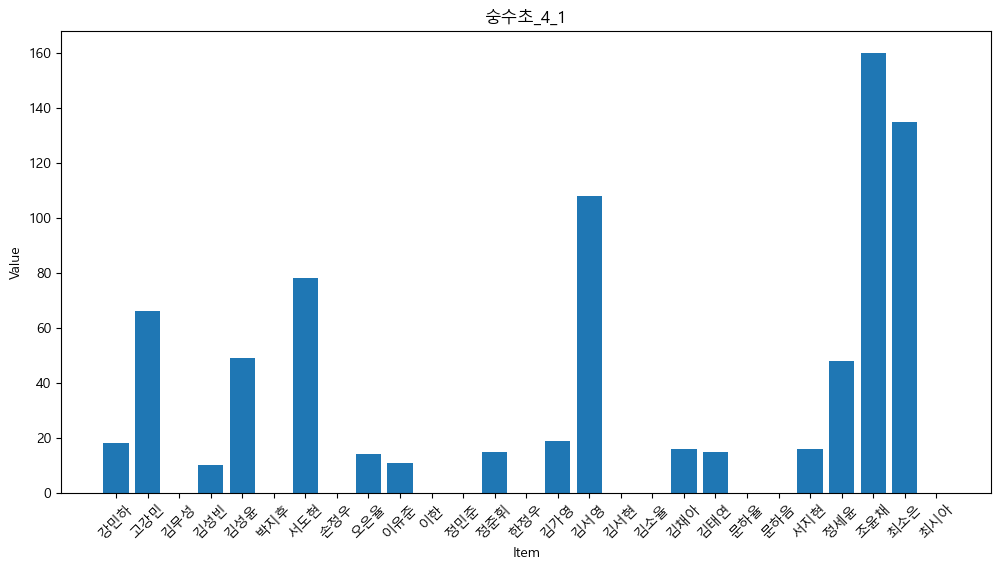

하원초_4_1
공격성 지명 횟수 : [40, 0, 29, 2, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 8, 2, 0]
친구 지명 횟수 : [1, 6, 3, 7, 4, 18, 7, 3, 18, 3, 5, 11, 18, 3, 7, 2, 13, 11, 4, 8, 4, 7, 3, 9, 13]
규범 원점수 : [40  0 87 14  0  0 21  6  0  0  5  0  0  0  0  0  0  0  0  0  4  0 24 18
  0]
minmax 정규화 : 2.839080459770115
공격성 지명 횟수 : [40, 0, 29, 2, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 8, 2, 0]
친구 지명 횟수 : [1, 6, 3, 7, 4, 18, 7, 3, 18, 3, 5, 11, 18, 3, 7, 2, 13, 11, 4, 8, 4, 7, 3, 9, 13]
규범 원점수 : [40  0 87 14  0  0 21  6  0  0  5  0  0  0  0  0  0  0  0  0  4  0 24 18
  0]
minmax 정규화 : 1.0
공격성 지명 횟수 : [40, 0, 29, 2, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 8, 2, 0]
친구 지명 횟수 : [1, 6, 3, 7, 4, 18, 7, 3, 18, 3, 5, 11, 18, 3, 7, 2, 13, 11, 4, 8, 4, 7, 3, 9, 13]
규범 원점수 : [40  0 87 14  0  0 21  6  0  0  5  0  0  0  0  0  0  0  0  0  4  0 24 18
  0]
minmax 정규화 : 5.0
공격성 지명 횟수 : [40, 0, 29, 2, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 8, 2, 0]
친구 지명 횟수 : [1, 6, 3, 7, 

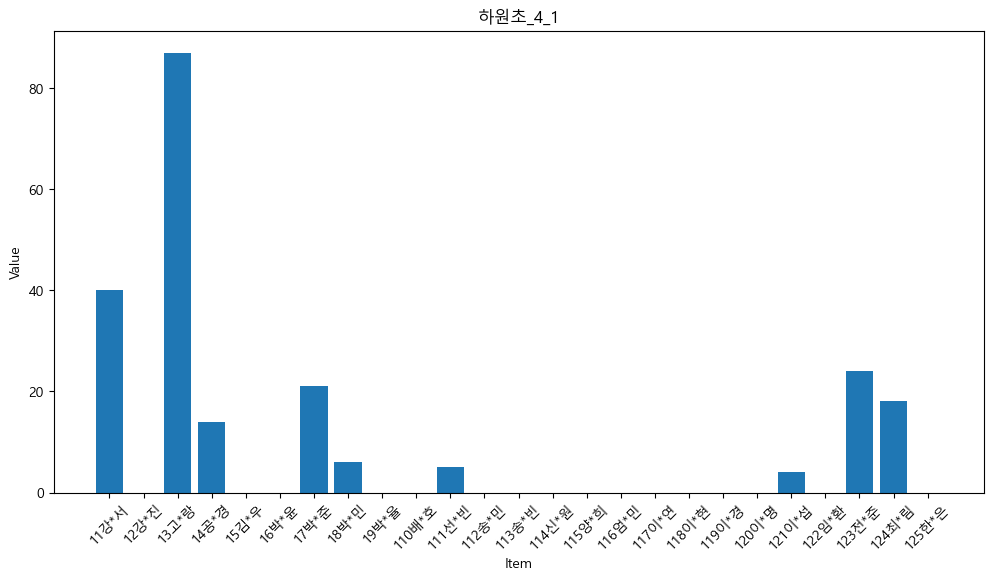

하원초_4_2
공격성 지명 횟수 : [15, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 4, 4, 4, 0, 3, 3, 2, 0, 1]
친구 지명 횟수 : [3, 12, 14, 6, 9, 7, 8, 12, 15, 15, 14, 11, 12, 5, 5, 11, 8, 10, 13, 16, 8, 6, 13, 14, 15]
규범 원점수 : [45 12 28  0  9  0  8  0  0 30  0  0 24  5  5 22 32 40 52  0 24 18 26  0
 15]
minmax 정규화 : 4.461538461538462
공격성 지명 횟수 : [15, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 4, 4, 4, 0, 3, 3, 2, 0, 1]
친구 지명 횟수 : [3, 12, 14, 6, 9, 7, 8, 12, 15, 15, 14, 11, 12, 5, 5, 11, 8, 10, 13, 16, 8, 6, 13, 14, 15]
규범 원점수 : [45 12 28  0  9  0  8  0  0 30  0  0 24  5  5 22 32 40 52  0 24 18 26  0
 15]
minmax 정규화 : 1.9230769230769231
공격성 지명 횟수 : [15, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 4, 4, 4, 0, 3, 3, 2, 0, 1]
친구 지명 횟수 : [3, 12, 14, 6, 9, 7, 8, 12, 15, 15, 14, 11, 12, 5, 5, 11, 8, 10, 13, 16, 8, 6, 13, 14, 15]
규범 원점수 : [45 12 28  0  9  0  8  0  0 30  0  0 24  5  5 22 32 40 52  0 24 18 26  0
 15]
minmax 정규화 : 3.1538461538461537
공격성 지명 횟수 : [15, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 4

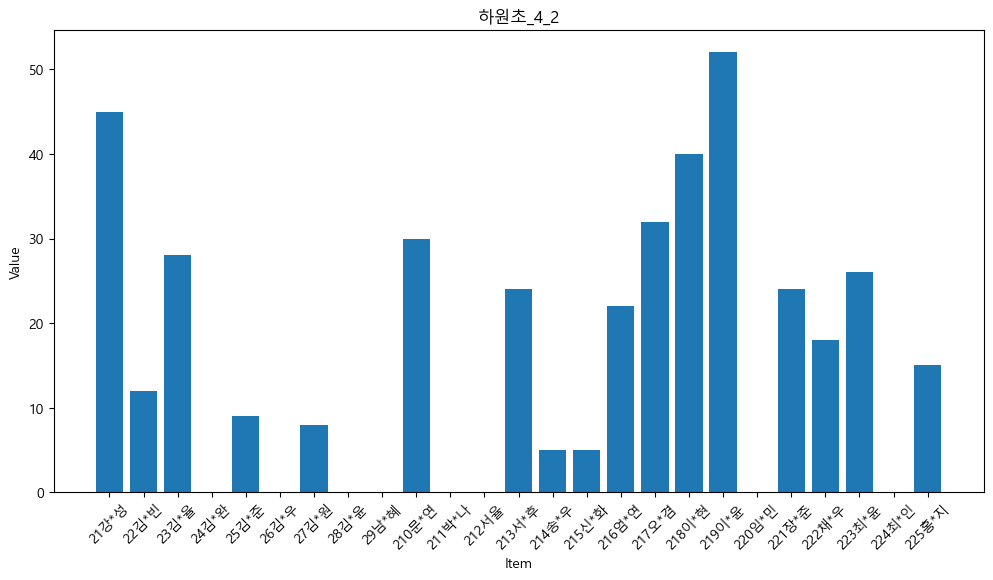

하원초_4_3
공격성 지명 횟수 : [2, 0, 0, 1, 9, 2, 2, 0, 2, 0, 1, 0, 4, 5, 1, 3, 0, 3, 2, 5, 1, 3, 0, 0, 1, 25]
친구 지명 횟수 : [8, 6, 7, 3, 3, 4, 4, 6, 6, 5, 8, 8, 11, 10, 13, 9, 10, 4, 4, 10, 13, 4, 11, 6, 12, 3]
규범 원점수 : [16  0  0  3 27  8  8  0 12  0  8  0 44 50 13 27  0 12  8 50 13 12  0  0
 12 75]
minmax 정규화 : 1.8533333333333335
공격성 지명 횟수 : [2, 0, 0, 1, 9, 2, 2, 0, 2, 0, 1, 0, 4, 5, 1, 3, 0, 3, 2, 5, 1, 3, 0, 0, 1, 25]
친구 지명 횟수 : [8, 6, 7, 3, 3, 4, 4, 6, 6, 5, 8, 8, 11, 10, 13, 9, 10, 4, 4, 10, 13, 4, 11, 6, 12, 3]
규범 원점수 : [16  0  0  3 27  8  8  0 12  0  8  0 44 50 13 27  0 12  8 50 13 12  0  0
 12 75]
minmax 정규화 : 1.0
공격성 지명 횟수 : [2, 0, 0, 1, 9, 2, 2, 0, 2, 0, 1, 0, 4, 5, 1, 3, 0, 3, 2, 5, 1, 3, 0, 0, 1, 25]
친구 지명 횟수 : [8, 6, 7, 3, 3, 4, 4, 6, 6, 5, 8, 8, 11, 10, 13, 9, 10, 4, 4, 10, 13, 4, 11, 6, 12, 3]
규범 원점수 : [16  0  0  3 27  8  8  0 12  0  8  0 44 50 13 27  0 12  8 50 13 12  0  0
 12 75]
minmax 정규화 : 1.0
공격성 지명 횟수 : [2, 0, 0, 1, 9, 2, 2, 0, 2, 0, 1, 0, 4, 5, 1, 3, 0, 3, 2, 5, 1, 3, 0, 0, 1

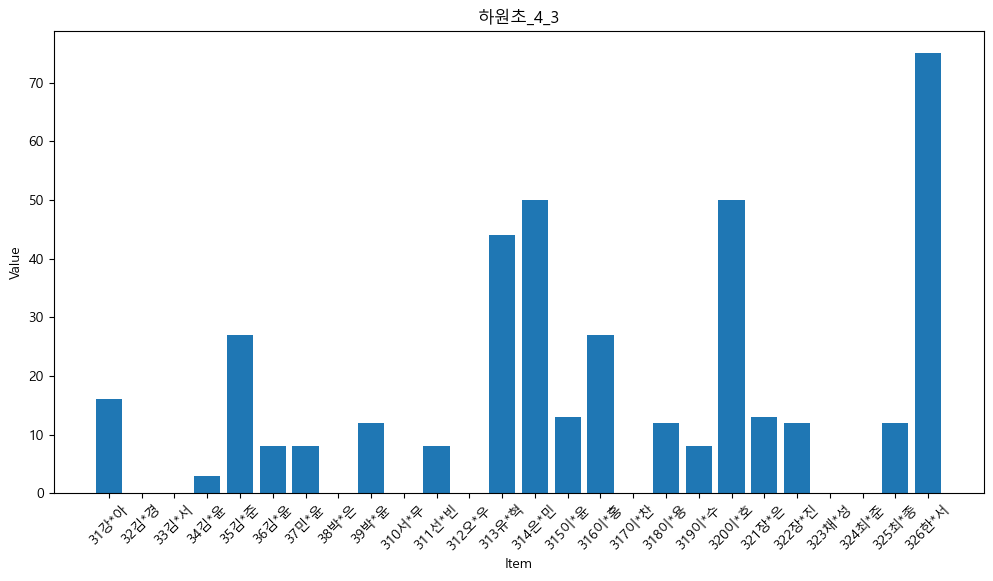

하원초_5_1
공격성 지명 횟수 : [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 2, 0, 0, 2, 0, 3, 0, 3]
친구 지명 횟수 : [13, 6, 3, 14, 12, 16, 4, 9, 9, 8, 22, 6, 15, 4, 10, 10, 3, 13, 6, 15, 8]
규범 원점수 : [26  0  0  0  0  0  0  0  0  0  0 72  0  8  0  0  6  0 18  0 24]
minmax 정규화 : 2.4444444444444446
공격성 지명 횟수 : [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 2, 0, 0, 2, 0, 3, 0, 3]
친구 지명 횟수 : [13, 6, 3, 14, 12, 16, 4, 9, 9, 8, 22, 6, 15, 4, 10, 10, 3, 13, 6, 15, 8]
규범 원점수 : [26  0  0  0  0  0  0  0  0  0  0 72  0  8  0  0  6  0 18  0 24]
minmax 정규화 : 1.0
공격성 지명 횟수 : [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 2, 0, 0, 2, 0, 3, 0, 3]
친구 지명 횟수 : [13, 6, 3, 14, 12, 16, 4, 9, 9, 8, 22, 6, 15, 4, 10, 10, 3, 13, 6, 15, 8]
규범 원점수 : [26  0  0  0  0  0  0  0  0  0  0 72  0  8  0  0  6  0 18  0 24]
minmax 정규화 : 1.0
공격성 지명 횟수 : [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 2, 0, 0, 2, 0, 3, 0, 3]
친구 지명 횟수 : [13, 6, 3, 14, 12, 16, 4, 9, 9, 8, 22, 6, 15, 4, 10, 10, 3, 13, 6, 15, 8]
규범 원점수 : [26  0  0  0  0  0  0  0  0  0  0 72  0  8  0  

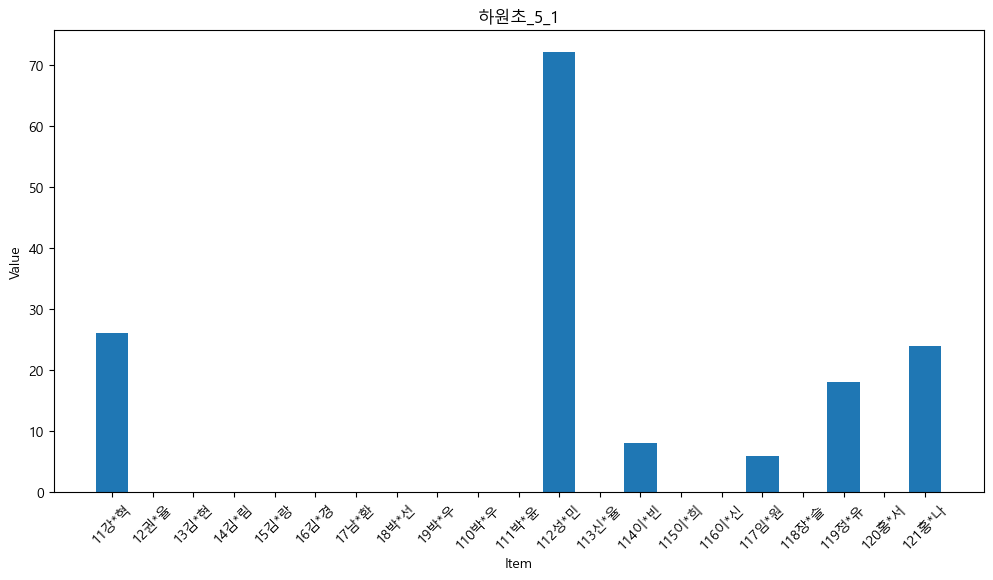

하원초_5_2
공격성 지명 횟수 : [0, 0, 2, 0, 0, 9, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 3]
친구 지명 횟수 : [13, 5, 6, 10, 20, 6, 9, 10, 10, 14, 8, 5, 16, 9, 8, 10, 14, 7]
규범 원점수 : [ 0  0 12  0  0 54  0  0 10  0  0 10  0  0 16 10 14 21]
minmax 정규화 : 1.0
공격성 지명 횟수 : [0, 0, 2, 0, 0, 9, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 3]
친구 지명 횟수 : [13, 5, 6, 10, 20, 6, 9, 10, 10, 14, 8, 5, 16, 9, 8, 10, 14, 7]
규범 원점수 : [ 0  0 12  0  0 54  0  0 10  0  0 10  0  0 16 10 14 21]
minmax 정규화 : 1.0
공격성 지명 횟수 : [0, 0, 2, 0, 0, 9, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 3]
친구 지명 횟수 : [13, 5, 6, 10, 20, 6, 9, 10, 10, 14, 8, 5, 16, 9, 8, 10, 14, 7]
규범 원점수 : [ 0  0 12  0  0 54  0  0 10  0  0 10  0  0 16 10 14 21]
minmax 정규화 : 1.8888888888888888
공격성 지명 횟수 : [0, 0, 2, 0, 0, 9, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 3]
친구 지명 횟수 : [13, 5, 6, 10, 20, 6, 9, 10, 10, 14, 8, 5, 16, 9, 8, 10, 14, 7]
규범 원점수 : [ 0  0 12  0  0 54  0  0 10  0  0 10  0  0 16 10 14 21]
minmax 정규화 : 1.0
공격성 지명 횟수 : [0, 0, 2, 0, 0, 9, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 3]
친구 지명 횟수 : [13

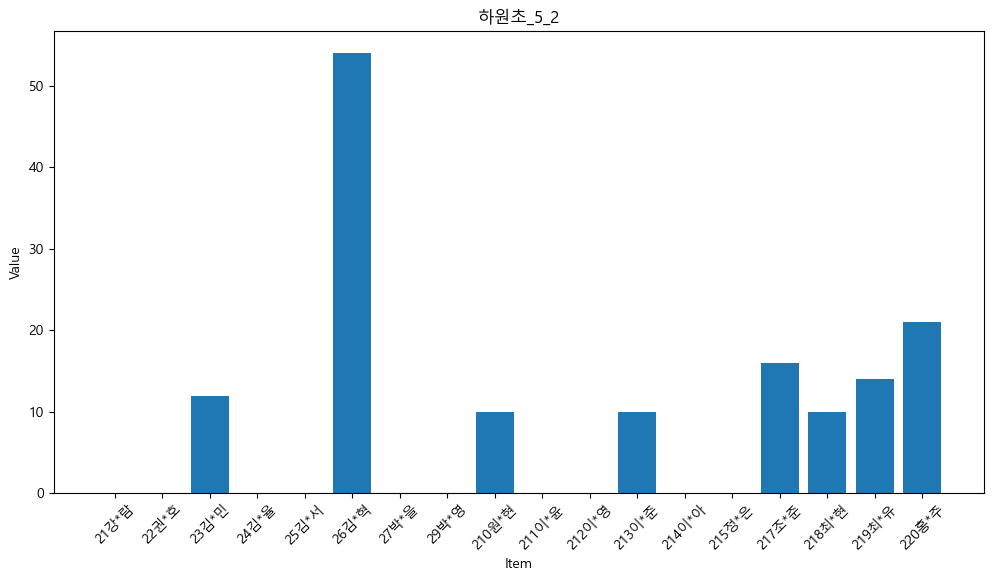

하원초_5_3
공격성 지명 횟수 : [0, 7, 0, 2, 3, 0, 0, 27, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0]
친구 지명 횟수 : [7, 4, 10, 1, 3, 7, 7, 0, 8, 8, 9, 3, 7, 12, 6, 3, 4, 3]
규범 원점수 : [ 0 28  0  2  9  0  0  0  8  8  0  6  0  0  0  3  4  0]
minmax 정규화 : 1.0
공격성 지명 횟수 : [0, 7, 0, 2, 3, 0, 0, 27, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0]
친구 지명 횟수 : [7, 4, 10, 1, 3, 7, 7, 0, 8, 8, 9, 3, 7, 12, 6, 3, 4, 3]
규범 원점수 : [ 0 28  0  2  9  0  0  0  8  8  0  6  0  0  0  3  4  0]
minmax 정규화 : 5.0
공격성 지명 횟수 : [0, 7, 0, 2, 3, 0, 0, 27, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0]
친구 지명 횟수 : [7, 4, 10, 1, 3, 7, 7, 0, 8, 8, 9, 3, 7, 12, 6, 3, 4, 3]
규범 원점수 : [ 0 28  0  2  9  0  0  0  8  8  0  6  0  0  0  3  4  0]
minmax 정규화 : 1.0
공격성 지명 횟수 : [0, 7, 0, 2, 3, 0, 0, 27, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0]
친구 지명 횟수 : [7, 4, 10, 1, 3, 7, 7, 0, 8, 8, 9, 3, 7, 12, 6, 3, 4, 3]
규범 원점수 : [ 0 28  0  2  9  0  0  0  8  8  0  6  0  0  0  3  4  0]
minmax 정규화 : 1.2857142857142856
공격성 지명 횟수 : [0, 7, 0, 2, 3, 0, 0, 27, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0]
친구 지명 횟수 : [7, 4, 10, 1, 3, 7, 7, 0, 

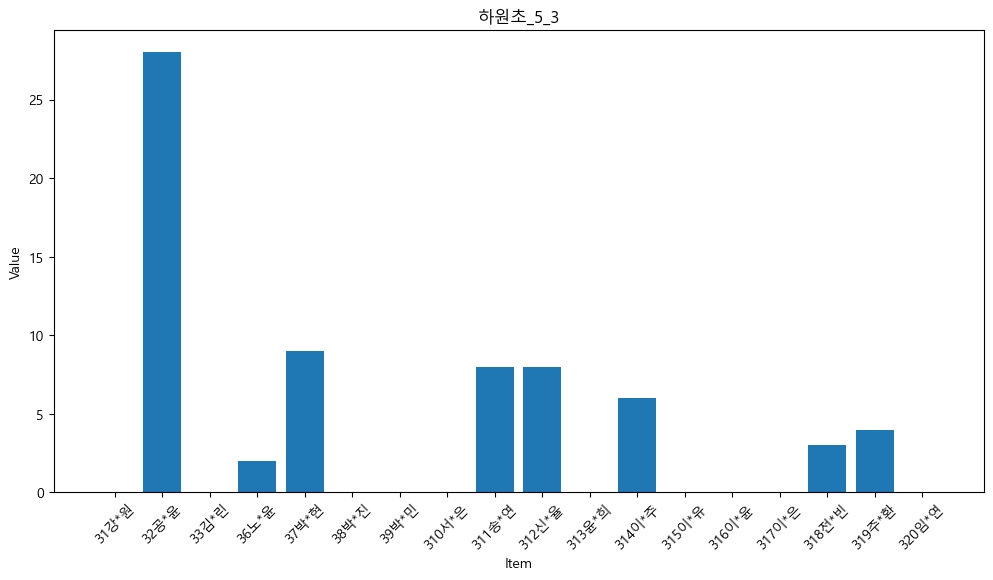

하원초_5_4
공격성 지명 횟수 : [3, 3, 0, 0, 0, 2, 0, 1, 0, 2, 9, 0, 1, 0, 0, 0, 0, 0, 0]
친구 지명 횟수 : [19, 19, 8, 16, 9, 10, 8, 5, 7, 8, 8, 12, 5, 7, 15, 11, 6, 9, 12]
규범 원점수 : [57 57  0  0  0 20  0  5  0 16 72  0  5  0  0  0  0  0  0]
minmax 정규화 : 4.166666666666666
공격성 지명 횟수 : [3, 3, 0, 0, 0, 2, 0, 1, 0, 2, 9, 0, 1, 0, 0, 0, 0, 0, 0]
친구 지명 횟수 : [19, 19, 8, 16, 9, 10, 8, 5, 7, 8, 8, 12, 5, 7, 15, 11, 6, 9, 12]
규범 원점수 : [57 57  0  0  0 20  0  5  0 16 72  0  5  0  0  0  0  0  0]
minmax 정규화 : 4.166666666666666
공격성 지명 횟수 : [3, 3, 0, 0, 0, 2, 0, 1, 0, 2, 9, 0, 1, 0, 0, 0, 0, 0, 0]
친구 지명 횟수 : [19, 19, 8, 16, 9, 10, 8, 5, 7, 8, 8, 12, 5, 7, 15, 11, 6, 9, 12]
규범 원점수 : [57 57  0  0  0 20  0  5  0 16 72  0  5  0  0  0  0  0  0]
minmax 정규화 : 1.0
공격성 지명 횟수 : [3, 3, 0, 0, 0, 2, 0, 1, 0, 2, 9, 0, 1, 0, 0, 0, 0, 0, 0]
친구 지명 횟수 : [19, 19, 8, 16, 9, 10, 8, 5, 7, 8, 8, 12, 5, 7, 15, 11, 6, 9, 12]
규범 원점수 : [57 57  0  0  0 20  0  5  0 16 72  0  5  0  0  0  0  0  0]
minmax 정규화 : 1.0
공격성 지명 횟수 : [3, 3, 0, 0, 0, 2, 0, 1,

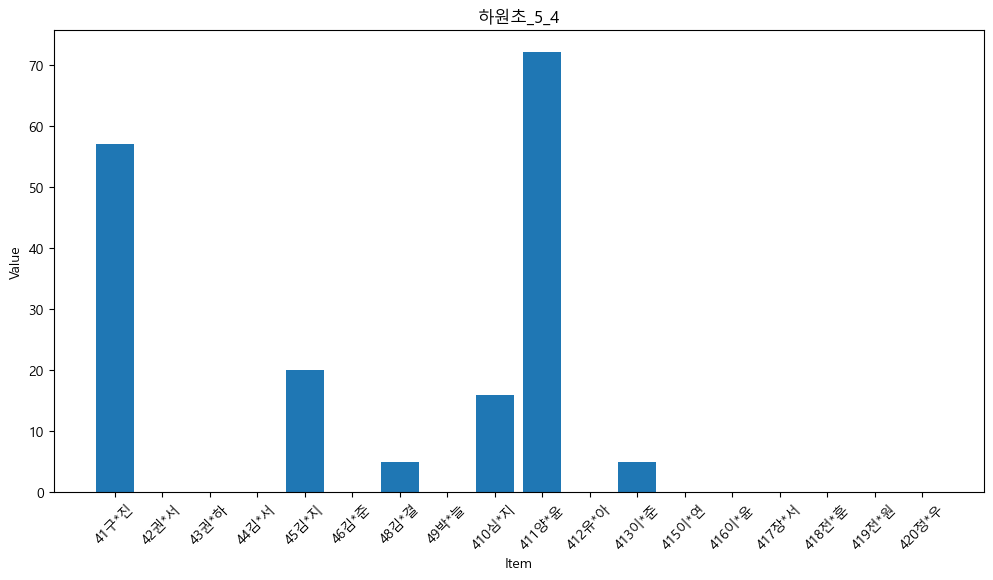

하원초_6_1
공격성 지명 횟수 : [3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 5, 0, 0, 0, 1, 1, 0]
친구 지명 횟수 : [12, 11, 2, 7, 11, 9, 15, 5, 4, 7, 6, 2, 19, 6, 3, 2, 18, 11, 14, 12, 12, 8]
규범 원점수 : [36  0  0  0  0  0  0  5  0  0  0  2  0 12  0 10  0  0  0 12 12  0]
minmax 정규화 : 5.0
공격성 지명 횟수 : [3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 5, 0, 0, 0, 1, 1, 0]
친구 지명 횟수 : [12, 11, 2, 7, 11, 9, 15, 5, 4, 7, 6, 2, 19, 6, 3, 2, 18, 11, 14, 12, 12, 8]
규범 원점수 : [36  0  0  0  0  0  0  5  0  0  0  2  0 12  0 10  0  0  0 12 12  0]
minmax 정규화 : 1.0
공격성 지명 횟수 : [3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 5, 0, 0, 0, 1, 1, 0]
친구 지명 횟수 : [12, 11, 2, 7, 11, 9, 15, 5, 4, 7, 6, 2, 19, 6, 3, 2, 18, 11, 14, 12, 12, 8]
규범 원점수 : [36  0  0  0  0  0  0  5  0  0  0  2  0 12  0 10  0  0  0 12 12  0]
minmax 정규화 : 1.0
공격성 지명 횟수 : [3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 5, 0, 0, 0, 1, 1, 0]
친구 지명 횟수 : [12, 11, 2, 7, 11, 9, 15, 5, 4, 7, 6, 2, 19, 6, 3, 2, 18, 11, 14, 12, 12, 8]
규범 원점수 : [36  0  0  0  0  0  0  5  0  0  0

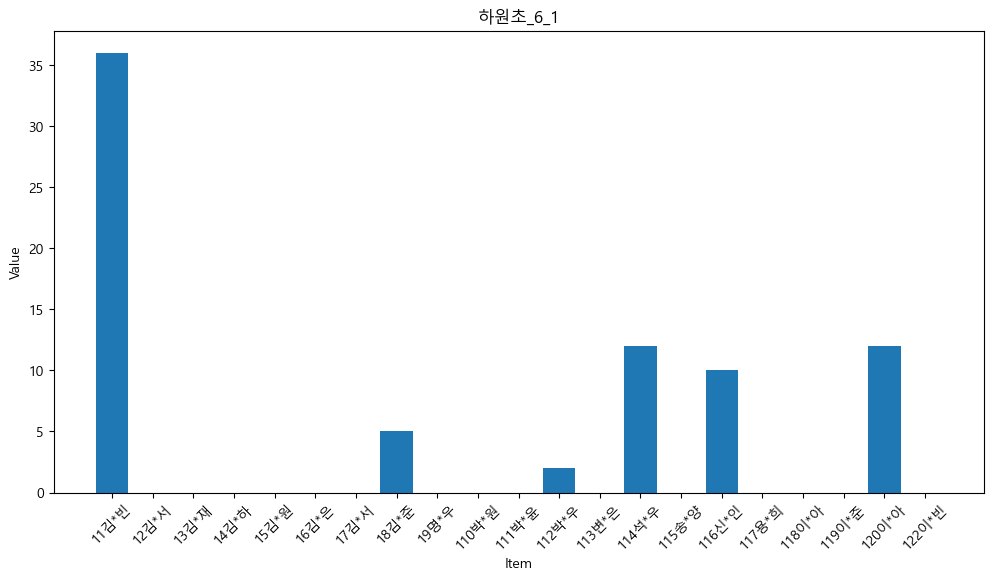

하원초_6_2
공격성 지명 횟수 : [9, 0, 4, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 3, 0, 1]
친구 지명 횟수 : [13, 9, 5, 8, 4, 12, 13, 5, 8, 8, 10, 8, 5, 7, 8, 3, 12, 5, 2, 10, 5]
규범 원점수 : [117   0  20   8   8   0   0   0   0   0  20   0   5   7   0   0   0   0
   6   0   5]
minmax 정규화 : 5.0
공격성 지명 횟수 : [9, 0, 4, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 3, 0, 1]
친구 지명 횟수 : [13, 9, 5, 8, 4, 12, 13, 5, 8, 8, 10, 8, 5, 7, 8, 3, 12, 5, 2, 10, 5]
규범 원점수 : [117   0  20   8   8   0   0   0   0   0  20   0   5   7   0   0   0   0
   6   0   5]
minmax 정규화 : 1.0
공격성 지명 횟수 : [9, 0, 4, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 3, 0, 1]
친구 지명 횟수 : [13, 9, 5, 8, 4, 12, 13, 5, 8, 8, 10, 8, 5, 7, 8, 3, 12, 5, 2, 10, 5]
규범 원점수 : [117   0  20   8   8   0   0   0   0   0  20   0   5   7   0   0   0   0
   6   0   5]
minmax 정규화 : 1.6837606837606838
공격성 지명 횟수 : [9, 0, 4, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 3, 0, 1]
친구 지명 횟수 : [13, 9, 5, 8, 4, 12, 13, 5, 8, 8, 10, 8, 5, 7, 8, 3, 12, 5, 2, 10, 5]
규범 원점수 : [

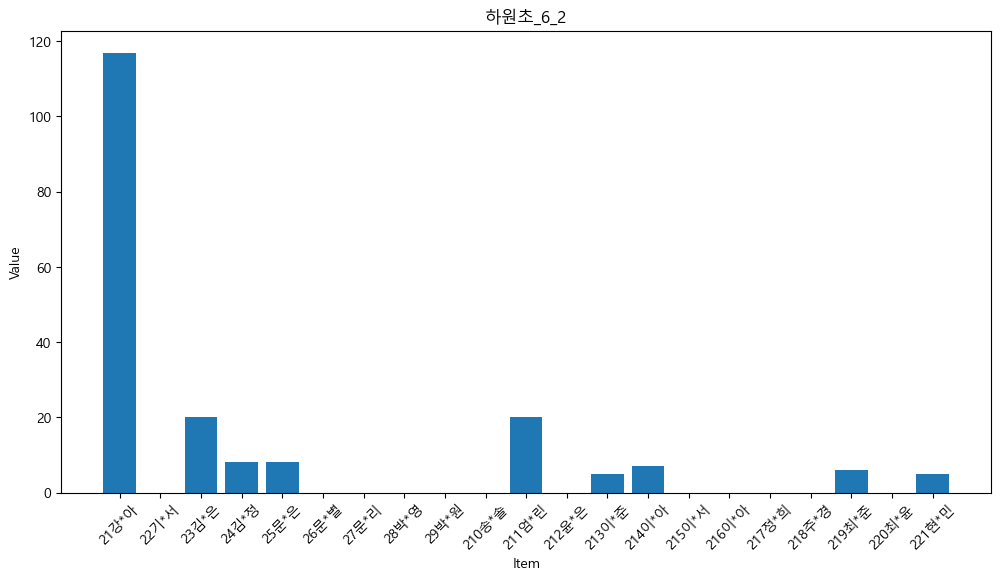

하원초_6_3
공격성 지명 횟수 : [1, 6, 4, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 3, 0]
친구 지명 횟수 : [2, 1, 5, 7, 15, 15, 2, 8, 7, 9, 9, 10, 4, 2, 8, 8, 1, 5, 9]
규범 원점수 : [ 2  6 20 21  0  0  2  0  0  0  0 10  0  0  0  0  4 15  0]
minmax 정규화 : 1.380952380952381
공격성 지명 횟수 : [1, 6, 4, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 3, 0]
친구 지명 횟수 : [2, 1, 5, 7, 15, 15, 2, 8, 7, 9, 9, 10, 4, 2, 8, 8, 1, 5, 9]
규범 원점수 : [ 2  6 20 21  0  0  2  0  0  0  0 10  0  0  0  0  4 15  0]
minmax 정규화 : 2.142857142857143
공격성 지명 횟수 : [1, 6, 4, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 3, 0]
친구 지명 횟수 : [2, 1, 5, 7, 15, 15, 2, 8, 7, 9, 9, 10, 4, 2, 8, 8, 1, 5, 9]
규범 원점수 : [ 2  6 20 21  0  0  2  0  0  0  0 10  0  0  0  0  4 15  0]
minmax 정규화 : 4.809523809523809
공격성 지명 횟수 : [1, 6, 4, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 3, 0]
친구 지명 횟수 : [2, 1, 5, 7, 15, 15, 2, 8, 7, 9, 9, 10, 4, 2, 8, 8, 1, 5, 9]
규범 원점수 : [ 2  6 20 21  0  0  2  0  0  0  0 10  0  0  0  0  4 15  0]
minmax 정규화 : 5.0
공격성 지명 횟수 : [1, 6, 4, 3, 0, 0, 1, 0, 0, 0,

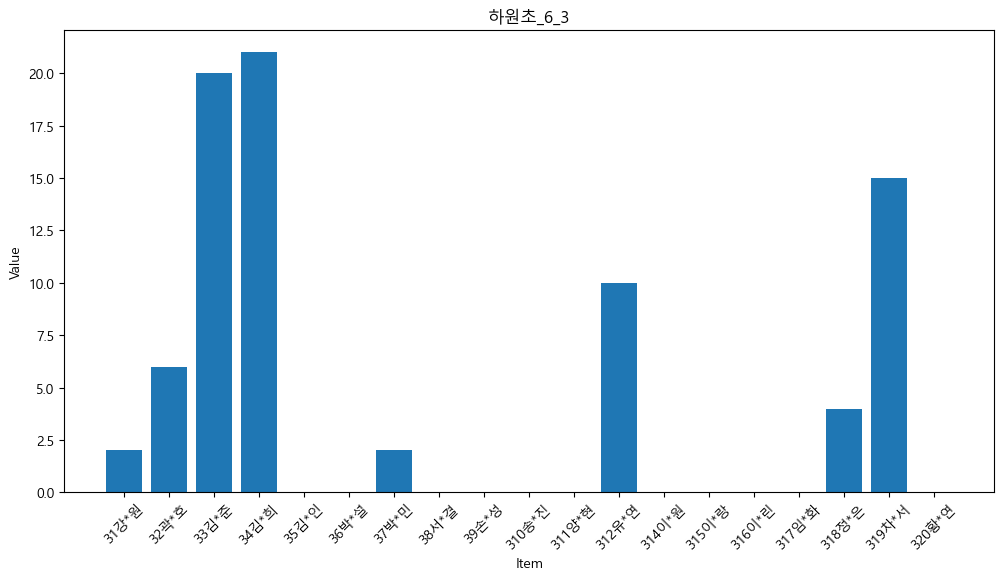

하원초_6_4
공격성 지명 횟수 : [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 9, 0, 5, 1, 5, 1, 0]
친구 지명 횟수 : [4, 10, 23, 2, 4, 13, 8, 15, 13, 8, 7, 11, 9, 3, 9, 9, 5, 6, 7, 7]
규범 원점수 : [ 0  0  0  2  0  0  0  0 13  0  0  0  0 27  0 45  5 30  7  0]
minmax 정규화 : 1.0
공격성 지명 횟수 : [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 9, 0, 5, 1, 5, 1, 0]
친구 지명 횟수 : [4, 10, 23, 2, 4, 13, 8, 15, 13, 8, 7, 11, 9, 3, 9, 9, 5, 6, 7, 7]
규범 원점수 : [ 0  0  0  2  0  0  0  0 13  0  0  0  0 27  0 45  5 30  7  0]
minmax 정규화 : 1.0
공격성 지명 횟수 : [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 9, 0, 5, 1, 5, 1, 0]
친구 지명 횟수 : [4, 10, 23, 2, 4, 13, 8, 15, 13, 8, 7, 11, 9, 3, 9, 9, 5, 6, 7, 7]
규범 원점수 : [ 0  0  0  2  0  0  0  0 13  0  0  0  0 27  0 45  5 30  7  0]
minmax 정규화 : 1.0
공격성 지명 횟수 : [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 9, 0, 5, 1, 5, 1, 0]
친구 지명 횟수 : [4, 10, 23, 2, 4, 13, 8, 15, 13, 8, 7, 11, 9, 3, 9, 9, 5, 6, 7, 7]
규범 원점수 : [ 0  0  0  2  0  0  0  0 13  0  0  0  0 27  0 45  5 30  7  0]
minmax 정규화 : 1.1777777777777778
공격성 지명 횟수 : [0, 0, 0,

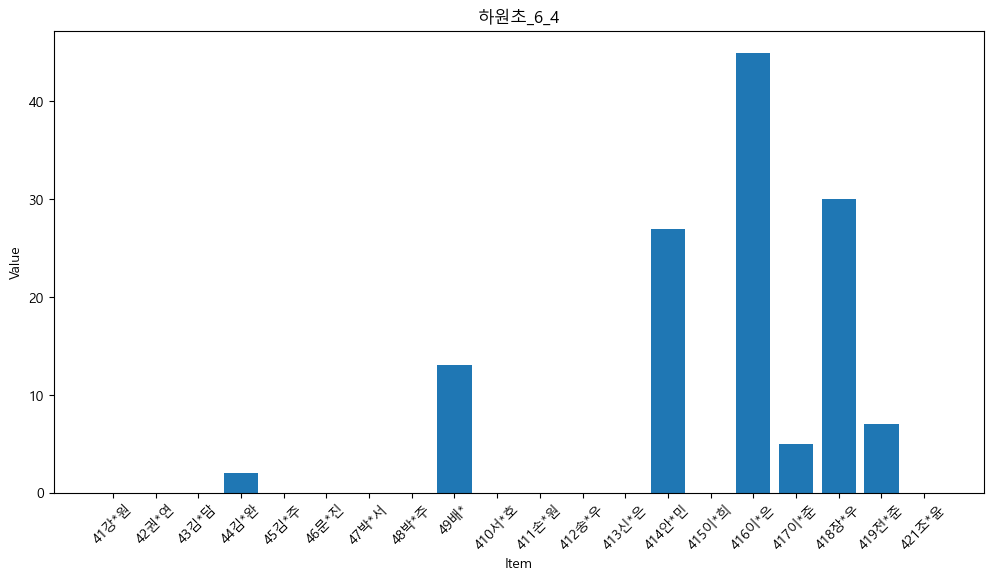

In [135]:
sch_c_dict = {}
for i in sch_stu_dict.keys() :
    print(i)
    for name in sch_stu_dict[i] :
        a,b,c,d = norm_score(dfs[i], ['PN4','PN5','PN6','PN7'], ['PN8','PN9'], i, name)
    sch_c_dict[i] = c
    labels = sch_stu_dict[i]

    plt.subplots(figsize=(12, 6))  # 1행 2열 subplot
    plt.bar(labels, c)
    plt.title(f'{i}')
    plt.xlabel('Item')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.show()

In [195]:
sch_c_dict

{'목포부주초_6_5': array([96, 14, 18,  8,  0,  8,  0, 24,  0, 14,  0,  0, 18,  0,  0,  5,  0,
         0,  0, 10,  0,  0, 25,  0]),
 '송수초_4_3': array([56, 54, 15, 12,  8, 11,  0,  0, 18, 44,  0,  0,  0, 26, 13, 28, 52,
         8, 18, 15, 40, 24, 34, 12, 10, 63, 22]),
 '송수초_4_4': array([41,  0, 16,  0, 70, 14, 21,  0,  0,  0, 45, 40, 18, 28, 17,  0,  0,
        38, 50,  0, 99,  0,  0,  0,  0]),
 '송수초_5_2': array([  0,  13,  13,  85,  24,  48,   0,  14,   0,  28,   0,   0,   0,
          0,   0, 220,  19,  15,  48, 170,  19,  30,   0,  64]),
 '송수초_5_4': array([  0,  12,   0,  22,  26,   0, 126,  36,   9, 128,   7,   5,  17,
          6,   0,   0,   0,   0,   0,  12,   0,   0,   0]),
 '송수초_5_5': array([ 14, 102,  30,  15,  85,   0,  54,   0,   0,  36,   0,  36, 170,
         24,   0,   0,   0,   0,  50,   0,   0,   0,   0,  92]),
 '송수초_6_2': array([14, 18, 16,  0, 20,  0,  0,  4,  0, 35,  0,  0,  7, 12,  0,  0,  0,
        12,  0,  0,  0,  0]),
 '송수초_6_5': array([ 78,   0,   0,  45,   0,  24,

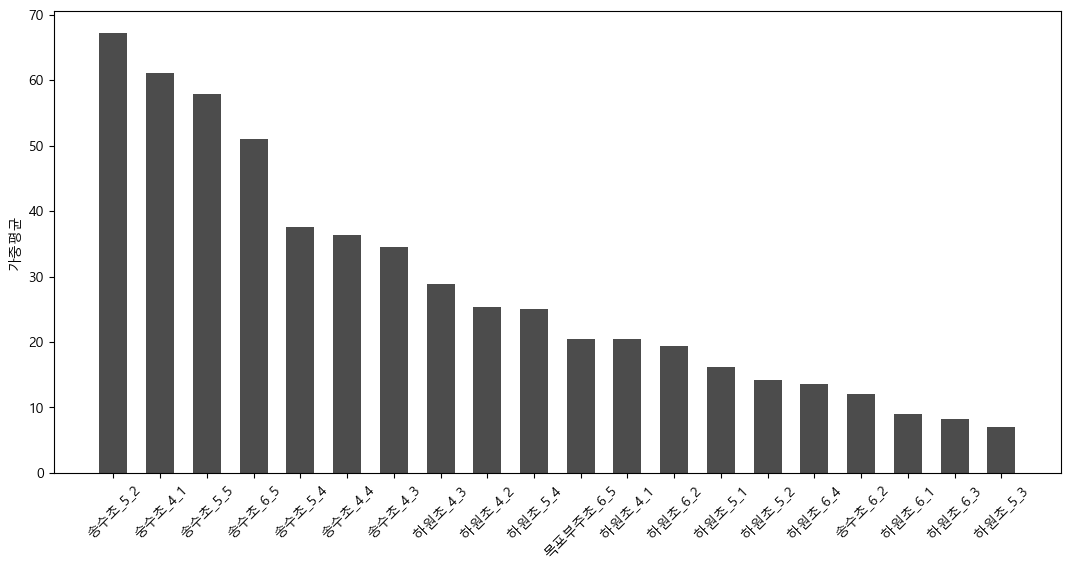

In [173]:
weight_dict = {}
for i, lis in sch_c_dict.items() :
    top = sorted(lis, reverse=True)[:5]
    top_mean = sum(top) / len(top)
    total_mean = sum(lis) / len(lis)
    weight_mean = 0.4*top_mean+0.6*total_mean
    weight_dict[i] = weight_mean
    sorted_dict = dict(sorted(weight_dict.items(), key=lambda x: x[1], reverse=True))

plt.subplots(figsize=(13, 6))  # 1행 2열 subplot
plt.bar(list(sorted_dict.keys()), list(sorted_dict.values()), width=0.6, color='black', alpha=0.7)
plt.ylabel('가중평균')
plt.xticks(rotation=45)
plt.show()

In [179]:
sorted_dict

{'송수초_5_2': 67.21000000000001,
 '숭수초_4_1': 61.0488888888889,
 '송수초_5_5': 57.94,
 '송수초_6_5': 50.936,
 '송수초_5_4': 37.63130434782609,
 '송수초_4_4': 36.328,
 '송수초_4_3': 34.47555555555555,
 '하원초_4_3': 28.864615384615387,
 '하원초_4_2': 25.4,
 '하원초_5_4': 25.086315789473687,
 '목포부주초_6_5': 20.480000000000004,
 '하원초_4_1': 20.456,
 '하원초_6_2': 19.44,
 '하원초_5_1': 16.240000000000002,
 '하원초_5_2': 14.259999999999998,
 '하원초_6_4': 13.629999999999999,
 '송수초_6_2': 12.003636363636364,
 '하원초_6_1': 8.987272727272726,
 '하원초_6_3': 8.286315789473685,
 '하원초_5_3': 6.986666666666667}

In [183]:
min_val = 0
max_val = 67
new_min = 1
new_max = 5

scaled_dict = {
    k: new_min + (min(max(v, min_val), max_val) - min_val) / (max_val - min_val) * (new_max - new_min)
    for k, v in sorted_dict.items()
}

for k, v in scaled_dict.items():
    print(f"{k}: {v:.3f}")

송수초_5_2: 5.000
숭수초_4_1: 4.645
송수초_5_5: 4.459
송수초_6_5: 4.041
송수초_5_4: 3.247
송수초_4_4: 3.169
송수초_4_3: 3.058
하원초_4_3: 2.723
하원초_4_2: 2.516
하원초_5_4: 2.498
목포부주초_6_5: 2.223
하원초_4_1: 2.221
하원초_6_2: 2.161
하원초_5_1: 1.970
하원초_5_2: 1.851
하원초_6_4: 1.814
송수초_6_2: 1.717
하원초_6_1: 1.537
하원초_6_3: 1.495
하원초_5_3: 1.417


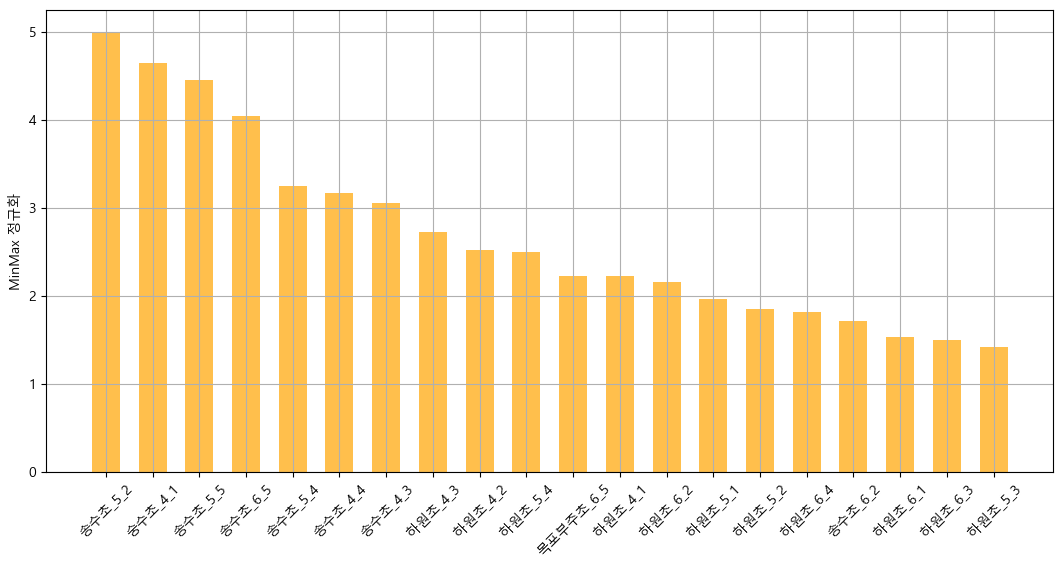

In [193]:
plt.subplots(figsize=(13, 6))  # 1행 2열 subplot
plt.bar(list(scaled_dict.keys()), list(scaled_dict.values()), width=0.6, color='orange', alpha=0.7)
plt.ylabel('MinMax 정규화')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [197]:
reordered_array_dict = {k: sch_c_dict[k] for k in scaled_dict.keys()}

In [199]:
reordered_array_dict

{'송수초_5_2': array([  0,  13,  13,  85,  24,  48,   0,  14,   0,  28,   0,   0,   0,
          0,   0, 220,  19,  15,  48, 170,  19,  30,   0,  64]),
 '숭수초_4_1': array([ 18,  66,   0,  10,  49,   0,  78,   0,  14,  11,   0,   0,  15,
          0,  19, 108,   0,   0,  16,  15,   0,   0,  16,  48, 160, 135,
          0]),
 '송수초_5_5': array([ 14, 102,  30,  15,  85,   0,  54,   0,   0,  36,   0,  36, 170,
         24,   0,   0,   0,   0,  50,   0,   0,   0,   0,  92]),
 '송수초_6_5': array([ 78,   0,   0,  45,   0,  24,  19,  21,  14,  15,  91, 112,   0,
          0,   0,  30,  39,   0,   0,   9,  98,  45,  42,  20,   7]),
 '송수초_5_4': array([  0,  12,   0,  22,  26,   0, 126,  36,   9, 128,   7,   5,  17,
          6,   0,   0,   0,   0,   0,  12,   0,   0,   0]),
 '송수초_4_4': array([41,  0, 16,  0, 70, 14, 21,  0,  0,  0, 45, 40, 18, 28, 17,  0,  0,
        38, 50,  0, 99,  0,  0,  0,  0]),
 '송수초_4_3': array([56, 54, 15, 12,  8, 11,  0,  0, 18, 44,  0,  0,  0, 26, 13, 28, 52,
         8, 18, 

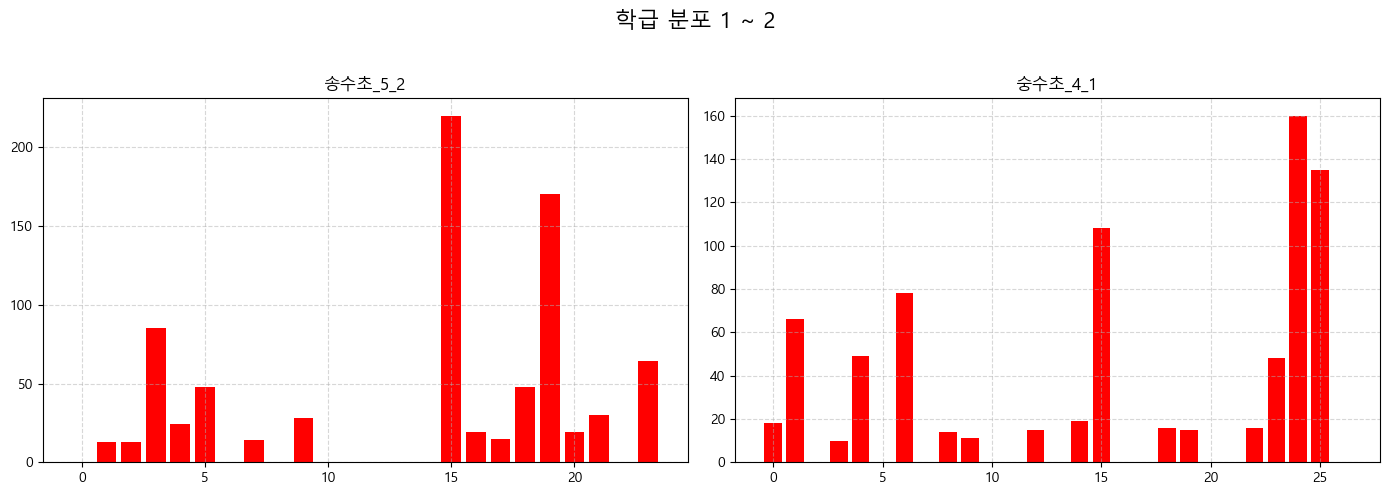

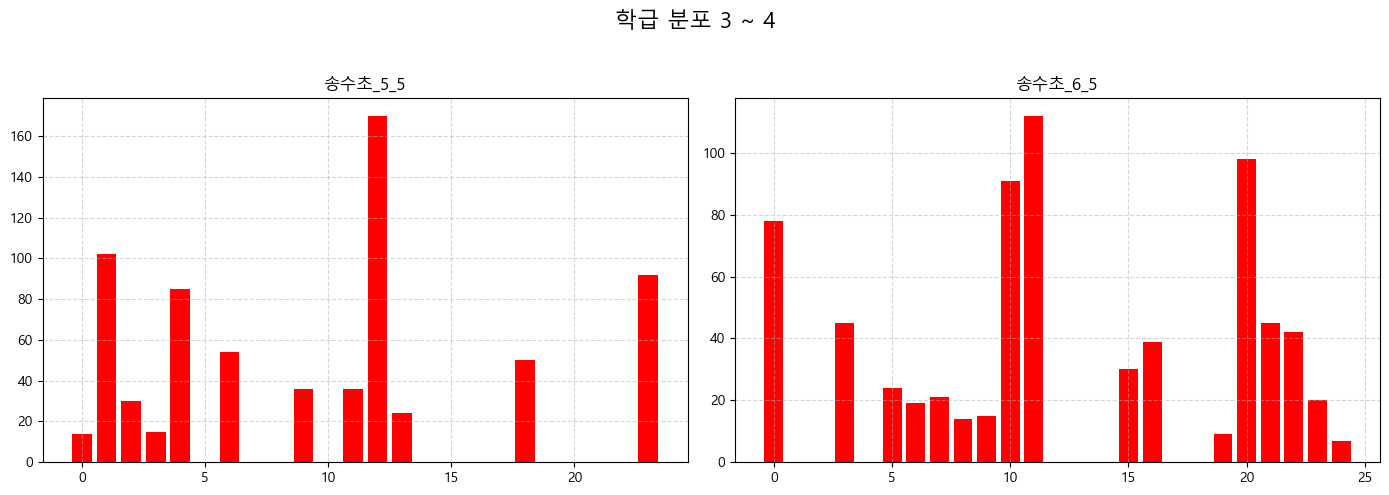

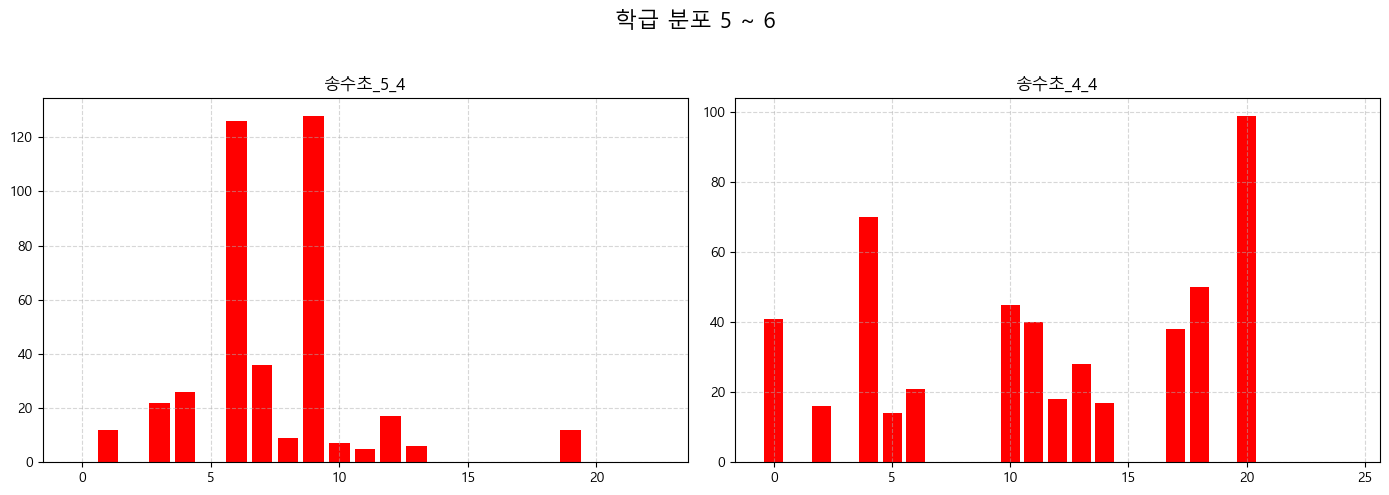

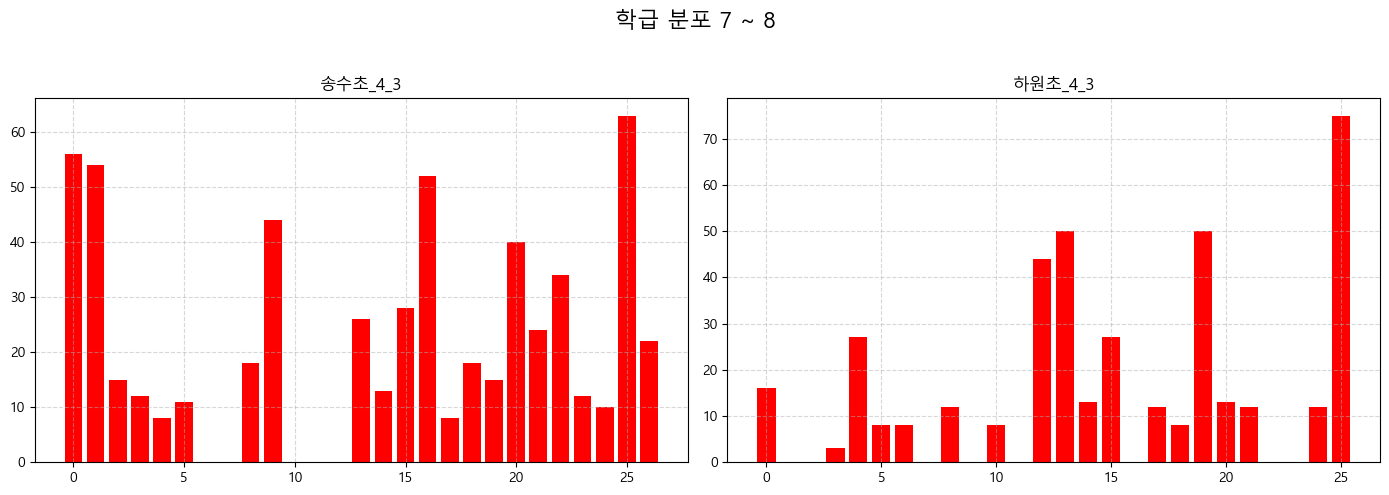

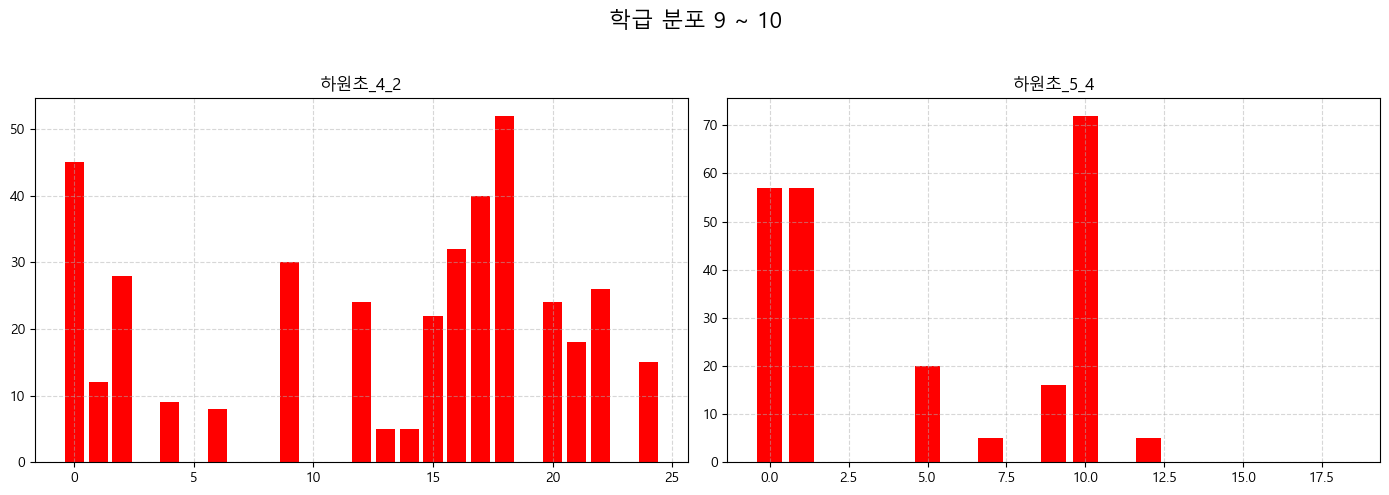

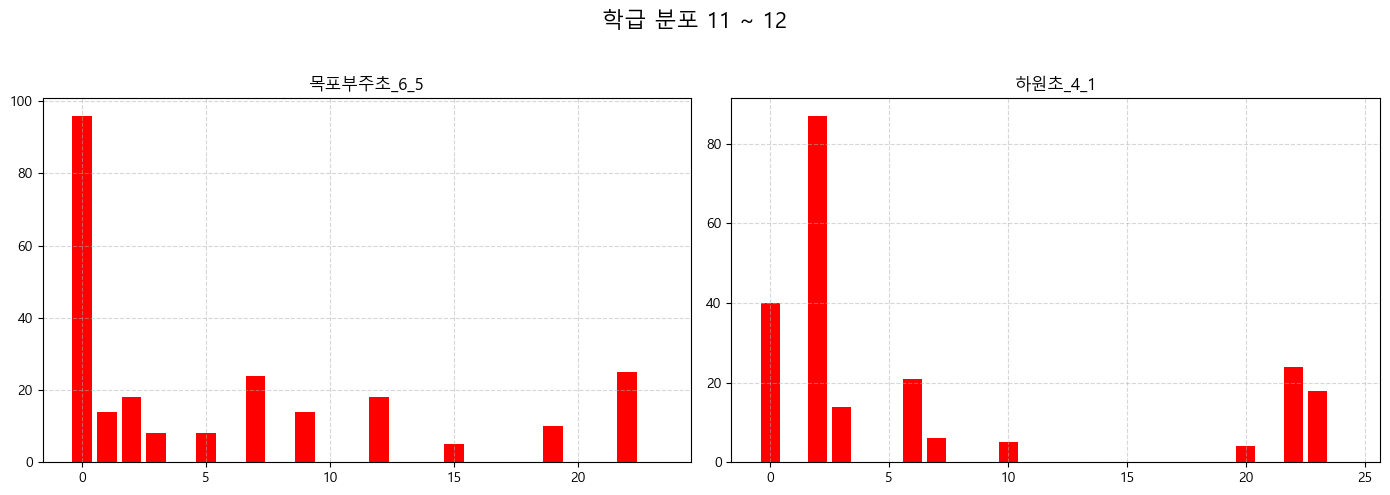

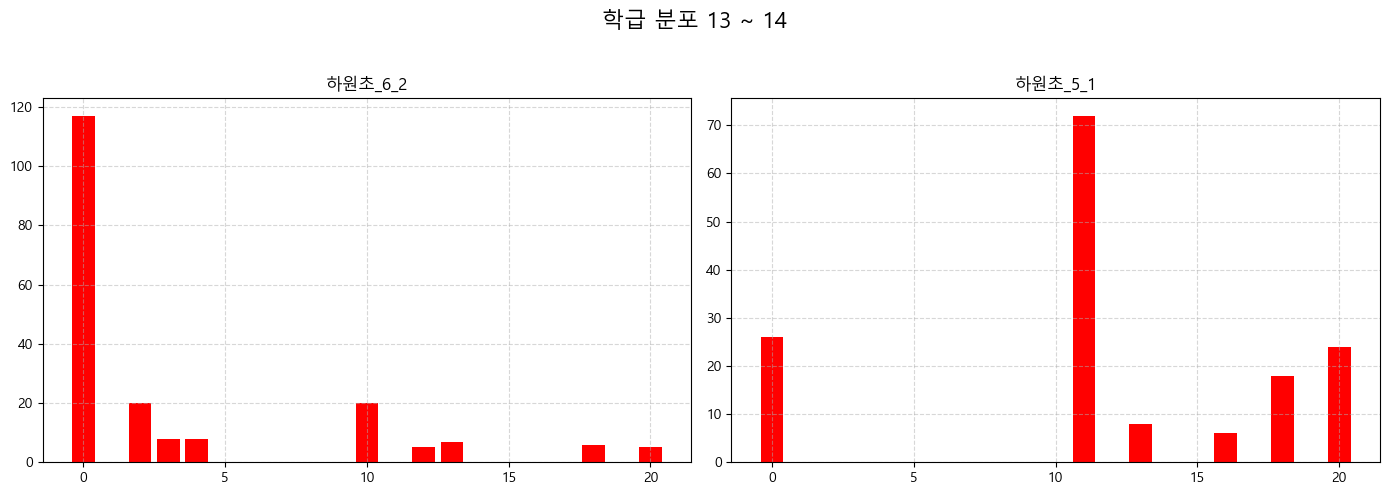

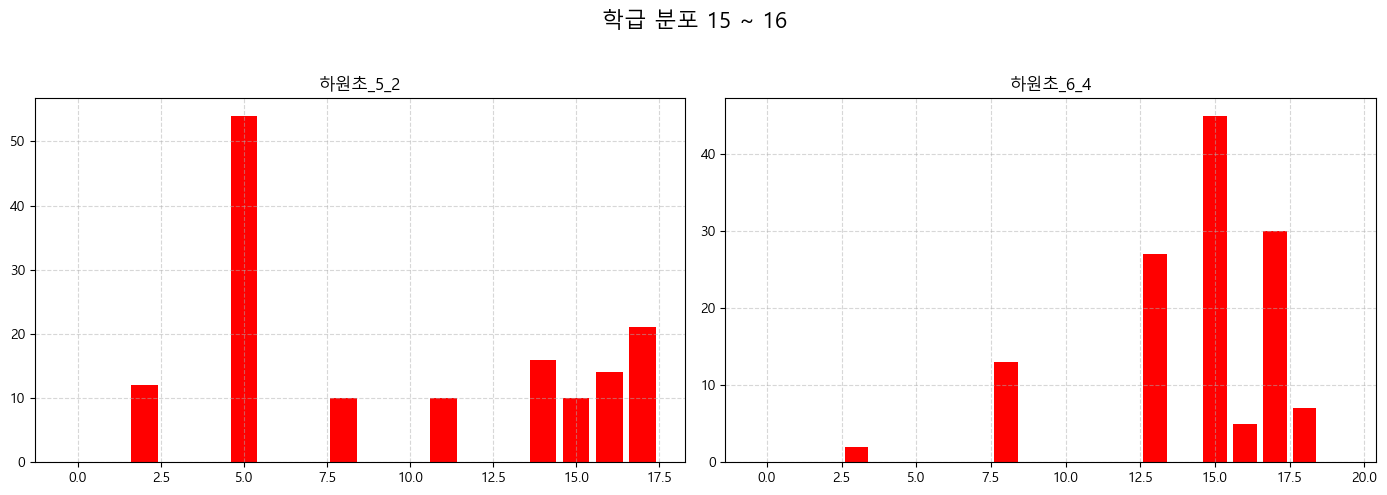

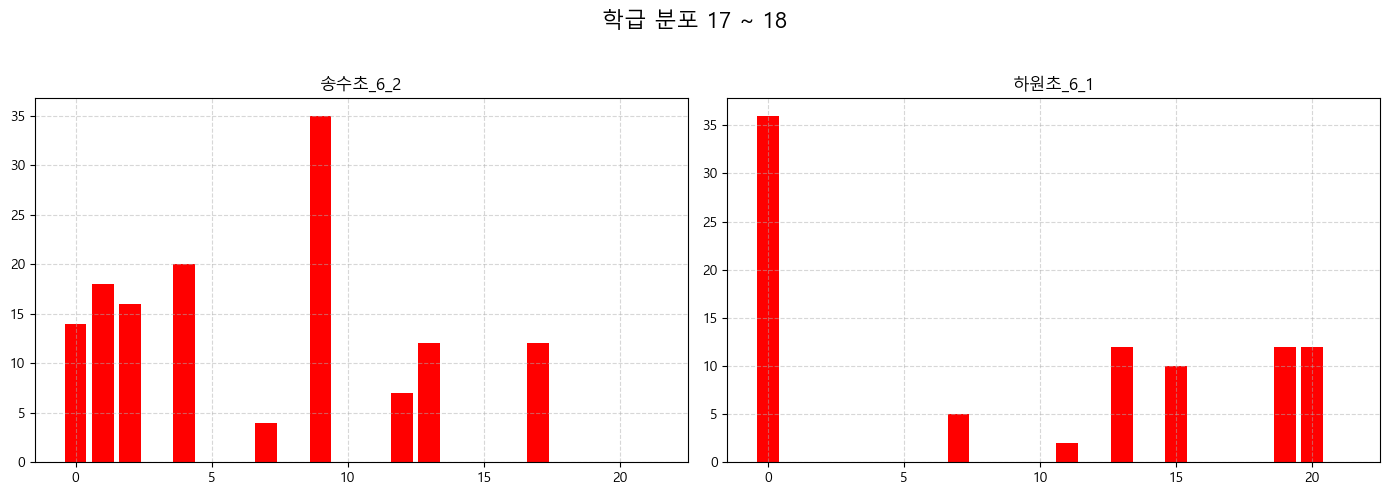

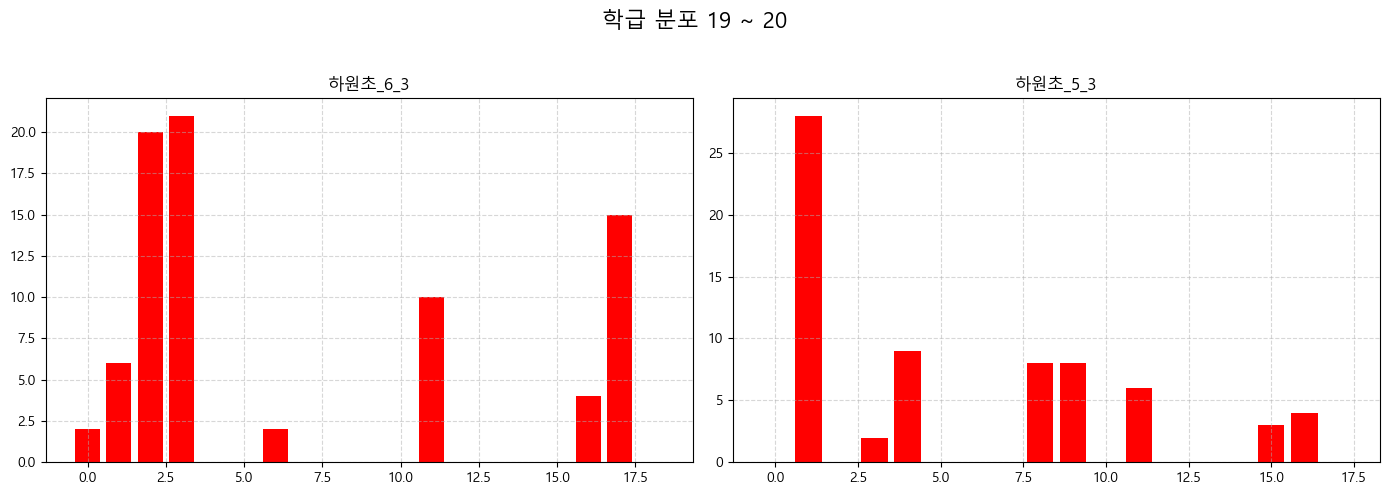

In [205]:
import matplotlib.pyplot as plt
import numpy as np

# 시각화 대상 딕셔너리
data_dict = reordered_array_dict

# 한 페이지에 2개씩 시각화
n_per_page = 2
keys = list(data_dict.keys())

for i in range(0, len(keys), n_per_page):
    subset_keys = keys[i:i+n_per_page]
    
    # 1행 2열 subplot
    fig, axs = plt.subplots(1, n_per_page, figsize=(14, 5))
    fig.suptitle(f'학급 분포 {i+1} ~ {i+len(subset_keys)}', fontsize=16)

    for j, key in enumerate(subset_keys):
        ax = axs[j] if n_per_page > 1 else axs  # axs가 리스트 또는 단일 객체일 수 있음
        values = data_dict[key]

        ax.bar(range(len(values)), values, color='red')
        ax.set_title(key)
        ax.grid(True, linestyle='--', alpha=0.5)

    # 남은 subplot이 비어있을 경우 숨기기
    if len(subset_keys) < n_per_page:
        for k in range(len(subset_keys), n_per_page):
            fig.delaxes(axs[k])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()